In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [68]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# entries 2542
selected entries 375
> 1000 reads 334
set(filenames) 334
334
668
rnf2_2 cell_none_control 47.0
ctnnb1_2 cell_none_control 29.0
hoxd13_2_2 cell_none_control 40.0
tubb5_2 cell_none_control 14.0
crygc_2 cell_none_control 16.0
chd2_2 cell_none_control 41.0
hoxd13_1_2 cell_none_control 42.0
col12a1_2 cell_none_control 13.0
dnmt1_2 cell_none_control 71.0
tspan2_2 cell_none_control 21.0
                    Identifier  outcome   val
0    dnmt1_2 cell_none_control     % WT  96.4
1    dnmt1_2 cell_none_control  % error   3.6
2    dnmt1_2 cell_none_control     % WT  96.3
3    dnmt1_2 cell_none_control  % error   3.7
4    dnmt1_2 cell_none_control     % WT  96.2
..                         ...      ...   ...
663  tubb5_2 cell_none_control  % error   6.1
664  tubb5_2 cell_none_control     % WT  95.8
665  tubb5_2 cell_none_control  % error   4.2
666  tubb5_2 cell_none_control     % WT  95.5
667  tubb5_2 cell_none_control  % error   4.4

[668 rows x 3 columns]


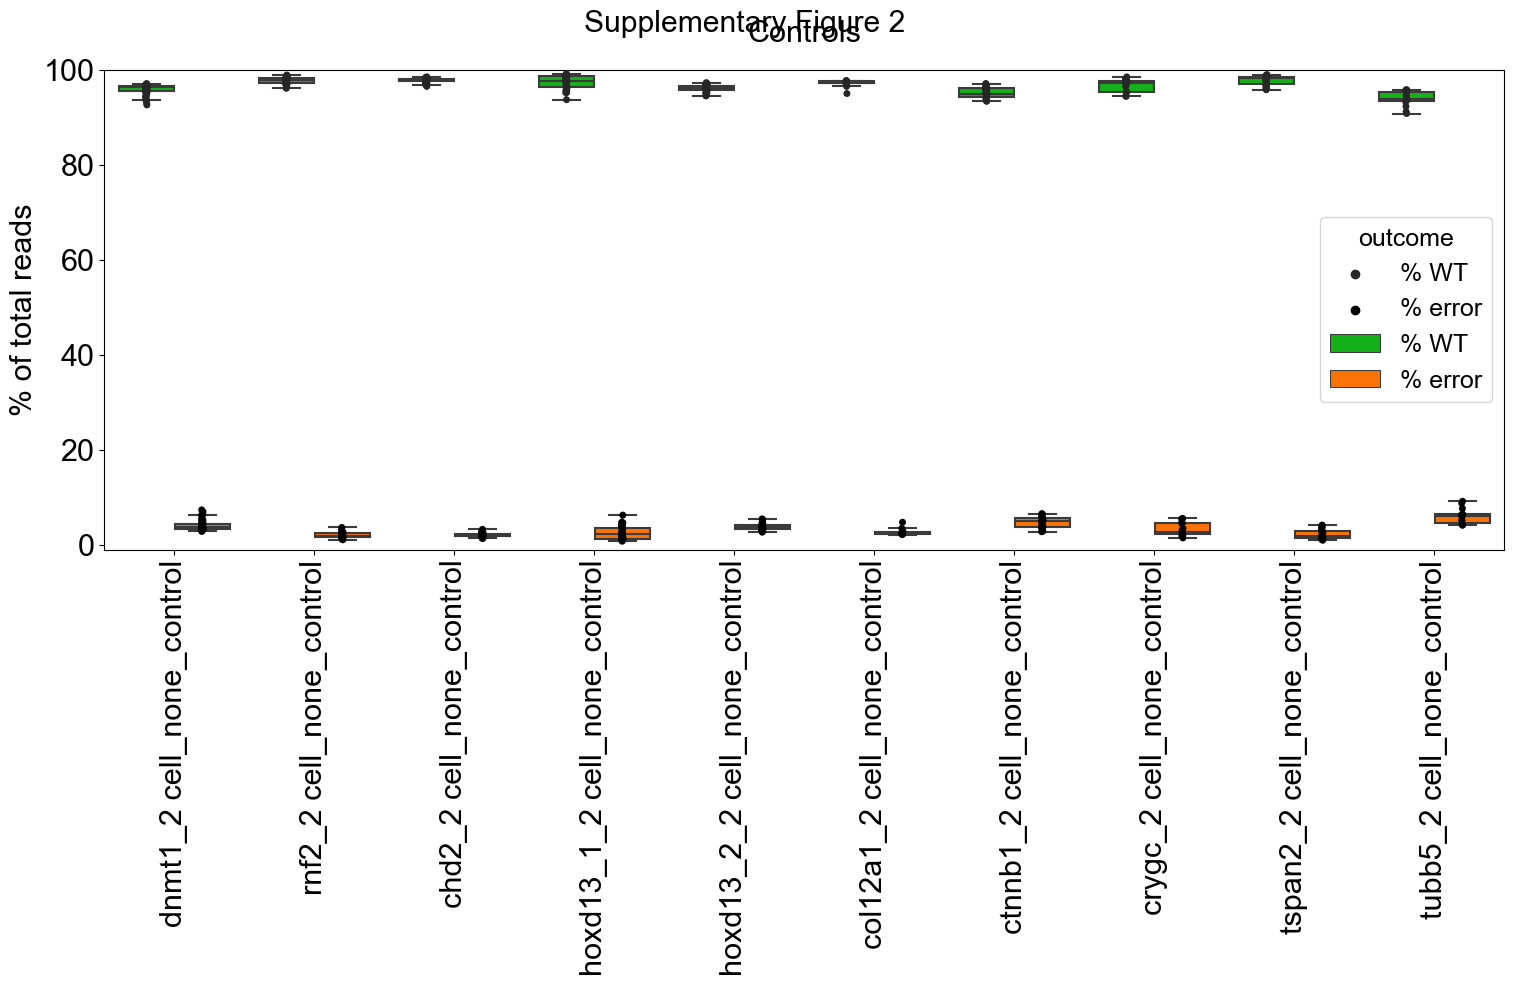

In [69]:
#Supplementary Figure 2

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18

df = pd.read_excel('../PEmbryo_Figure_Data.xlsx',sheet_name='align_2')

print('# entries',len(df))

color0 = sns.xkcd_rgb['green']
color1 = sns.xkcd_rgb['orange']

fig, axes = plt.subplots(1, 1, figsize=(20, 6))
fig.suptitle('Supplementary Figure 2',y=1,x=0.52)

left  = 0.2  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.8   # the amount of height reserved for white space between subplots
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)  

data_1 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='none')&(df["method"]=="control")]
data_2 = df.loc[(df["target"]=='rnf2')&(df["stage"]=='2 cell')&(df["edit"]=='none')&(df["method"]=="control")]
data_3 = df.loc[(df["target"]=='chd2')&(df["stage"]=='2 cell')&(df["edit"]=='none')&(df["method"]=="control")]
data_4 = df.loc[(df["target"]=='hoxd13_1')&(df["stage"]=='2 cell')&(df["edit"]=='none')&(df["method"]=="control")]
data_5 = df.loc[(df["target"]=='hoxd13_2')&(df["stage"]=='2 cell')&(df["edit"]=='none')&(df["method"]=="control")]
data_6 = df.loc[(df["target"]=='col12a1')&(df["stage"]=='2 cell')&(df["edit"]=='none')&(df["method"]=="control")]
#data_7 = df.loc[(df["target"]=='ar2')&(df["stage"]=='2 cell')&(df["edit"]=='none')&(df["method"]=="control")]
data_8 = df.loc[(df["target"]=='ctnnb1')&(df["stage"]=='2 cell')&(df["edit"]=='none')&(df["method"]=="control")]
data_9 = df.loc[(df["target"]=='crygc')&(df["stage"]=='2 cell')&(df["edit"]=='none')&(df["method"]=="control")]
data_10 = df.loc[(df["target"]=='tspan2')&(df["stage"]=='2 cell')&(df["edit"]=='none')&(df["method"]=="control")]
data_11 = df.loc[(df["target"]=='tubb5')&(df["stage"]=='2 cell')&(df["edit"]=='none')&(df["method"]=="control")]

df = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_8,data_9,data_10,data_11],sort=False)
print('selected entries',len(df))
data = df.loc[df['# valid_reads']>1000]

IDs = data['Identifier'].tolist()
WT = data['percent_wt'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error'].tolist()

files = data['filename'].tolist()
print('> 1000 reads',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% WT',WT[i]])
    #data.append([x,'% PE',PE[i]])
    data.append([x,'% error',Error[i]])

print(len(IDs))
print(len(data)) 

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

groups = set(data_df["Identifier"].tolist())
for g in groups:
    print(g,(data_df.Identifier==g).sum()/2)
    
y = "val"

print(data_df)

sns.stripplot(ax=axes,x="Identifier", y=y, hue='outcome',dodge=True,data=data_df,s=5, jitter=0.01,color="black")
sns.boxplot(ax=axes,x="Identifier", y=y, hue='outcome',data=data_df,showfliers=False,palette=[color0,color1],whis=2,saturation=20)

axes.set_title("Controls")

for tick in axes.get_xticklabels():
    tick.set_rotation(90)

for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] +
             axes.get_xticklabels() + axes.get_yticklabels()):
    item.set_fontsize(22)
    

axes.tick_params(axis='x', rotation=90)
axes.set_ylim([-1,100])
axes.set_xlabel("")
axes.set_ylabel('% of total reads')

plt.show()

1074
996
filenames 83
set(filenames) 83
rnf2_zygote_C>G_PE2 20.0
rnf2_zygote_C>G_PE4 11.0
rnf2_zygote_C>G_PE3 19.0
rnf2_zygote_C>G_PE5 17.0
rnf2_zygote_C>G_HDR 16.0
filenames 105
set(filenames) 105
rnf2_2 cell_C>G_PE3 13.0
rnf2_2 cell_C>G_PE4 28.0
rnf2_2 cell_C>G_PE5 17.0
rnf2_2 cell_C>G_HDR 28.0
rnf2_2 cell_C>G_PE2 19.0
filenames 72
set(filenames) 72
chd2_zygote_G>A_PE3 16.0
chd2_zygote_G>A_PE5 12.0
chd2_zygote_G>A_PE2 14.0
chd2_zygote_G>A_PE4 16.0
chd2_zygote_G>A_HDR 14.0
filenames 111
set(filenames) 111
chd2_2 cell_G>A_PE3 19.0
chd2_2 cell_G>A_HDR 31.0
chd2_2 cell_G>A_PE5 16.0
chd2_2 cell_G>A_PE2 20.0
chd2_2 cell_G>A_PE4 25.0


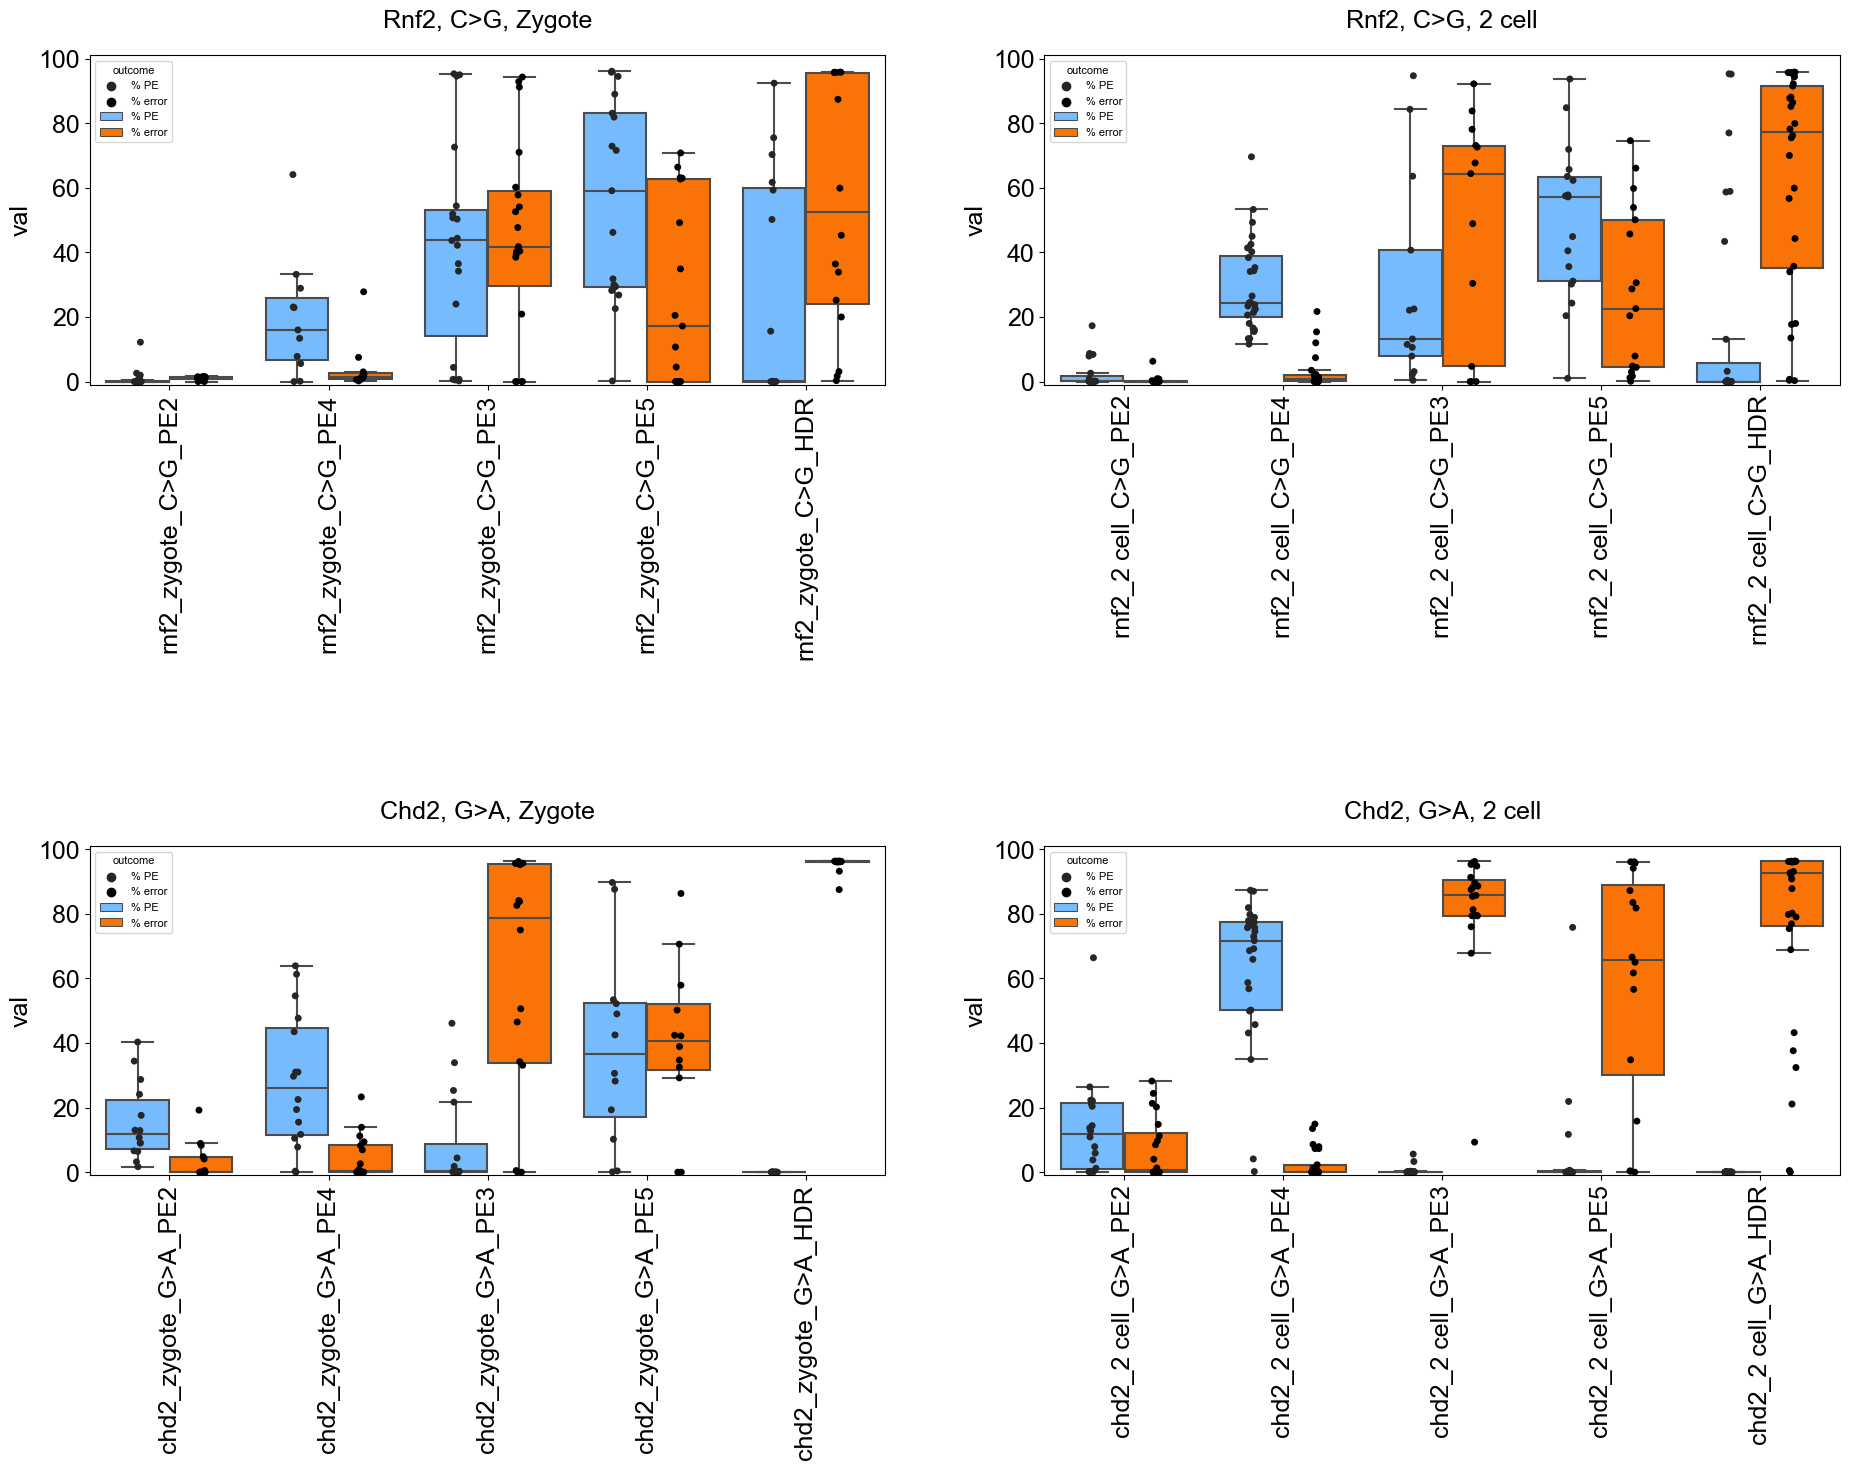

In [70]:
#Figure 1a-b

df = pd.read_excel('../PEmbryo_Figure_Data.xlsx',sheet_name='align_1')
print(len(df))
df = df.loc[df['# valid_reads']>1000]
print(len(df))

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(2, 2, figsize=(25, 14))

left  = 0.2  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 1.4   # the amount of height reserved for white space between subplots
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

y = "val"
saturation = 1
jitter = 0.05
s = 5 #marker size

color1 = sns.xkcd_rgb['sky blue']
color2 = sns.xkcd_rgb['orange'] #coral

#_______RNF2___Zygote_________

data = df.loc[((df["target"]=='rnf2')&(df["stage"]=='zygote')&(df["edit"]=='C>G')) | ((df["target"]=='rnf2')&(df["method"]=='control'))]

order = ['PE2','PE4','PE3','PE5','HDR'] #'PE4 (temporally separated)','PE4 (1.5x)','PE4 (2x)']

data = data.set_index('method',drop=False)
data = data.loc[order]

collect_1=data

IDs = data['Identifier'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error_adjusted'].tolist()

files = data['filename'].tolist()
print('filenames',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PE[i]])
    data.append([x,'% error',Error[i]])

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

for i,x in enumerate(set(IDs)):
    #if i==0:
        #print(rnf2_data_select["ID"].tolist()[0])
    print(x,(data_df.Identifier == x).sum()/2)    
    
sns.stripplot(ax=axes[0, 0],x="Identifier", y=y, data=data_df, s=s, jitter=jitter,color="black",hue='outcome',dodge=True)
sns.boxplot(ax=axes[0, 0],x="Identifier", y=y, data=data_df, showfliers = False,hue='outcome',dodge=True,palette=[color1,color2],saturation=20,whis=1.5)
axes[0,0].set_title("Rnf2, C>G, Zygote")

for item in ([axes[0,0].title, axes[0,0].xaxis.label, axes[0,0].yaxis.label] +
             axes[0,0].get_xticklabels() + axes[0,0].get_yticklabels()):
    item.set_fontsize(18)
    
axes[0,0].tick_params(axis='x', rotation=90)
    

#_______RNF2___2cell_________

data = df.loc[((df["target"]=='rnf2')&(df["stage"]=='2 cell')&(df["edit"]=='C>G')) | ((df["target"]=='rnf2')&(df["method"]=='control'))]

order = ['PE2','PE4','PE3','PE5','HDR'] #'PE4 (temporally separated)','PE4 (1.5x)','PE4 (2x)']

data = data.set_index('method',drop=False)
data = data.loc[order]

collect_2=data

IDs = data['Identifier'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error_adjusted'].tolist()

files = data['filename'].tolist()
print('filenames',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PE[i]])
    data.append([x,'% error',Error[i]])

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

for i,x in enumerate(set(IDs)):
    #if i==0:
        #print(rnf2_data_select["ID"].tolist()[0])
    print(x,(data_df.Identifier == x).sum()/2)    
    
sns.stripplot(ax=axes[0, 1],x="Identifier", y=y, data=data_df, s=s, jitter=jitter,color="black",hue='outcome',dodge=True)
sns.boxplot(ax=axes[0, 1],x="Identifier", y=y, data=data_df, showfliers = False, hue='outcome',dodge=True, palette=[color1,color2],saturation=20,whis=1.5)
axes[0,1].set_title("Rnf2, C>G, 2 cell")

for item in ([axes[0,1].title, axes[0,1].xaxis.label, axes[0,1].yaxis.label] +
             axes[0,1].get_xticklabels() + axes[0,1].get_yticklabels()):
    item.set_fontsize(18)

#_______CHD2___Zygote_________

data = df.loc[((df["target"]=='chd2')&(df["stage"]=='zygote')&(df["edit"]=='G>A')) | ((df["target"]=='chd2')&(df["method"]=='control'))]

order = ['PE2','PE4','PE3','PE5','HDR'] #'PE4 (temporally separated)','PE4 (1.5x)','PE4 (2x)']

data = data.set_index('method',drop=False)
data = data.loc[order]

collect_3=data

IDs = data['Identifier'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error_adjusted'].tolist()

files = data['filename'].tolist()
print('filenames',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PE[i]])
    data.append([x,'% error',Error[i]])

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

for i,x in enumerate(set(IDs)):
    #if i==0:
        #print(rnf2_data_select["ID"].tolist()[0])
    print(x,(data_df.Identifier == x).sum()/2)    
    
sns.stripplot(ax=axes[1, 0],x="Identifier", y=y, data=data_df, s=s, jitter=jitter,color="black",hue='outcome',dodge=True)
sns.boxplot(ax=axes[1, 0],x="Identifier", y=y, data=data_df, showfliers = False, hue='outcome',dodge=True, palette=[color1,color2],saturation=20,whis=1.5)
axes[1,0].set_title("Chd2, G>A, Zygote")

for item in ([axes[1,0].title, axes[1,0].xaxis.label, axes[1,0].yaxis.label] +
             axes[1,0].get_xticklabels() + axes[1,0].get_yticklabels()):
    item.set_fontsize(18)
    

#_______CHD2___2cell_________

data = df.loc[((df["target"]=='chd2')&(df["stage"]=='2 cell')&(df["edit"]=='G>A')) | ((df["target"]=='chd2')&(df["method"]=='control'))]

order = ['PE2','PE4','PE3','PE5','HDR'] #'PE4 (temporally separated)','PE4 (1.5x)','PE4 (2x)']

data = data.set_index('method',drop=False)
data = data.loc[order]

collect_4=data

IDs = data['Identifier'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error_adjusted'].tolist()

files = data['filename'].tolist()
print('filenames',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PE[i]])
    data.append([x,'% error',Error[i]])

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

for i,x in enumerate(set(IDs)):
    #if i==0:
        #print(rnf2_data_select["ID"].tolist()[0])
    print(x,(data_df.Identifier == x).sum()/2)    
    
sns.stripplot(ax=axes[1, 1],x="Identifier", y=y, data=data_df, s=s, jitter=jitter,color="black",hue='outcome',dodge=True)
sns.boxplot(ax=axes[1, 1],x="Identifier", y=y, data=data_df, showfliers = False, hue='outcome',dodge=True, palette=[color1,color2],saturation=20,whis=1.5)
axes[1,1].set_title("Chd2, G>A, 2 cell")

for item in ([axes[1,1].title, axes[1,1].xaxis.label, axes[1,1].yaxis.label] +
             axes[1,1].get_xticklabels() + axes[1,1].get_yticklabels()):
    item.set_fontsize(18)

#______SET PARAMS__________
    
axes[0,0].tick_params(axis='x', rotation=90)
axes[0,1].tick_params(axis='x', rotation=90)
axes[1,0].tick_params(axis='x', rotation=90)
axes[1,1].tick_params(axis='x', rotation=90)
axes[0,0].set_ylim([-1,101])
axes[0,1].set_ylim([-1,101])
axes[1,0].set_ylim([-1,101])
axes[1,1].set_ylim([-1,101])
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[1,0].set_xlabel("")
axes[1,1].set_xlabel("")

plt.show()

1074
996


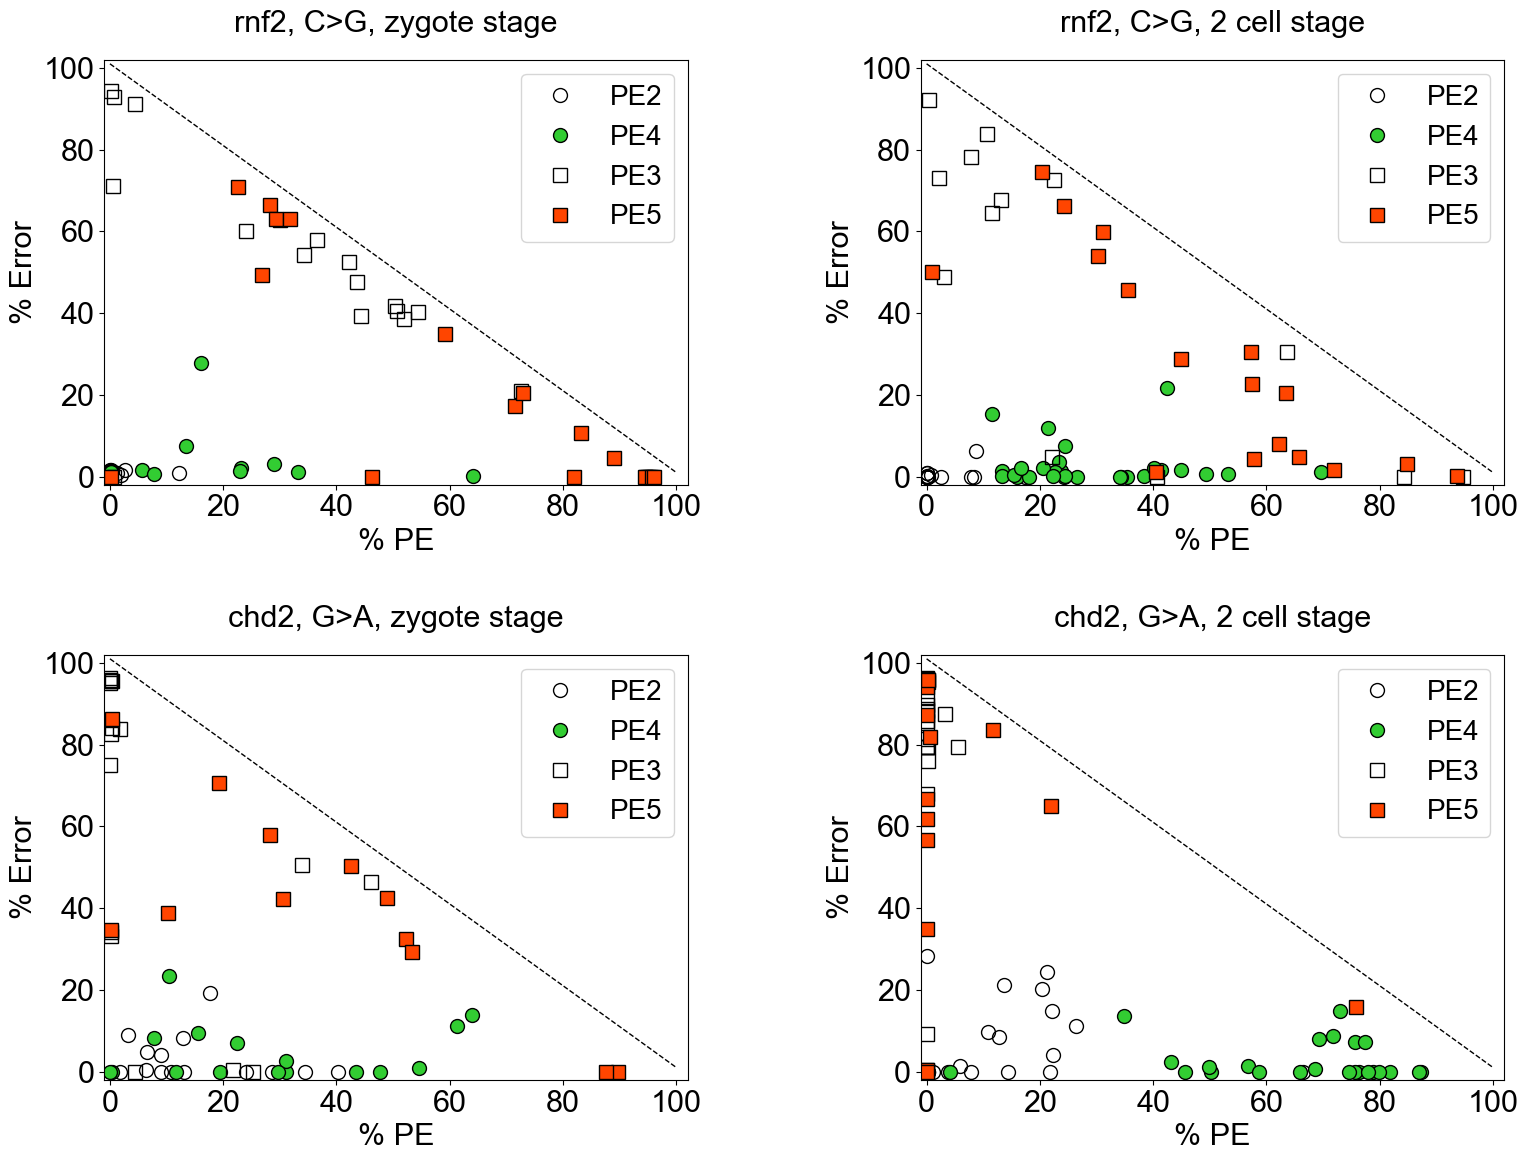

In [71]:
#Supplementary Figure 1d

df = pd.read_excel('../PEmbryo_Figure_Data.xlsx',sheet_name='align_1')
print(len(df))
df = df.loc[df['# valid_reads']>1000]
print(len(df))

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18
fig = plt.figure(figsize=(20,12))
colors = ['limegreen','limegreen','orangered','orangered','lightcoral']

markers = ['o','o','s','s','v']

left  = 0.2  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.95      # the top of the subplots of the figure
wspace = 0.4   # the amount of width reserved for blank space between subplots
hspace = 0.4   # the amount of height reserved for white space between subplots
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

################

data = df.loc[(df["target"]=="rnf2")&(df["stage"]=="zygote")&(df["method"]!="control")]
order = ['PE2','PE4','PE3','PE5']#'PE4 (temporally separated)','PE4 (1.5x)','PE4 (2x)']
data = data.set_index('method',drop=False)
data =data.loc[order]

ax = fig.add_subplot(2, 2, 1)#, projection='2d')

for m,method in enumerate(order):
    d = data.loc[data["method"]==method]
    
    x = d['percent_precise'].tolist()
    y = d['percent_error_adjusted'].tolist()
    z = d['percent_wt'].tolist()
    
    mfc=colors[m]
    mec=colors[m]
    if method in ["PE2","PE3",'HDR']:
        mfc="None"
    else:
        pass
    
    ax.plot(x,y,label=method,color=colors[m],marker=markers[m],linestyle='None',mec='black',markerfacecolor=mfc,markersize=10)

x = np.arange(0,101,1)
y = np.array([101]*len(x))-x
ax.plot(x,y,'k--',linewidth=1)    

ax.set_xlabel("% PE")
ax.set_ylabel("% Error")
ax.legend(loc='upper right',prop={'size': 20})
ax.set_title("rnf2, C>G, zygote stage",pad=20)
ax.set_xlim([-1,102])
ax.set_ylim([-2,102])

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)

################

data = df.loc[(df["target"]=="rnf2")&(df["stage"]=="2 cell")&(df["method"]!="control")]
order = ['PE2','PE4','PE3','PE5']#'PE4 (temporally separated)','PE4 (1.5x)','PE4 (2x)']
data = data.set_index('method',drop=False)
data =data.loc[order]

ax = fig.add_subplot(2, 2, 2)#, projection='2d')

for m,method in enumerate(order):
    d = data.loc[data["method"]==method]
    
    x = d['percent_precise'].tolist()
    y = d['percent_error_adjusted'].tolist()
    z = d['percent_wt'].tolist()
    
    mfc=colors[m]
    mec=colors[m]
    if method in ["PE2","PE3",'HDR']:
        mfc="None"
    else:
        pass
    
    ax.plot(x,y,label=method,color=colors[m],marker=markers[m],linestyle='None',mec='black',markerfacecolor=mfc,markersize=10)

x = np.arange(0,101,1)
y = np.array([101]*len(x))-x
ax.plot(x,y,'k--',linewidth=1)    

ax.set_xlabel("% PE")
ax.set_ylabel("% Error")
ax.legend(loc='upper right',prop={'size': 20})
ax.set_title("rnf2, C>G, 2 cell stage",pad=20)
ax.set_xlim([-1,102])
ax.set_ylim([-2,102])

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)

################

data = df.loc[(df["target"]=="chd2")&(df["edit"]=="G>A")&(df["stage"]=="zygote")&(df["method"]!="control")]
order = ['PE2','PE4','PE3','PE5']#'PE4 (temporally separated)','PE4 (1.5x)','PE4 (2x)']
data = data.set_index('method',drop=False)
data =data.loc[order]

ax = fig.add_subplot(2, 2, 3)#, projection='2d')

for m,method in enumerate(order):
    d = data.loc[data["method"]==method]
    
    x = d['percent_precise'].tolist()
    y = d['percent_error_adjusted'].tolist()
    z = d['percent_wt'].tolist()
    
    mfc=colors[m]
    mec=colors[m]
    if method in ["PE2","PE3",'HDR']:
        mfc="None"
    else:
        pass
    
    ax.plot(x,y,label=method,color=colors[m],marker=markers[m],linestyle='None',mec='black',markerfacecolor=mfc,markersize=10)

x = np.arange(0,101,1)
y = np.array([101]*len(x))-x
ax.plot(x,y,'k--',linewidth=1)    

ax.set_xlabel("% PE")
ax.set_ylabel("% Error")
ax.legend(loc='upper right',prop={'size': 20})
ax.set_title("chd2, G>A, zygote stage",pad=20)
ax.set_xlim([-1,102])
ax.set_ylim([-2,102])

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)

################

data = df.loc[(df["target"]=="chd2")&(df["edit"]=="G>A")&(df["stage"]=="2 cell")&(df["method"]!="control")]
order = ['PE2','PE4','PE3','PE5']#'PE4 (temporally separated)','PE4 (1.5x)','PE4 (2x)']
data = data.set_index('method',drop=False)
data =data.loc[order]

ax = fig.add_subplot(2, 2, 4)#, projection='2d')

for m,method in enumerate(order):
    d = data.loc[data["method"]==method]
    
    x = d['percent_precise'].tolist()
    y = d['percent_error_adjusted'].tolist()
    z = d['percent_wt'].tolist()
    
    mfc=colors[m]
    mec=colors[m]
    if method in ["PE2","PE3",'HDR']:
        mfc="None"
    else:
        pass
    
    ax.plot(x,y,label=method,color=colors[m],marker=markers[m],linestyle='None',mec='black',markerfacecolor=mfc,markersize=10)

x = np.arange(0,101,1)
y = np.array([101]*len(x))-x
ax.plot(x,y,'k--',linewidth=1)    

ax.set_xlabel("% PE")
ax.set_ylabel("% Error")
ax.legend(loc='upper right',prop={'size': 20})
ax.set_title("chd2, G>A, 2 cell stage",pad=20)
ax.set_xlim([-1,102])
ax.set_ylim([-2,102])

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)

plt.show()

# entries 2542
# selected entries 217
> 1000 reads 209
set(filenames) 209
209
418
tspan2_2 cell_+6GtoC_PE4* 24.0
rnf2_zygote_C>G_PE4 11.0
tspan2_zygote_+6GtoC_PE4* 6.0
rnf2_2 cell_C>G_PE4 28.0
dnmt1_2 cell_G>T_PE4 43.0
crygc_zygote_+1Gdel_PE4* 17.0
dnmt1_zygote_G>T_PE4 15.0
chd2_zygote_G>A_PE4 16.0
crygc_2 cell_+1Gdel_PE4* 24.0
chd2_2 cell_G>A_PE4 25.0
                    Identifier  outcome   val
0          chd2_zygote_G>A_PE4     % PE  61.6
1          chd2_zygote_G>A_PE4  % error  12.4
2          chd2_zygote_G>A_PE4     % PE  22.7
3          chd2_zygote_G>A_PE4  % error   8.0
4          chd2_zygote_G>A_PE4     % PE   0.3
..                         ...      ...   ...
413  tspan2_2 cell_+6GtoC_PE4*  % error   2.3
414  tspan2_2 cell_+6GtoC_PE4*     % PE  53.8
415  tspan2_2 cell_+6GtoC_PE4*  % error   0.0
416  tspan2_2 cell_+6GtoC_PE4*     % PE   0.0
417  tspan2_2 cell_+6GtoC_PE4*  % error   0.0

[418 rows x 3 columns]


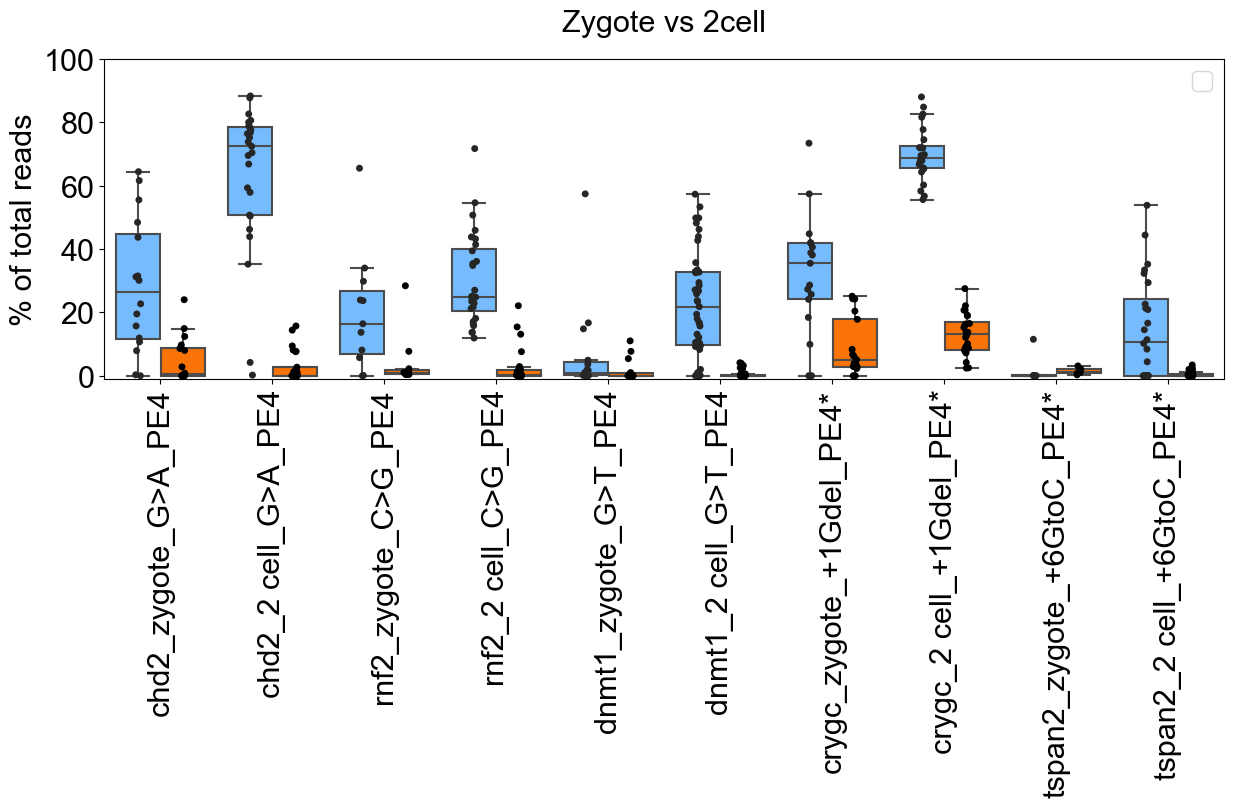

In [72]:
# Supplementary Figure 1e

df = pd.read_excel('../PEmbryo_Figure_Data.xlsx',sheet_name='align_2')

print('# entries',len(df))

color1 = sns.xkcd_rgb['sky blue']
color2 = sns.xkcd_rgb['orange'] #coral

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18
    
IDs = df["Identifier"].tolist()

fig, axes = plt.subplots(1, 1, figsize=(16, 4)) # (22,6) vs. (14,6)

left  = 0.2  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.8   # the amount of height reserved for white space between subplots
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

data_1 = df.loc[(df["target"]=='chd2')&(df["stage"]=='zygote')&(df["edit"]=='G>A')&(df["method"]=="PE4")]
data_2 = df.loc[(df["target"]=='chd2')&(df["stage"]=='2 cell')&(df["edit"]=='G>A')&(df["method"]=="PE4")]
data_3 = df.loc[(df["target"]=='rnf2')&(df["stage"]=='zygote')&(df["edit"]=='C>G')&(df["method"]=="PE4")]
data_4 = df.loc[(df["target"]=='rnf2')&(df["stage"]=='2 cell')&(df["edit"]=='C>G')&(df["method"]=="PE4")]
data_5 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='zygote')&(df["edit"]=='G>T')&(df["method"]=="PE4")]
data_6 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='G>T')&(df["method"]=="PE4")]
data_7 = df.loc[(df["target"]=='crygc')&(df["stage"]=='zygote')&(df["edit"]=='+1Gdel')&(df["method"]=="PE4*")]
data_8 = df.loc[(df["target"]=='crygc')&(df["stage"]=='2 cell')&(df["edit"]=='+1Gdel')&(df["method"]=="PE4*")]
data_9 = df.loc[(df["target"]=='tspan2')&(df["stage"]=='zygote')&(df["edit"]=='+6GtoC')&(df["method"]=="PE4*")]
data_10 = df.loc[(df["target"]=='tspan2')&(df["stage"]=='2 cell')&(df["edit"]=='+6GtoC')&(df["method"]=="PE4*")]

df = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10],sort=False)
print('# selected entries',len(df))
data = df.loc[df['# valid_reads']>1000]

IDs = data['Identifier'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error_adjusted'].tolist()

files = data['filename'].tolist()
print('> 1000 reads',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PE[i]])
    data.append([x,'% error',Error[i]])

print(len(IDs))
print(len(data)) 

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

groups = set(data_df["Identifier"].tolist())
for g in groups:
    print(g,(data_df.Identifier==g).sum()/2)
    
y = "val"

print(data_df)

sns.stripplot(ax=axes,x="Identifier", y=y, hue='outcome',dodge=True,data=data_df,s=5, jitter=0.05,color="black")
sns.boxplot(ax=axes,x="Identifier", y=y, hue='outcome',data=data_df,showfliers=False,palette=[color1,color2],whis=1.5,saturation=20)

axes.set_title("Zygote vs 2cell")

for tick in axes.get_xticklabels():
    tick.set_rotation(90)

for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] +
             axes.get_xticklabels() + axes.get_yticklabels()):
    item.set_fontsize(22)
    

axes.tick_params(axis='x', rotation=90)
axes.set_ylim([-1,100])
plt.yticks([0,20,40,60,80,100])
axes.set_xlabel("")
axes.set_ylabel('% of total reads')
plt.legend([])

plt.show()


# entries 2542
# selected entries 217
> 1000 reads 209
set(filenames) 209
209
418
tspan2_2 cell_+6GtoC_PE4* 24.0
rnf2_zygote_C>G_PE4 11.0
tspan2_zygote_+6GtoC_PE4* 6.0
rnf2_2 cell_C>G_PE4 28.0
dnmt1_2 cell_G>T_PE4 43.0
crygc_zygote_+1Gdel_PE4* 17.0
dnmt1_zygote_G>T_PE4 15.0
chd2_zygote_G>A_PE4 16.0
crygc_2 cell_+1Gdel_PE4* 24.0
chd2_2 cell_G>A_PE4 25.0
                    Identifier  outcome   val
0          chd2_zygote_G>A_PE4     % PE  61.6
1          chd2_zygote_G>A_PE4  % error  12.4
2          chd2_zygote_G>A_PE4     % PE  22.7
3          chd2_zygote_G>A_PE4  % error   8.0
4          chd2_zygote_G>A_PE4     % PE   0.3
..                         ...      ...   ...
413  tspan2_2 cell_+6GtoC_PE4*  % error   2.3
414  tspan2_2 cell_+6GtoC_PE4*     % PE  53.8
415  tspan2_2 cell_+6GtoC_PE4*  % error   0.0
416  tspan2_2 cell_+6GtoC_PE4*     % PE   0.0
417  tspan2_2 cell_+6GtoC_PE4*  % error   0.0

[418 rows x 3 columns]
chd2 16 16 25 25
rnf2 11 11 28 28
dnmt1 15 15 43 43
crygc 17 17 24 24

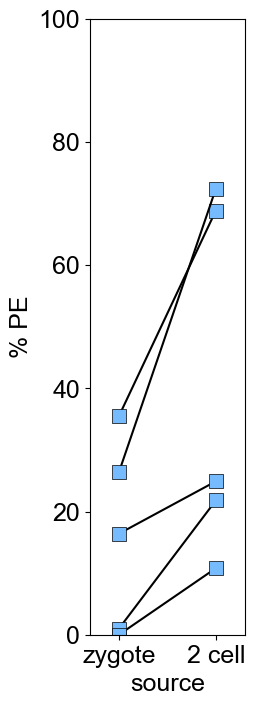

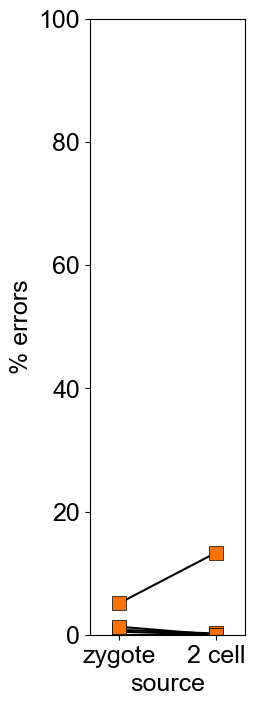

In [73]:
# Figure 1c

df = pd.read_excel('../PEmbryo_Figure_Data.xlsx',sheet_name='align_2')

print('# entries',len(df))

color1 = sns.xkcd_rgb['sky blue']
color2 = sns.xkcd_rgb['orange'] #coral

#________________________________________

data_1 = df.loc[(df["target"]=='chd2')&(df["stage"]=='zygote')&(df["edit"]=='G>A')&(df["method"]=="PE4")]
data_2 = df.loc[(df["target"]=='chd2')&(df["stage"]=='2 cell')&(df["edit"]=='G>A')&(df["method"]=="PE4")]
data_3 = df.loc[(df["target"]=='rnf2')&(df["stage"]=='zygote')&(df["edit"]=='C>G')&(df["method"]=="PE4")]
data_4 = df.loc[(df["target"]=='rnf2')&(df["stage"]=='2 cell')&(df["edit"]=='C>G')&(df["method"]=="PE4")]
data_5 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='zygote')&(df["edit"]=='G>T')&(df["method"]=="PE4")]
data_6 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='G>T')&(df["method"]=="PE4")]
data_7 = df.loc[(df["target"]=='crygc')&(df["stage"]=='zygote')&(df["edit"]=='+1Gdel')&(df["method"]=="PE4*")]
data_8 = df.loc[(df["target"]=='crygc')&(df["stage"]=='2 cell')&(df["edit"]=='+1Gdel')&(df["method"]=="PE4*")]
data_9 = df.loc[(df["target"]=='tspan2')&(df["stage"]=='zygote')&(df["edit"]=='+6GtoC')&(df["method"]=="PE4*")]
data_10 = df.loc[(df["target"]=='tspan2')&(df["stage"]=='2 cell')&(df["edit"]=='+6GtoC')&(df["method"]=="PE4*")]

df = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10],sort=False)
print('# selected entries',len(df))
data = df.loc[df['# valid_reads']>1000]

IDs = data['Identifier'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error_adjusted'].tolist()

files = data['filename'].tolist()
print('> 1000 reads',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PE[i]])
    data.append([x,'% error',Error[i]])

print(len(IDs))
print(len(data)) 

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

groups = set(data_df["Identifier"].tolist())
for g in groups:
    print(g,(data_df.Identifier==g).sum()/2)
    
y = "val"

print(data_df)

targets = ['chd2','rnf2','dnmt1','crygc','tspan2']

results = []

for t in targets:
    target_zygote_PE = []
    target_zygote_error = []
    target_2_cell_PE = []
    target_2_cell_error = []
    
    for row in data_df.iterrows():
        if t in row[1]['Identifier'] and "zygote" in row[1]['Identifier'] and row[1]['outcome']=='% PE':
            target_zygote_PE.append(row[1]['val'])
        elif t in row[1]['Identifier'] and "zygote" in row[1]['Identifier'] and row[1]['outcome']=='% error':
            target_zygote_error.append(row[1]['val'])
        elif t in row[1]['Identifier'] and "2 cell" in row[1]['Identifier'] and row[1]['outcome']=='% PE':
            target_2_cell_PE.append(row[1]['val'])
        elif t in row[1]['Identifier'] and "2 cell" in row[1]['Identifier'] and row[1]['outcome']=='% error':
            target_2_cell_error.append(row[1]['val'])
            
    print(t,len(target_zygote_PE),len(target_zygote_error),len(target_2_cell_PE),len(target_2_cell_error))
    results.append([t,'precise edit',np.median(target_zygote_PE),'zygote'])
    results.append([t,"precise edit",np.median(target_2_cell_PE),'2 cell'])
    results.append([t,'errors',np.median(target_zygote_error),'zygote'])
    results.append([t,"errors",np.median(target_2_cell_error),'2 cell'])

x_df = pd.DataFrame(results,columns=['target','type','val','source'])

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18

plt.figure(figsize=(2,8))

markers=['s','s','s','s','s','s']

for t,target in enumerate(set(x_df['target'].tolist())):
    
    y1 = x_df.loc[(x_df['target']==target)&(x_df['source']=='zygote')&(x_df['type']=='precise edit')]['val'].tolist()[0]
    y2 = x_df.loc[(x_df['target']==target)&(x_df['source']=='2 cell')&(x_df['type']=='precise edit')]['val'].tolist()[0]


    plt.plot(['zygote','2 cell'],[float(y1),float(y2)],c='black',linestyle='-',zorder=1)
    plt.scatter(['zygote'],[float(y1)],c=color1,alpha=1,s=100,edgecolor='black',linewidth=0.5,marker=markers[t])
    plt.scatter(['2 cell'],[float(y2)],c=color1,alpha=1,s=100,edgecolor='black',linewidth=0.5,marker=markers[t])
    
plt.ylim([0,100])
plt.margins(x=0.3, y=0)
plt.xlabel('source')
plt.ylabel('% PE')

plt.show()

###############################################

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18

plt.figure(figsize=(2,8))

markers=['s','s','s','s','s','s']

for t,target in enumerate(set(x_df['target'].tolist())):
    
    
    y1 = x_df.loc[(x_df['target']==target)&(x_df['source']=='zygote')&(x_df['type']=='errors')]['val'].tolist()[0]
    y2 = x_df.loc[(x_df['target']==target)&(x_df['source']=='2 cell')&(x_df['type']=='errors')]['val'].tolist()[0]


    plt.plot(['zygote','2 cell'],[float(y1),float(y2)],c='black',linestyle='-',zorder=1)
    plt.scatter(['zygote'],[float(y1)],c=color2,alpha=1,s=100,edgecolor='black',linewidth=0.5,marker=markers[t])
    plt.scatter(['2 cell'],[float(y2)],c=color2,alpha=1,s=100,edgecolor='black',linewidth=0.5,marker=markers[t])
    
plt.ylim([0,100])
plt.margins(x=0.3, y=0)
plt.xlabel('source')
plt.ylabel('% errors')

plt.show()



# entries 2542
selected entries 263
> 1000 reads 252
set(filenames) 252
252
504
rnf2_2 cell_C>G_PE4 28.0
col12a1_2 cell_+2AtoC_PE4* 20.0
col12a1_2 cell_+2AtoC_PE2* 27.0
rnf2_2 cell_C>G_PE2 19.0
tubb5_2 cell_G>A_PE4* 16.0
tubb5_2 cell_G>A_PE2* 25.0
ctnnb1_2 cell_+6GtoA_PE4* 48.0
ctnnb1_2 cell_+6GtoA_PE2* 24.0
chd2_2 cell_G>A_PE2 20.0
chd2_2 cell_G>A_PE4 25.0


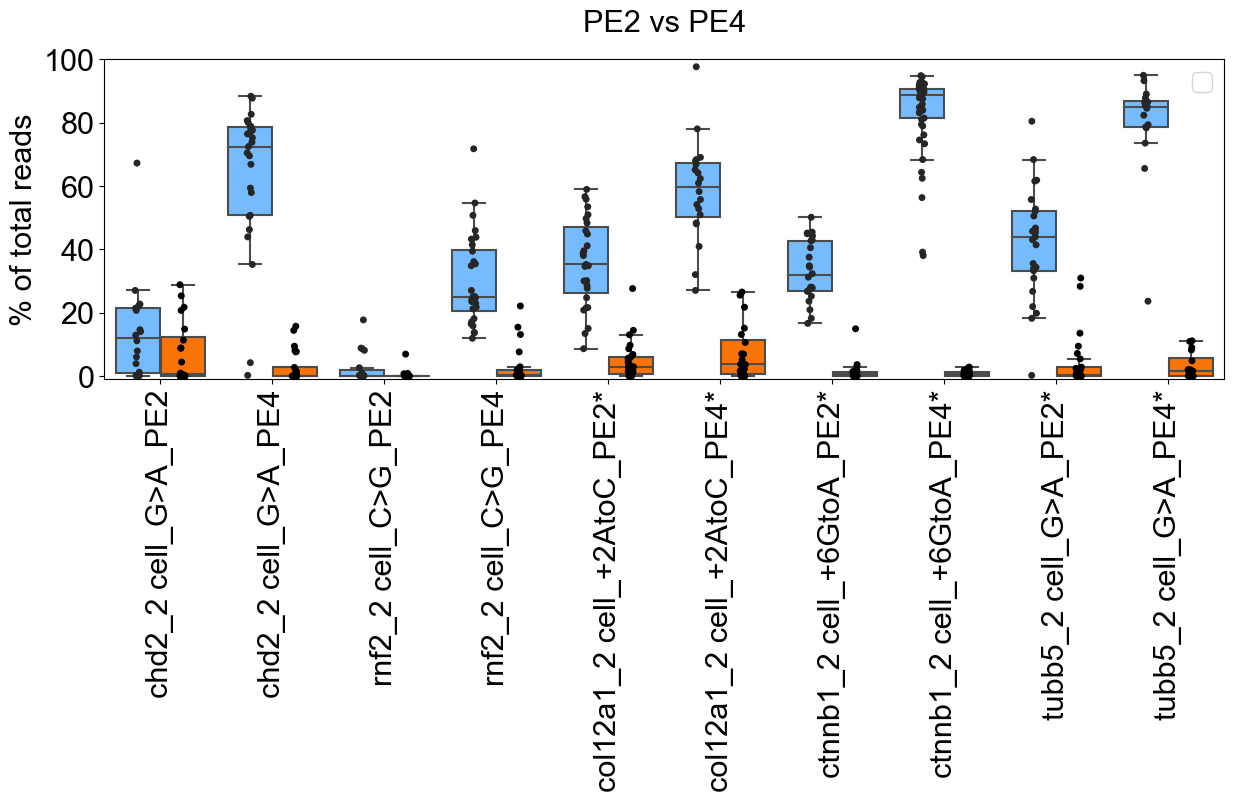

In [74]:
# Supplementary Figure 1f

df = pd.read_excel('../PEmbryo_Figure_Data.xlsx',sheet_name='align_2')

print('# entries',len(df))

color1 = sns.xkcd_rgb['sky blue']
color2 = sns.xkcd_rgb['orange'] #coral

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18

fig, axes = plt.subplots(1, 1, figsize=(16, 4)) #(22,6)) vs. (14,6)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18

left  = 0.2  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.8   # the amount of height reserved for white space between subplots
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
#fig.suptitle('Geeksforgeeks - 2 x 3 axes Box plot with data')


data_1 = df.loc[(df["target"]=='chd2')&(df["stage"]=='2 cell')&(df["edit"]=='G>A')&(df["method"]=="PE2")]
data_2 = df.loc[(df["target"]=='chd2')&(df["stage"]=='2 cell')&(df["edit"]=='G>A')&(df["method"]=="PE4")]
data_3 = df.loc[(df["target"]=='rnf2')&(df["stage"]=='2 cell')&(df["edit"]=='C>G')&(df["method"]=="PE2")]
data_4 = df.loc[(df["target"]=='rnf2')&(df["stage"]=='2 cell')&(df["edit"]=='C>G')&(df["method"]=="PE4")]
data_5 = df.loc[(df["target"]=='col12a1')&(df["stage"]=='2 cell')&(df["edit"]=='+2AtoC')&(df["method"]=="PE2*")]
data_6 = df.loc[(df["target"]=='col12a1')&(df["stage"]=='2 cell')&(df["edit"]=='+2AtoC')&(df["method"]=="PE4*")]
data_7 = df.loc[(df["target"]=='ctnnb1')&(df["stage"]=='2 cell')&(df["edit"]=='+6GtoA')&(df["method"]=="PE2*")]
data_8 = df.loc[(df["target"]=='ctnnb1')&(df["stage"]=='2 cell')&(df["edit"]=='+6GtoA')&(df["method"]=="PE4*")]
data_9 = df.loc[(df["target"]=='tubb5')&(df["stage"]=='2 cell')&(df["edit"]=='G>A')&(df["method"]=="PE2*")]
data_10 = df.loc[(df["target"]=='tubb5')&(df["stage"]=='2 cell')&(df["edit"]=='G>A')&(df["method"]=="PE4*")]

df = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10],sort=False)
print('selected entries',len(df))
data = df.loc[df['# valid_reads']>1000]

#data.to_excel("final_tables/Figure_2_part_II.xlsx")

IDs = data['Identifier'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error_adjusted'].tolist()

files = data['filename'].tolist()
print('> 1000 reads',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PE[i]])
    data.append([x,'% error',Error[i]])

print(len(IDs))
print(len(data)) 

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

groups = set(data_df["Identifier"].tolist())
for g in groups:
    print(g,(data_df.Identifier==g).sum()/2)
    
y = "val"

sns.stripplot(ax=axes,x="Identifier", y=y, hue='outcome',dodge=True,data=data_df,s=5, jitter=0.05,color="black")
sns.boxplot(ax=axes,x="Identifier", y=y, hue='outcome',data=data_df,showfliers=False,palette=[color1,color2],whis=1.5,saturation=20)
#sns.violinplot(ax=axes,x="Identifier", y=y, hue='outcome',data=data_df)

#sns.violinplot(ax=axes,x="Identifier", y=y, data=data,showfliers=False,palette=colors,saturation=1)
axes.set_title("PE2 vs PE4")

for tick in axes.get_xticklabels():
    tick.set_rotation(90)

for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] +
             axes.get_xticklabels() + axes.get_yticklabels()):
    item.set_fontsize(22)
    
axes.tick_params(axis='x', rotation=90)
axes.set_ylim([-1,100])
plt.yticks([0,20,40,60,80,100])
plt.legend([])
axes.set_xlabel("")
axes.set_ylabel('% of total reads')

plt.show()


# entries 2542
# selected entries 307
> 1000 reads 293
set(filenames) 293
293
586
rnf2_2 cell_C>G_PE4 28.0
col12a1_2 cell_+2AtoC_PE4* 20.0
hoxd13_1_2 cell_G>T_PE2 22.0
col12a1_2 cell_+2AtoC_PE2* 27.0
rnf2_2 cell_C>G_PE2 19.0
tubb5_2 cell_G>A_PE4* 16.0
tubb5_2 cell_G>A_PE2* 25.0
ctnnb1_2 cell_+6GtoA_PE4* 48.0
ctnnb1_2 cell_+6GtoA_PE2* 24.0
chd2_2 cell_G>A_PE2 20.0
hoxd13_1_2 cell_G>T_PE4 19.0
chd2_2 cell_G>A_PE4 25.0
                  Identifier  outcome   val
0        chd2_2 cell_G>A_PE2     % PE  21.4
1        chd2_2 cell_G>A_PE2  % error  25.3
2        chd2_2 cell_G>A_PE2     % PE  20.7
3        chd2_2 cell_G>A_PE2  % error  20.7
4        chd2_2 cell_G>A_PE2     % PE  22.0
..                       ...      ...   ...
581  hoxd13_1_2 cell_G>T_PE4  % error   1.2
582  hoxd13_1_2 cell_G>T_PE4     % PE  62.2
583  hoxd13_1_2 cell_G>T_PE4  % error   0.0
584  hoxd13_1_2 cell_G>T_PE4     % PE  39.6
585  hoxd13_1_2 cell_G>T_PE4  % error   0.0

[586 rows x 3 columns]
chd2 20 20 25 25
rnf2 19 19 

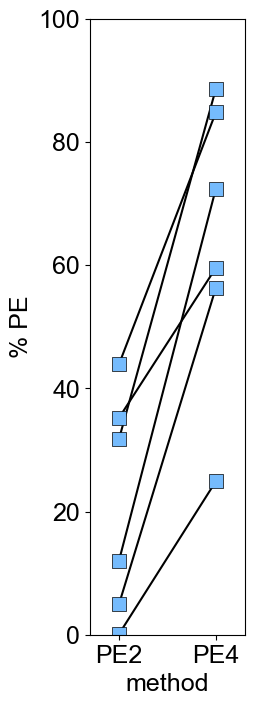

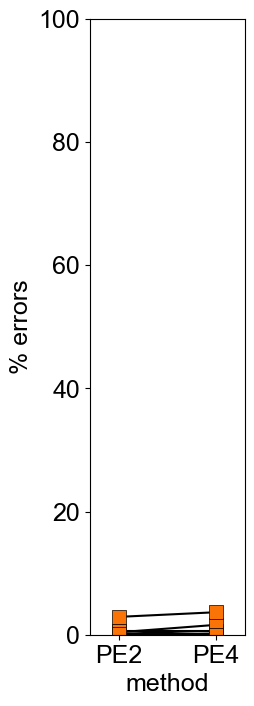

In [75]:
# Figure 1d

df = pd.read_excel('../PEmbryo_Figure_Data.xlsx',sheet_name='align_2')

print('# entries',len(df))

color1 = sns.xkcd_rgb['sky blue']
color2 = sns.xkcd_rgb['orange'] #coral
#________________________________________

data_1 = df.loc[(df["target"]=='chd2')&(df["stage"]=='2 cell')&(df["edit"]=='G>A')&(df["method"]=="PE2")]
data_2 = df.loc[(df["target"]=='chd2')&(df["stage"]=='2 cell')&(df["edit"]=='G>A')&(df["method"]=="PE4")]
data_3 = df.loc[(df["target"]=='rnf2')&(df["stage"]=='2 cell')&(df["edit"]=='C>G')&(df["method"]=="PE2")]
data_4 = df.loc[(df["target"]=='rnf2')&(df["stage"]=='2 cell')&(df["edit"]=='C>G')&(df["method"]=="PE4")]
data_5 = df.loc[(df["target"]=='col12a1')&(df["stage"]=='2 cell')&(df["edit"]=='+2AtoC')&(df["method"]=="PE2*")]
data_6 = df.loc[(df["target"]=='col12a1')&(df["stage"]=='2 cell')&(df["edit"]=='+2AtoC')&(df["method"]=="PE4*")]
data_7 = df.loc[(df["target"]=='ctnnb1')&(df["stage"]=='2 cell')&(df["edit"]=='+6GtoA')&(df["method"]=="PE2*")]
data_8 = df.loc[(df["target"]=='ctnnb1')&(df["stage"]=='2 cell')&(df["edit"]=='+6GtoA')&(df["method"]=="PE4*")]
data_9 = df.loc[(df["target"]=='tubb5')&(df["stage"]=='2 cell')&(df["edit"]=='G>A')&(df["method"]=="PE2*")]
data_10 = df.loc[(df["target"]=='tubb5')&(df["stage"]=='2 cell')&(df["edit"]=='G>A')&(df["method"]=="PE4*")]
data_11 = df.loc[(df["target"]=='hoxd13_1')&(df["stage"]=='2 cell')&(df["edit"]=='G>T')&(df["method"]=="PE2")]
data_12 = df.loc[(df["target"]=='hoxd13_1')&(df["stage"]=='2 cell')&(df["edit"]=='G>T')&(df["method"]=="PE4")]


df = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12],sort=False)
print('# selected entries',len(df))
data = df.loc[df['# valid_reads']>1000]

#data.to_excel("final_tables/Figure_2_part_II.xlsx")


IDs = data['Identifier'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error_adjusted'].tolist()

files = data['filename'].tolist()
print('> 1000 reads',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PE[i]])
    data.append([x,'% error',Error[i]])

print(len(IDs))
print(len(data)) 

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

groups = set(data_df["Identifier"].tolist())
for g in groups:
    print(g,(data_df.Identifier==g).sum()/2)
    
y = "val"

print(data_df)

targets = ['chd2','rnf2','col12a','ctnnb1','tubb5','hoxd13_1']

results = []

for t in targets:
    target_PE2_PE = []
    target_PE2_error = []
    target_PE4_PE = []
    target_PE4_error = []
    
    for row in data_df.iterrows():
        if t in row[1]['Identifier'] and "PE2" in row[1]['Identifier'] and row[1]['outcome']=='% PE':
            target_PE2_PE.append(row[1]['val'])
        elif t in row[1]['Identifier'] and "PE2" in row[1]['Identifier'] and row[1]['outcome']=='% error':
            target_PE2_error.append(row[1]['val'])
        elif t in row[1]['Identifier'] and "PE4" in row[1]['Identifier'] and row[1]['outcome']=='% PE':
            target_PE4_PE.append(row[1]['val'])
        elif t in row[1]['Identifier'] and "PE4" in row[1]['Identifier'] and row[1]['outcome']=='% error':
            target_PE4_error.append(row[1]['val'])
            
    print(t,len(target_PE2_PE),len(target_PE2_error),len(target_PE4_PE),len(target_PE4_error))
    results.append([t,"precise edit",np.median(target_PE2_PE),'PE2'])
    results.append([t,"precise edit",np.median(target_PE4_PE),'PE4'])
    results.append([t,"errors",np.median(target_PE2_error),'PE2'])
    results.append([t,"errors",np.median(target_PE4_error),'PE4'])

x_df = pd.DataFrame(results,columns=['target','type','val','method'])

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18

plt.figure(figsize=(2,8))

markers=['s','s','s','s','s','s']

for t,target in enumerate(set(x_df['target'].tolist())):
    
    y1 = x_df.loc[(x_df['target']==target)&(x_df['method']=='PE2')&(x_df['type']=='precise edit')]['val'].tolist()[0]
    y2 = x_df.loc[(x_df['target']==target)&(x_df['method']=='PE4')&(x_df['type']=='precise edit')]['val'].tolist()[0]


    plt.plot(['PE2','PE4'],[float(y1),float(y2)],c='black',linestyle='-',zorder=1)
    plt.scatter(['PE2'],[float(y1)],c=color1,alpha=1,s=100,edgecolor='black',linewidth=0.5,marker=markers[t])
    plt.scatter(['PE4'],[float(y2)],c=color1,alpha=1,s=100,edgecolor='black',linewidth=0.5,marker=markers[t])
    
plt.ylim([0,100])
plt.margins(x=0.3, y=0)
plt.xlabel('method')
plt.ylabel('% PE')

plt.show()

###############################################

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18

plt.figure(figsize=(2,8))

markers=['s','s','s','s','s','s']

for t,target in enumerate(set(x_df['target'].tolist())):
    
    y1 = x_df.loc[(x_df['target']==target)&(x_df['method']=='PE2')&(x_df['type']=='errors')]['val'].tolist()[0]
    y2 = x_df.loc[(x_df['target']==target)&(x_df['method']=='PE4')&(x_df['type']=='errors')]['val'].tolist()[0]


    plt.plot(['PE2','PE4'],[float(y1),float(y2)],c='black',linestyle='-',zorder=1)
    plt.scatter(['PE2'],[float(y1)],c=color2,alpha=1,s=100,edgecolor='black',linewidth=0.5,marker=markers[t])
    plt.scatter(['PE4'],[float(y2)],c=color2,alpha=1,s=100,edgecolor='black',linewidth=0.5,marker=markers[t])
    
plt.ylim([0,100])
plt.margins(x=0.3, y=0)
plt.xlabel('method')
plt.ylabel('% errors')

plt.show()


2542
2335
filenames 98
set(filenames) 98
dnmt1_2 cell_G>C_PE4 18.0
dnmt1_2 cell_G>C_PE2 14.0
dnmt1_2 cell_G>T_PE4 43.0
dnmt1_2 cell_G>T_PE2 23.0
filenames 79
set(filenames) 79
hoxd13_1_2 cell_G>C_PE4 17.0
hoxd13_1_2 cell_G>C_PE2 21.0
hoxd13_1_2 cell_G>T_PE4 19.0
hoxd13_1_2 cell_G>T_PE2 22.0
filenames 96
set(filenames) 96
chd2_2 cell_G>C_PE2 26.0
chd2_2 cell_G>A_PE2 20.0
chd2_2 cell_G>C_PE4 25.0
chd2_2 cell_G>A_PE4 25.0


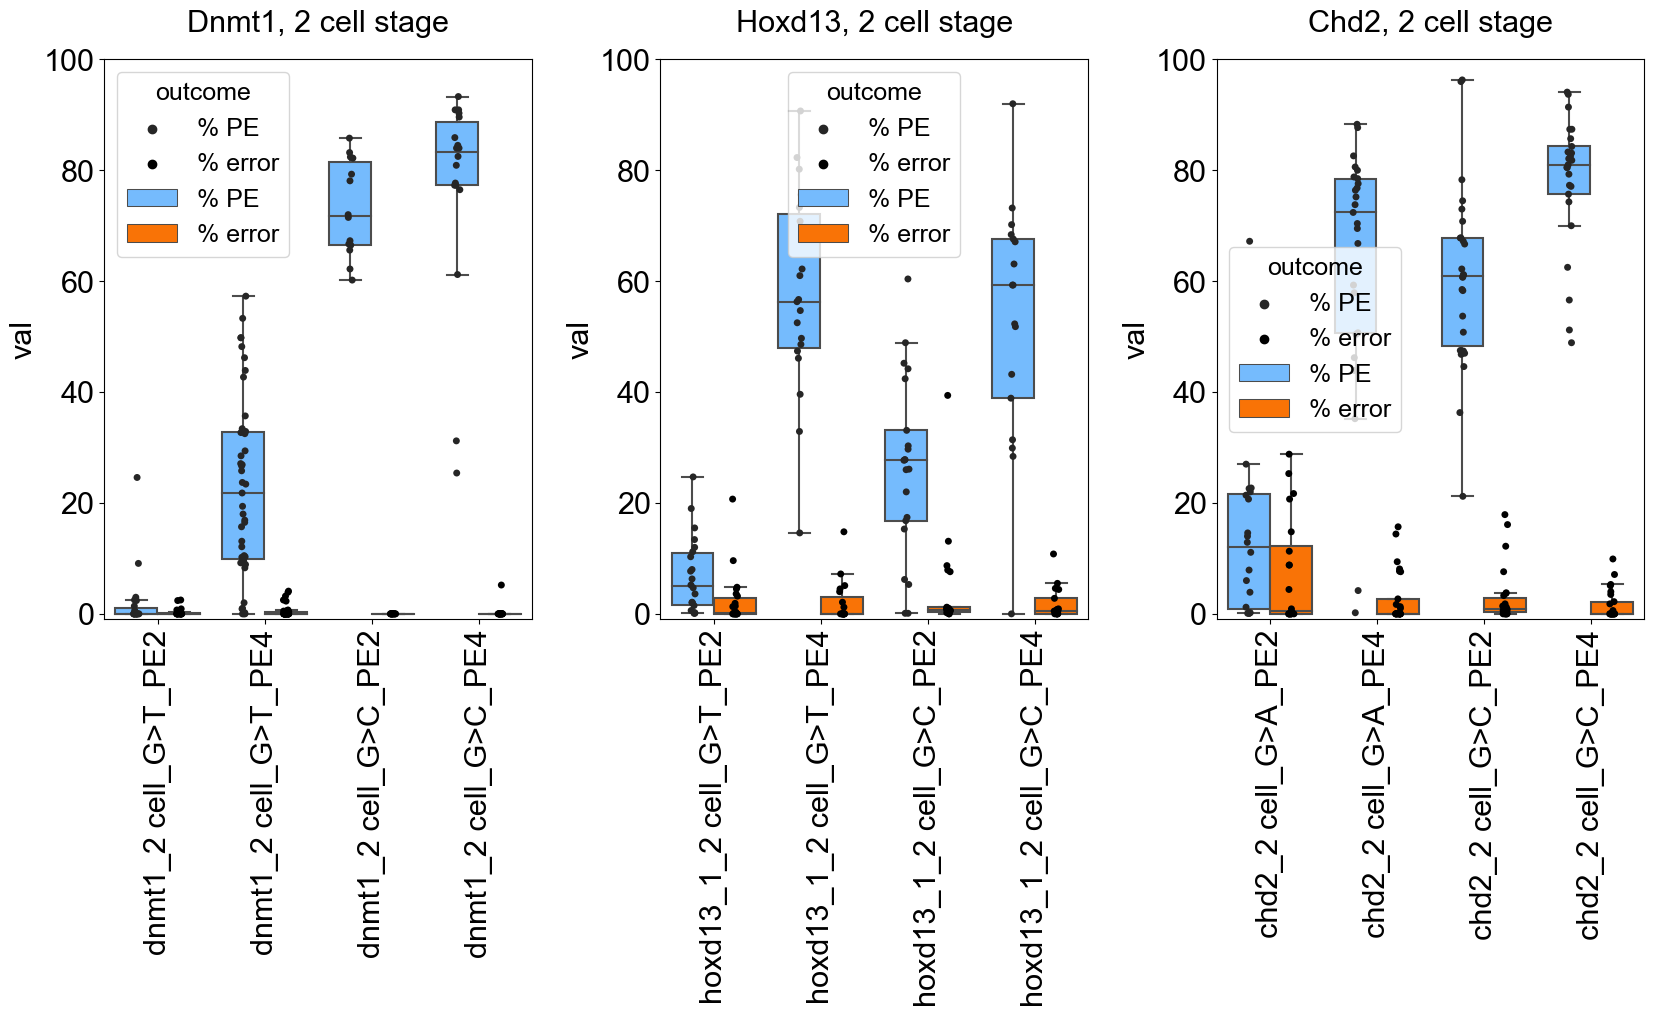

In [76]:
# Figure 1e

df = pd.read_excel('../PEmbryo_Figure_Data.xlsx',sheet_name='align_2')
print(len(df))
df = df.loc[df['# valid_reads']>1000]
print(len(df))

color1 = sns.xkcd_rgb['sky blue']
color2 = sns.xkcd_rgb['orange'] #coral

#dnmt1
#G>T
#G>C
#chd2
#G>A
#G>C
#hoxd13
#G>T
#G>C

fig, axes = plt.subplots(1, 3, figsize=(22, 7),facecolor='white')
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18

left  = 0.2  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.8   # the amount of height reserved for white space between subplots
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
#fig.suptitle('Geeksforgeeks - 2 x 3 axes Box plot with data')

jitter=0.05

y = "val"

#______DNMT1_________    

data_1 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='G>T')&(df["method"]=="PE2")]
data_2 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='G>T')&(df["method"]=="PE4")]
data_3 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='G>C')&(df["method"]=="PE2")]
data_4 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='G>C')&(df["method"]=="PE4")]

data = pd.concat([data_1,data_2,data_3,data_4],sort=False)
data = data.loc[data['# valid_reads']>1000]

collect_1=data

IDs = data['Identifier'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error_adjusted'].tolist()

files = data['filename'].tolist()
print('filenames',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PE[i]])
    data.append([x,'% error',Error[i]])

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

for i,x in enumerate(set(IDs)):
    #if i==0:
        #print(rnf2_data_select["ID"].tolist()[0])
    print(x,(data_df.Identifier == x).sum()/2)    
    
sns.stripplot(ax=axes[0],x="Identifier", y=y, data=data_df, s=s, jitter=jitter,color="black",hue='outcome',dodge=True)
sns.boxplot(ax=axes[0],x="Identifier", y=y, data=data_df, showfliers = False,hue='outcome',dodge=True,palette=[color1,color2],saturation=20,whis=1.5)
axes[0].set_title("Dnmt1, 2 cell stage")

for item in ([axes[0].title, axes[0].xaxis.label, axes[0].yaxis.label] +
             axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    item.set_fontsize(22)
    
    
#______HOXD13_________   

data_1 = df.loc[(df["target"]=='hoxd13_1')&(df["stage"]=='2 cell')&(df["edit"]=='G>T')&(df["method"]=="PE2")]
data_2 = df.loc[(df["target"]=='hoxd13_1')&(df["stage"]=='2 cell')&(df["edit"]=='G>T')&(df["method"]=="PE4")]
data_3 = df.loc[(df["target"]=='hoxd13_1')&(df["stage"]=='2 cell')&(df["edit"]=='G>C')&(df["method"]=="PE2")]
data_4 = df.loc[(df["target"]=='hoxd13_1')&(df["stage"]=='2 cell')&(df["edit"]=='G>C')&(df["method"]=="PE4")]

data = pd.concat([data_1,data_2,data_3,data_4],sort=False)
data = data.loc[data['# valid_reads']>1000]

collect_2 = data

IDs = data['Identifier'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error_adjusted'].tolist()

files = data['filename'].tolist()
print('filenames',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PE[i]])
    data.append([x,'% error',Error[i]])

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

for i,x in enumerate(set(IDs)):
    #if i==0:
        #print(rnf2_data_select["ID"].tolist()[0])
    print(x,(data_df.Identifier == x).sum()/2)    
    
sns.stripplot(ax=axes[1],x="Identifier", y=y, data=data_df, s=s, jitter=jitter,color="black",hue='outcome',dodge=True)
sns.boxplot(ax=axes[1],x="Identifier", y=y, data=data_df, showfliers = False,hue='outcome',dodge=True,palette=[color1,color2],saturation=20,whis=1.5)
axes[1].set_title("Hoxd13, 2 cell stage")

for item in ([axes[1].title, axes[1].xaxis.label, axes[1].yaxis.label] +
             axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    item.set_fontsize(22)
    
#______CHD2_________    

data_1 = df.loc[(df["target"]=='chd2')&(df["stage"]=='2 cell')&(df["edit"]=='G>A')&(df["method"]=="PE2")]
data_2 = df.loc[(df["target"]=='chd2')&(df["stage"]=='2 cell')&(df["edit"]=='G>A')&(df["method"]=="PE4")]
data_3 = df.loc[(df["target"]=='chd2')&(df["stage"]=='2 cell')&(df["edit"]=='G>C')&(df["method"]=="PE2")]
data_4 = df.loc[(df["target"]=='chd2')&(df["stage"]=='2 cell')&(df["edit"]=='G>C')&(df["method"]=="PE4")]

data = pd.concat([data_1,data_2,data_3,data_4],sort=False)
data = data.loc[data['# valid_reads']>1000]

collect_3 = data

IDs = data['Identifier'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error_adjusted'].tolist()

files = data['filename'].tolist()
print('filenames',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PE[i]])
    data.append([x,'% error',Error[i]])
    

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

for i,x in enumerate(set(IDs)):
    #if i==0:
        #print(rnf2_data_select["ID"].tolist()[0])
    print(x,(data_df.Identifier == x).sum()/2)    
    
sns.stripplot(ax=axes[2],x="Identifier", y=y, data=data_df, s=s, jitter=jitter,color="black",hue='outcome',dodge=True)
sns.boxplot(ax=axes[2],x="Identifier", y=y, data=data_df, showfliers = False,hue='outcome',dodge=True,palette=[color1,color2],saturation=20,whis=1.5)
axes[2].set_title("Chd2, 2 cell stage")

for item in ([axes[2].title, axes[2].xaxis.label, axes[2].yaxis.label] +
             axes[2].get_xticklabels() + axes[2].get_yticklabels()):
    item.set_fontsize(22)


axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)
axes[2].tick_params(axis='x', rotation=90)
axes[0].set_ylim([-1,100])
axes[1].set_ylim([-1,100])
axes[2].set_ylim([-1,100])
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")


plt.show()


# entries 2542
# selected 24
filenames 24
set(filenames) 24
24
48
chd2_mouse_G>A_PE4 24.0
            Identifier  outcome   val
0   chd2_mouse_G>A_PE4     % PE  80.7
1   chd2_mouse_G>A_PE4  % error   0.0
2   chd2_mouse_G>A_PE4     % PE  85.7
3   chd2_mouse_G>A_PE4  % error   0.3
4   chd2_mouse_G>A_PE4     % PE  84.7
5   chd2_mouse_G>A_PE4  % error   0.0
6   chd2_mouse_G>A_PE4     % PE  95.5
7   chd2_mouse_G>A_PE4  % error   0.0
8   chd2_mouse_G>A_PE4     % PE  94.5
9   chd2_mouse_G>A_PE4  % error   0.2
10  chd2_mouse_G>A_PE4     % PE  93.4
11  chd2_mouse_G>A_PE4  % error   1.3
12  chd2_mouse_G>A_PE4     % PE  92.1
13  chd2_mouse_G>A_PE4  % error   0.0
14  chd2_mouse_G>A_PE4     % PE  94.0
15  chd2_mouse_G>A_PE4  % error   0.4
16  chd2_mouse_G>A_PE4     % PE  94.3
17  chd2_mouse_G>A_PE4  % error   0.2
18  chd2_mouse_G>A_PE4     % PE  70.7
19  chd2_mouse_G>A_PE4  % error   0.0
20  chd2_mouse_G>A_PE4     % PE  56.7
21  chd2_mouse_G>A_PE4  % error  38.6
22  chd2_mouse_G>A_PE4     % PE  29.

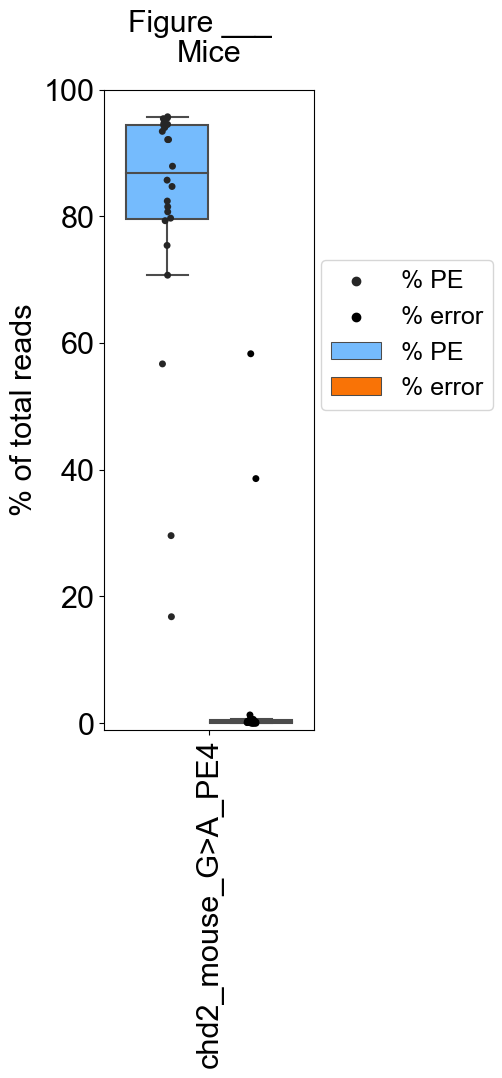

In [77]:
# Figure 2a 

df = pd.read_excel('../PEmbryo_Figure_Data.xlsx',sheet_name="align_2")

print('# entries',len(df))

color1 = sns.xkcd_rgb['sky blue']
color2 = sns.xkcd_rgb['orange'] #coral

#________________________________________

    
IDs = df["Identifier"].tolist()

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18
fig, axes = plt.subplots(1, 1, figsize=(3, 8))
fig.suptitle('Figure ___',y=1,x=0.52)

left  = 0.2  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.8   # the amount of height reserved for white space between subplots
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


data_1 = df.loc[(df["target"]=='chd2')&(df["stage"]=='mouse')&(df["edit"]=='G>A')&(df["method"]=="PE4")]

df = pd.concat([data_1],sort=False)
print('# selected',len(df))
data = df.loc[df['# valid_reads']>1000]

IDs = data['Identifier'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error_adjusted'].tolist()

files = data['filename'].tolist()
print('filenames',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PE[i]])
    data.append([x,'% error',Error[i]])

print(len(IDs))
print(len(data)) 

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

groups = set(data_df["Identifier"].tolist())
for g in groups:
    print(g,(data_df.Identifier==g).sum()/2)
    
y = "val"

print(data_df)

sns.stripplot(ax=axes,x="Identifier", y=y, hue='outcome',dodge=True,data=data_df,s=5, jitter=0.05,color="black")
sns.boxplot(ax=axes,x="Identifier", y=y, hue='outcome',data=data_df,showfliers=False,palette=[color1,color2],whis=1.5,saturation=20)

axes.set_title("Mice")

for tick in axes.get_xticklabels():
    tick.set_rotation(90)

for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] +
             axes.get_xticklabels() + axes.get_yticklabels()):
    item.set_fontsize(22)
    

axes.tick_params(axis='x', rotation=90)
axes.set_ylim([-1,100])
axes.set_xlabel("")
axes.set_ylabel('% of total reads')

plt.legend(loc=(1.03,0.5))
plt.show()

# entries 2542
# selected 34
filenames 34
set(filenames) 34
34
68
hoxd13_1_mouse_G>T_PE4 34.0
                Identifier  outcome   val
0   hoxd13_1_mouse_G>T_PE4     % PE  48.0
1   hoxd13_1_mouse_G>T_PE4  % error   0.3
2   hoxd13_1_mouse_G>T_PE4     % PE  86.9
3   hoxd13_1_mouse_G>T_PE4  % error   0.5
4   hoxd13_1_mouse_G>T_PE4     % PE  65.1
..                     ...      ...   ...
63  hoxd13_1_mouse_G>T_PE4  % error   0.5
64  hoxd13_1_mouse_G>T_PE4     % PE  60.8
65  hoxd13_1_mouse_G>T_PE4  % error   0.6
66  hoxd13_1_mouse_G>T_PE4     % PE  96.3
67  hoxd13_1_mouse_G>T_PE4  % error   0.1

[68 rows x 3 columns]


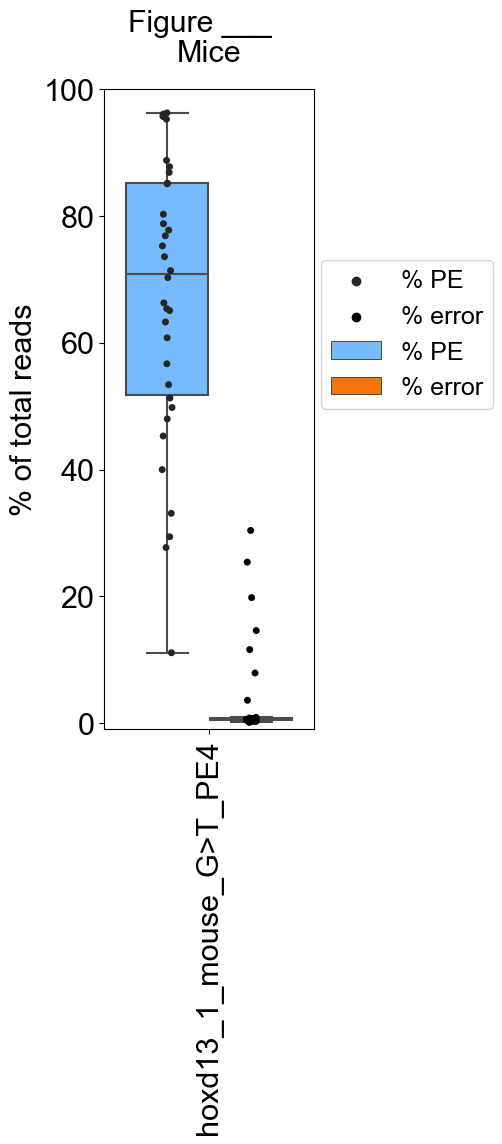

In [78]:
# Figure 3a

df = pd.read_excel('../PEmbryo_Figure_Data.xlsx',sheet_name="align_2")

print('# entries',len(df))

color1 = sns.xkcd_rgb['sky blue']
color2 = sns.xkcd_rgb['orange'] #coral
    
IDs = df["Identifier"].tolist()

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18
fig, axes = plt.subplots(1, 1, figsize=(3, 8))
fig.suptitle('Figure ___',y=1,x=0.52)

left  = 0.2  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.8   # the amount of height reserved for white space between subplots
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

data_1 = df.loc[(df["target"]=='hoxd13_1')&(df["stage"]=='mouse')&(df["edit"]=='G>T')&(df["method"]=="PE4")]

df = pd.concat([data_1],sort=False)
print('# selected',len(df))
data = df.loc[df['# valid_reads']>1000]

IDs = data['Identifier'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error_adjusted'].tolist()

files = data['filename'].tolist()
print('filenames',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PE[i]])
    data.append([x,'% error',Error[i]])

print(len(IDs))
print(len(data)) 

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

groups = set(data_df["Identifier"].tolist())
for g in groups:
    print(g,(data_df.Identifier==g).sum()/2)
    
y = "val"

print(data_df)

sns.stripplot(ax=axes,x="Identifier", y=y, hue='outcome',dodge=True,data=data_df,s=5, jitter=0.05,color="black")
sns.boxplot(ax=axes,x="Identifier", y=y, hue='outcome',data=data_df,showfliers=False,palette=[color1,color2],whis=1.5,saturation=20)

axes.set_title("Mice")

for tick in axes.get_xticklabels():
    tick.set_rotation(90)

for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] +
             axes.get_xticklabels() + axes.get_yticklabels()):
    item.set_fontsize(22)
    

axes.tick_params(axis='x', rotation=90)
axes.set_ylim([-1,100])
axes.set_xlabel("")
axes.set_ylabel('% of total reads')

plt.legend(loc=(1.03,0.5))
plt.show()

# entries 2542
# selected 34
filenames 34
set(filenames) 34
hoxd13_1_mouse_G>T_PE4 34.0
                Identifier  outcome   val classification
0   hoxd13_1_mouse_G>T_PE4     % PE  48.0            nan
1   hoxd13_1_mouse_G>T_PE4  % error   0.3            nan
2   hoxd13_1_mouse_G>T_PE4     % PE  86.9         Severe
3   hoxd13_1_mouse_G>T_PE4  % error   0.5         Severe
4   hoxd13_1_mouse_G>T_PE4     % PE  65.1       Moderate
..                     ...      ...   ...            ...
63  hoxd13_1_mouse_G>T_PE4  % error   0.5            nan
64  hoxd13_1_mouse_G>T_PE4     % PE  60.8            nan
65  hoxd13_1_mouse_G>T_PE4  % error   0.6            nan
66  hoxd13_1_mouse_G>T_PE4     % PE  96.3         Severe
67  hoxd13_1_mouse_G>T_PE4  % error   0.1         Severe

[68 rows x 4 columns]


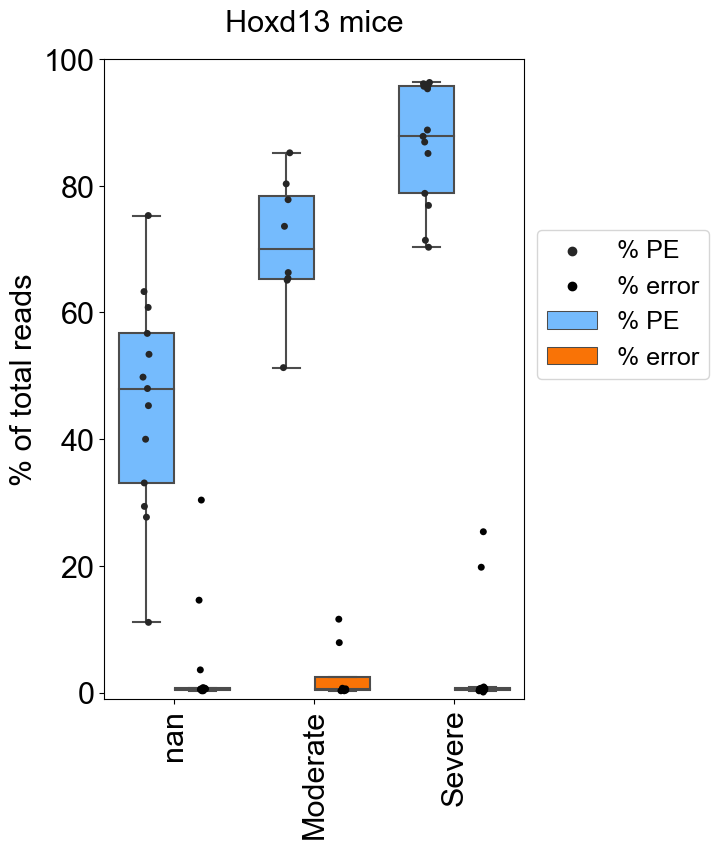

In [79]:
# Figure 3a (binned by phenotype)

df = pd.read_excel('../PEmbryo_Figure_Data.xlsx',sheet_name="align_2")

print('# entries',len(df))

color1 = sns.xkcd_rgb['sky blue']
color2 = sns.xkcd_rgb['orange'] #coral

IDs = df["Identifier"].tolist()

fig, axes = plt.subplots(1, 1, figsize=(6, 8))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18
#fig.suptitle('Figure ___',y=1,x=0.52)

left  = 0.2  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.8   # the amount of height reserved for white space between subplots
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

data_1 = df.loc[(df["target"]=='hoxd13_1')&(df["stage"]=='mouse')&(df["edit"]=='G>T')&(df["method"]=="PE4")]

df = pd.concat([data_1],sort=False)
print('# selected',len(df))
data = df.loc[df['# valid_reads']>1000]

IDs = data['Identifier'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error_adjusted'].tolist()
classification = [str(x) for x in data['sample'].tolist()]

files = data['filename'].tolist()
print('filenames',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PE[i],classification[i]])
    data.append([x,'% error',Error[i],classification[i]])

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val','classification'])

groups = set(data_df["Identifier"].tolist())
for g in groups:
    print(g,(data_df.Identifier==g).sum()/2)
    
y = "val"

print(data_df)

order = ['nan','Moderate','Severe']

sns.stripplot(ax=axes,x="classification", hue='outcome',y=y, data=data_df, s=5, dodge=True,jitter=0.05,color="black",order=order)
sns.boxplot(ax=axes,x="classification", hue='outcome',y=y, data=data_df, whis=1.5,showfliers=False,palette=[color1,color2],order=order,saturation=20)

axes.set_title("Hoxd13 mice")

for tick in axes.get_xticklabels():
    tick.set_rotation(90)

for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] +
             axes.get_xticklabels() + axes.get_yticklabels()):
    item.set_fontsize(22)
    
axes.tick_params(axis='x', rotation=90)
axes.set_ylim([-1,100])
axes.set_xlabel("")
axes.set_ylabel('% of total reads')

plt.legend(loc=(1.03,0.5))
plt.show()

2542
2335
filenames 108
set(filenames) 108
rnf2_2 cell_C>G_PE4 (optimization)_PE2 (Liu Lab)_normal pegRNA 30.0
rnf2_2 cell_C>G_PE4 (optimization)_PEMax (Liu Lab)_epegRNA 27.0
rnf2_2 cell_C>G_PE4 (optimization)_PE2 (Liu Lab)_epegRNA 27.0
rnf2_2 cell_C>G_PE4 (optimization)_PEMax (Liu Lab)_normal pegRNA 24.0
filenames 72
set(filenames) 72
dnmt1_2 cell_G>C_PE4 (optimization)_PE2 (Liu Lab)_normal pegRNA 19.0
dnmt1_2 cell_G>C_PE4 (optimization)_PEMax (Liu Lab)_epegRNA 18.0
dnmt1_2 cell_G>C_PE4 (optimization)_PE2 (Liu Lab)_epegRNA 17.0
dnmt1_2 cell_G>C_PE4 (optimization)_PEMax (Liu Lab)_normal pegRNA 18.0
filenames 93
set(filenames) 93
dnmt1_2 cell_G>T_PE4 (optimization)_PE2 (Liu Lab)_normal pegRNA 17.0
dnmt1_2 cell_G>T_PE4 (optimization)_PEMax (Liu Lab)_normal pegRNA 26.0
dnmt1_2 cell_G>T_PE4 (optimization)_PE2 (Liu Lab)_epegRNA 26.0
dnmt1_2 cell_G>T_PE4 (optimization)_PEMax (Liu Lab)_epegRNA 24.0
filenames 97
set(filenames) 97
chd2_2 cell_G>A_PE4 (optimization)_PE2 (Liu Lab)_epegRNA 23.0
ch

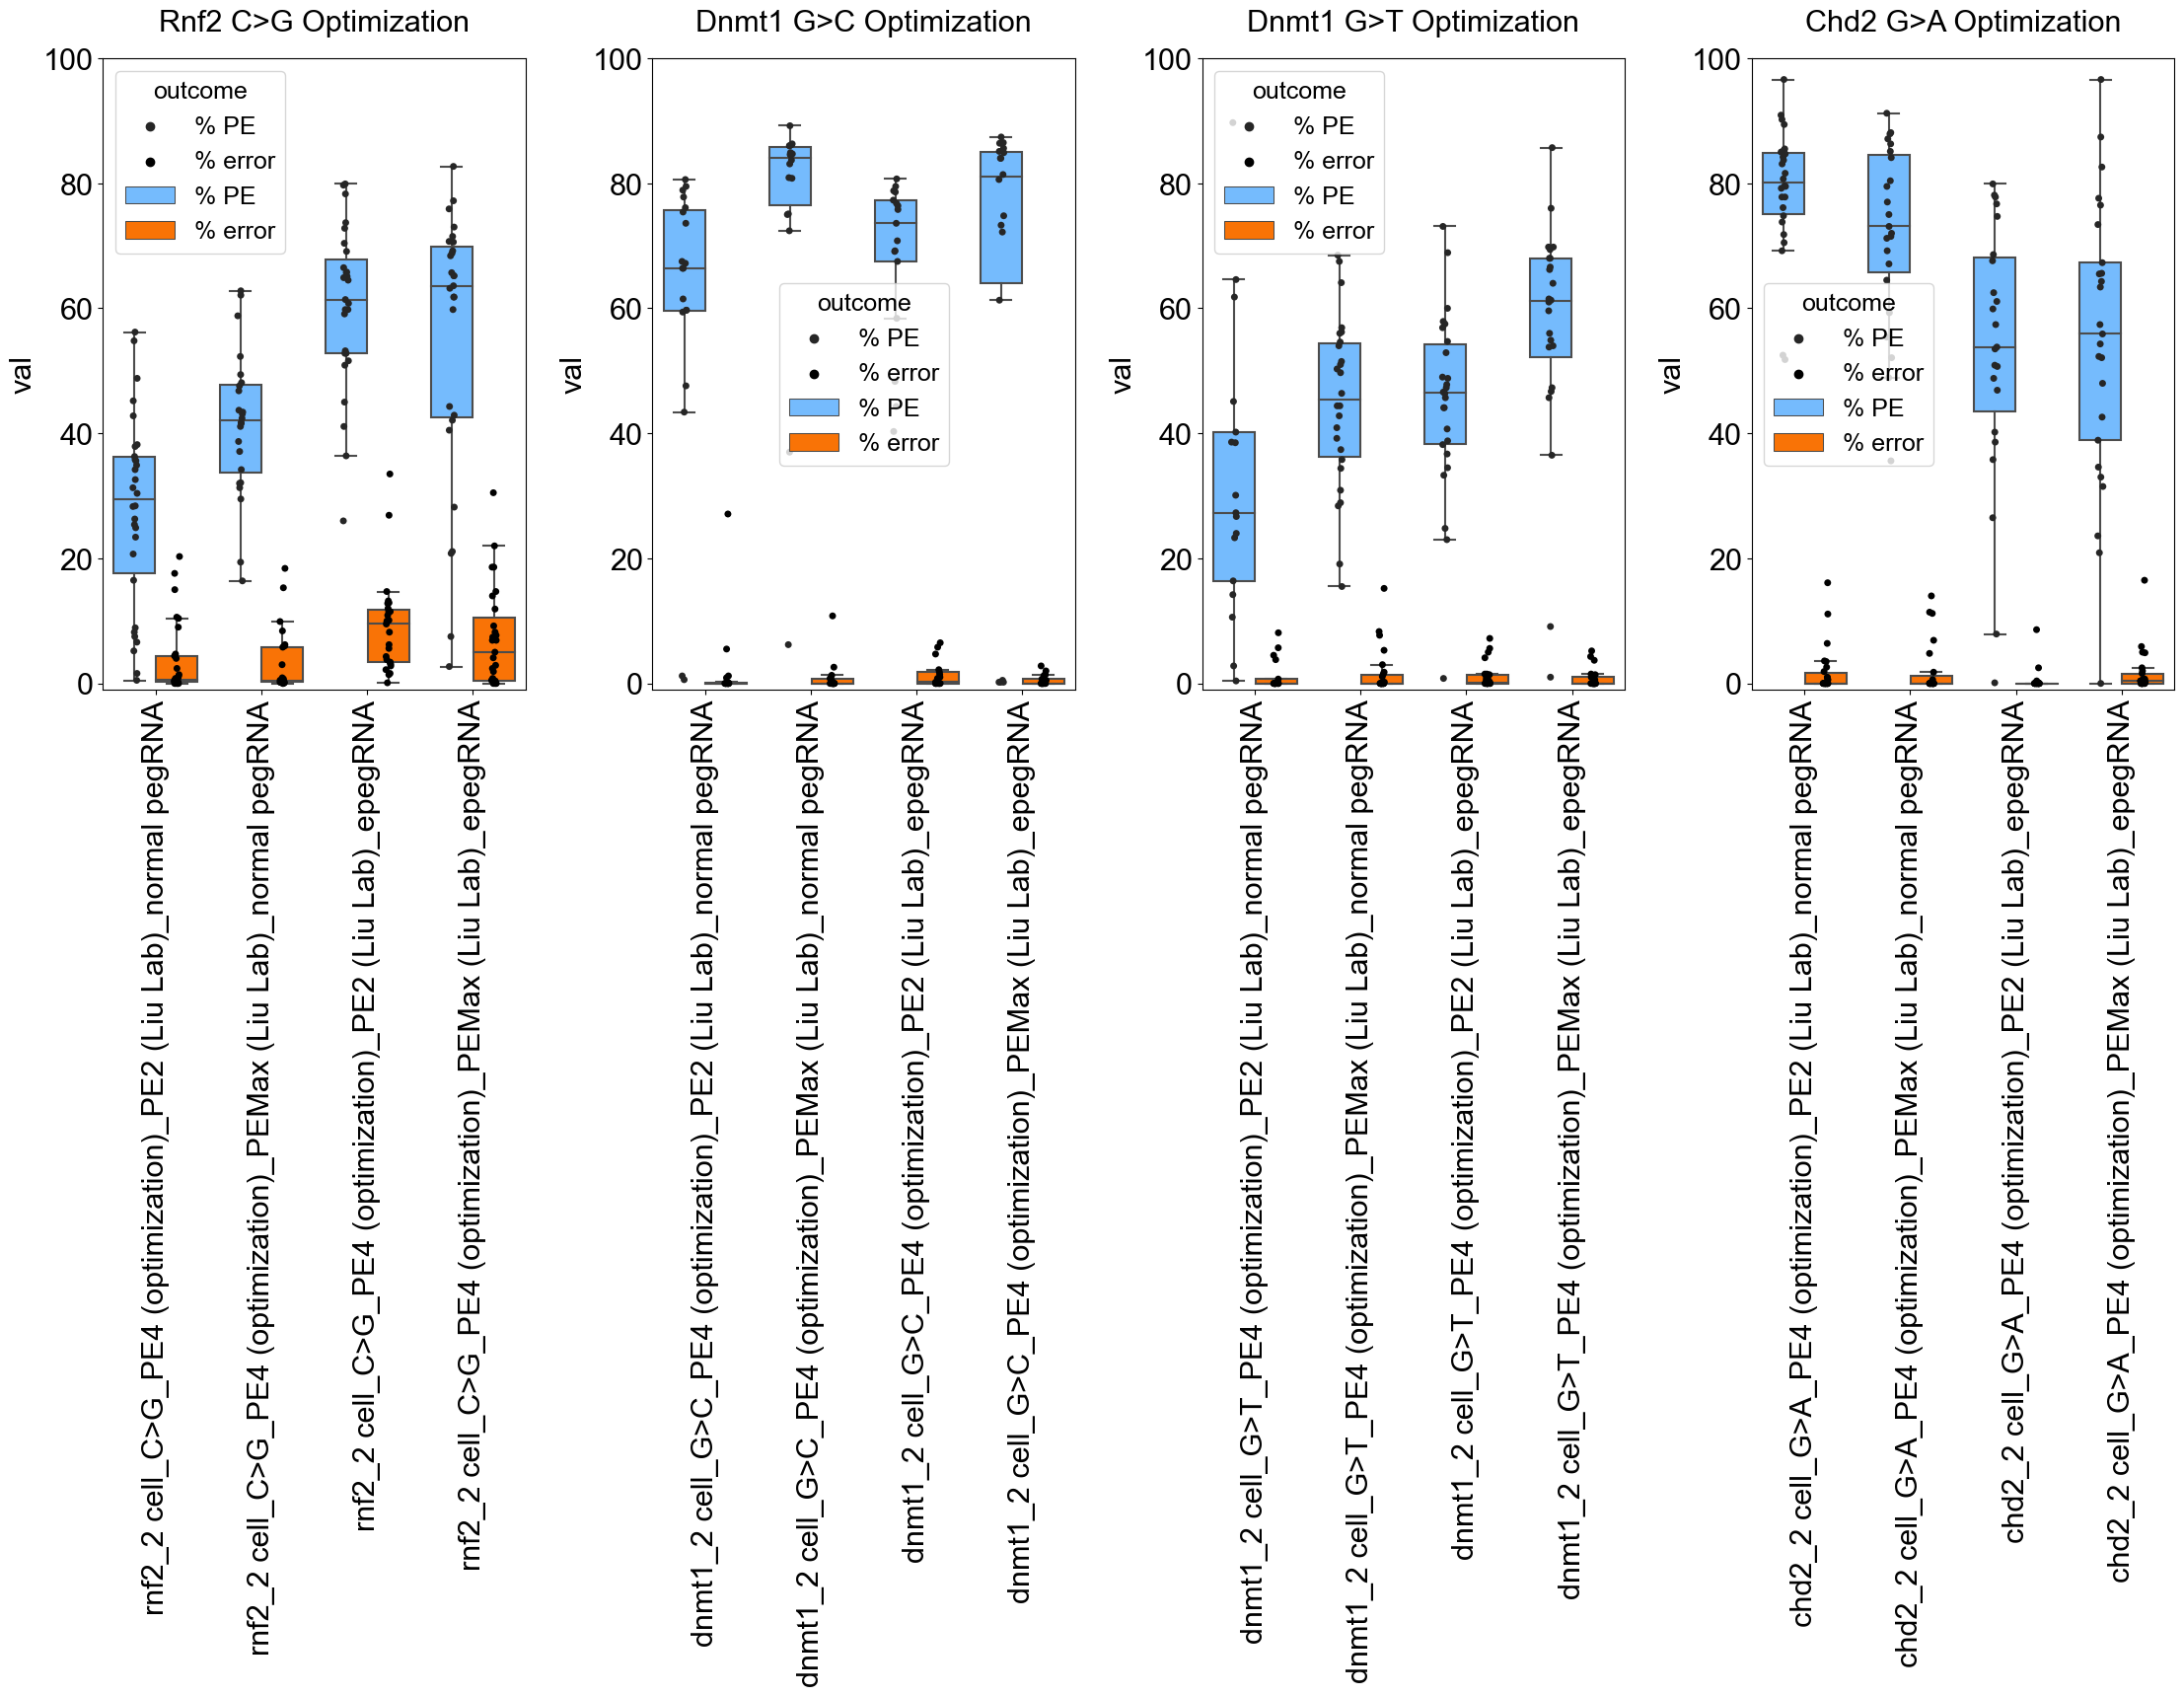

In [80]:
# Supplementary Figure 8

df = pd.read_excel('../PEmbryo_Figure_Data.xlsx',sheet_name="align_2")
print(len(df))
df = df.loc[df['# valid_reads']>1000]
print(len(df))

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18

fig, axes = plt.subplots(1, 4, figsize=(30, 8),facecolor='white')

left  = 0.2  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.8   # the amount of height reserved for white space between subplots
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

jitter=0.05

y = "val"

color1 = sns.xkcd_rgb['sky blue']
color2 = sns.xkcd_rgb['orange'] #coral

#______RNF2_________    

data_1 = df.loc[(df["target"]=='rnf2')&(df["stage"]=='2 cell')&(df["edit"]=='C>G')&(df["method"]=="PE4 (optimization)")&(df["editor"]=="PE2 (Liu Lab)")&(df["pegRNA"]=="normal pegRNA")]
data_2 = df.loc[(df["target"]=='rnf2')&(df["stage"]=='2 cell')&(df["edit"]=='C>G')&(df["method"]=="PE4 (optimization)")&(df["editor"]=="PEMax (Liu Lab)")&(df["pegRNA"]=="normal pegRNA")]
data_3 = df.loc[(df["target"]=='rnf2')&(df["stage"]=='2 cell')&(df["edit"]=='C>G')&(df["method"]=="PE4 (optimization)")&(df["editor"]=="PE2 (Liu Lab)")&(df["pegRNA"]=="epegRNA")]
data_4 = df.loc[(df["target"]=='rnf2')&(df["stage"]=='2 cell')&(df["edit"]=='C>G')&(df["method"]=="PE4 (optimization)")&(df["editor"]=="PEMax (Liu Lab)")&(df["pegRNA"]=="epegRNA")]

data = pd.concat([data_1,data_2,data_3,data_4],sort=False)
data = data.loc[data['# valid_reads']>1000]

collect_1=data

files = data['filename'].tolist()
print('filenames',len(files))
print('set(filenames)',len(set(files)))

IDs,PEs,Errors=([],[],[])
for x in data.iterrows():
    ID = x[1]['target']+"_"+x[1]['stage']+"_"+x[1]['edit']+"_"+x[1]['method']+"_"+x[1]['editor']+"_"+x[1]['pegRNA']
    PE = x[1]['percent_precise']
    Error = x[1]['percent_error_adjusted']
    
    IDs.append(ID)
    PEs.append(PE)
    Errors.append(Error)
    
data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PEs[i]])
    data.append([x,'% error',Errors[i]])

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

for i,x in enumerate(set(IDs)):
    #if i==0:
        #print(rnf2_data_select["ID"].tolist()[0])
    print(x,(data_df.Identifier == x).sum()/2)    
    
sns.stripplot(ax=axes[0],x="Identifier", y=y, data=data_df, s=s, jitter=jitter,color="black",hue='outcome',dodge=True)
sns.boxplot(ax=axes[0],x="Identifier", y=y, data=data_df, showfliers = False,hue='outcome',dodge=True,palette=[color1,color2],saturation=20,whis=1.5)
axes[0].set_title("Rnf2 C>G Optimization")

for item in ([axes[0].title, axes[0].xaxis.label, axes[0].yaxis.label] +
             axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    item.set_fontsize(22)

#______DNMT1_________    

data_1 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='G>C')&(df["method"]=="PE4 (optimization)")&(df["editor"]=="PE2 (Liu Lab)")&(df["pegRNA"]=="normal pegRNA")]
data_2 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='G>C')&(df["method"]=="PE4 (optimization)")&(df["editor"]=="PEMax (Liu Lab)")&(df["pegRNA"]=="normal pegRNA")]
data_3 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='G>C')&(df["method"]=="PE4 (optimization)")&(df["editor"]=="PE2 (Liu Lab)")&(df["pegRNA"]=="epegRNA")]
data_4 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='G>C')&(df["method"]=="PE4 (optimization)")&(df["editor"]=="PEMax (Liu Lab)")&(df["pegRNA"]=="epegRNA")]

data = pd.concat([data_1,data_2,data_3,data_4],sort=False)
data = data.loc[data['# valid_reads']>1000]

collect_2=data

files = data['filename'].tolist()
print('filenames',len(files))
print('set(filenames)',len(set(files)))

IDs,PEs,Errors=([],[],[])
for x in data.iterrows():
    ID = x[1]['target']+"_"+x[1]['stage']+"_"+x[1]['edit']+"_"+x[1]['method']+"_"+x[1]['editor']+"_"+x[1]['pegRNA']
    PE = x[1]['percent_precise']
    Error = x[1]['percent_error_adjusted']
    
    IDs.append(ID)
    PEs.append(PE)
    Errors.append(Error)
    
data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PEs[i]])
    data.append([x,'% error',Errors[i]])

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

for i,x in enumerate(set(IDs)):
    #if i==0:
        #print(rnf2_data_select["ID"].tolist()[0])
    print(x,(data_df.Identifier == x).sum()/2)    
    
sns.stripplot(ax=axes[1],x="Identifier", y=y, data=data_df, s=s, jitter=jitter,color="black",hue='outcome',dodge=True)
sns.boxplot(ax=axes[1],x="Identifier", y=y, data=data_df, showfliers = False,hue='outcome',dodge=True,palette=[color1,color2],saturation=20,whis=1.5)
axes[1].set_title("Dnmt1 G>C Optimization")

for item in ([axes[1].title, axes[1].xaxis.label, axes[1].yaxis.label] +
             axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    item.set_fontsize(22)
    
    
#______DNMT1_________    
    
data_1 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='G>T')&(df["method"]=="PE4 (optimization)")&(df["editor"]=="PE2 (Liu Lab)")&(df["pegRNA"]=="normal pegRNA")]
data_2 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='G>T')&(df["method"]=="PE4 (optimization)")&(df["editor"]=="PEMax (Liu Lab)")&(df["pegRNA"]=="normal pegRNA")]
data_3 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='G>T')&(df["method"]=="PE4 (optimization)")&(df["editor"]=="PE2 (Liu Lab)")&(df["pegRNA"]=="epegRNA")]
data_4 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='G>T')&(df["method"]=="PE4 (optimization)")&(df["editor"]=="PEMax (Liu Lab)")&(df["pegRNA"]=="epegRNA")]

data = pd.concat([data_1,data_2,data_3,data_4],sort=False)
data = data.loc[data['# valid_reads']>1000]

collect_3=data

files = data['filename'].tolist()
print('filenames',len(files))
print('set(filenames)',len(set(files)))

IDs,PEs,Errors=([],[],[])
for x in data.iterrows():
    ID = x[1]['target']+"_"+x[1]['stage']+"_"+x[1]['edit']+"_"+x[1]['method']+"_"+x[1]['editor']+"_"+x[1]['pegRNA']
    PE = x[1]['percent_precise']
    Error = x[1]['percent_error_adjusted']
    
    IDs.append(ID)
    PEs.append(PE)
    Errors.append(Error)
    
data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PEs[i]])
    data.append([x,'% error',Errors[i]])

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

for i,x in enumerate(set(IDs)):
    #if i==0:
        #print(rnf2_data_select["ID"].tolist()[0])
    print(x,(data_df.Identifier == x).sum()/2)    
    
sns.stripplot(ax=axes[2],x="Identifier", y=y, data=data_df, s=s, jitter=jitter,color="black",hue='outcome',dodge=True)
sns.boxplot(ax=axes[2],x="Identifier", y=y, data=data_df, showfliers = False,hue='outcome',dodge=True,palette=[color1,color2],saturation=20,whis=1.5)
axes[2].set_title("Dnmt1 G>T Optimization")

for item in ([axes[2].title, axes[2].xaxis.label, axes[2].yaxis.label] +
             axes[2].get_xticklabels() + axes[2].get_yticklabels()):
    item.set_fontsize(22)
    
#______CHD2_________    

data_1 = df.loc[(df["target"]=='chd2')&(df["stage"]=='2 cell')&(df["edit"]=='G>A')&(df["method"]=="PE4 (optimization)")&(df["editor"]=="PE2 (Liu Lab)")&(df["pegRNA"]=="normal pegRNA")]
data_2 = df.loc[(df["target"]=='chd2')&(df["stage"]=='2 cell')&(df["edit"]=='G>A')&(df["method"]=="PE4 (optimization)")&(df["editor"]=="PEMax (Liu Lab)")&(df["pegRNA"]=="normal pegRNA")]
data_3 = df.loc[(df["target"]=='chd2')&(df["stage"]=='2 cell')&(df["edit"]=='G>A')&(df["method"]=="PE4 (optimization)")&(df["editor"]=="PE2 (Liu Lab)")&(df["pegRNA"]=="epegRNA")]
data_4 = df.loc[(df["target"]=='chd2')&(df["stage"]=='2 cell')&(df["edit"]=='G>A')&(df["method"]=="PE4 (optimization)")&(df["editor"]=="PEMax (Liu Lab)")&(df["pegRNA"]=="epegRNA")]

data = pd.concat([data_1,data_2,data_3,data_4],sort=False)
data = data.loc[data['# valid_reads']>1000]

collect_4=data

files = data['filename'].tolist()
print('filenames',len(files))
print('set(filenames)',len(set(files)))

IDs,PEs,Errors=([],[],[])
for x in data.iterrows():
    ID = x[1]['target']+"_"+x[1]['stage']+"_"+x[1]['edit']+"_"+x[1]['method']+"_"+x[1]['editor']+"_"+x[1]['pegRNA']
    PE = x[1]['percent_precise']
    Error = x[1]['percent_error_adjusted']
    
    IDs.append(ID)
    PEs.append(PE)
    Errors.append(Error)
    
data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PEs[i]])
    data.append([x,'% error',Errors[i]])

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

for i,x in enumerate(set(IDs)):
    #if i==0:
        #print(rnf2_data_select["ID"].tolist()[0])
    print(x,(data_df.Identifier == x).sum()/2)    
    
sns.stripplot(ax=axes[3],x="Identifier", y=y, data=data_df, s=s, jitter=jitter,color="black",hue='outcome',dodge=True)
sns.boxplot(ax=axes[3],x="Identifier", y=y, data=data_df, showfliers = False,hue='outcome',dodge=True,palette=[color1,color2],saturation=20,whis=1.5)
axes[3].set_title("Chd2 G>A Optimization")

for item in ([axes[3].title, axes[3].xaxis.label, axes[3].yaxis.label] +
             axes[3].get_xticklabels() + axes[3].get_yticklabels()):
    item.set_fontsize(22)


axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)
axes[2].tick_params(axis='x', rotation=90)
axes[3].tick_params(axis='x', rotation=90)
axes[0].set_ylim([-1,100])
axes[1].set_ylim([-1,100])
axes[2].set_ylim([-1,100])
axes[3].set_ylim([-1,100])
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")
axes[3].set_xlabel("")

plt.show()

# entries 2542
# selected entries: 162
filenames 154
set(filenames) 154
154
308
dnmt1_2 cell_G>T_PE4 43.0
dnmt1_2 cell_GGCAT>TAGTG_PE4 25.0
dnmt1_2 cell_GGC>TAG_PE4 20.0
dnmt1_2 cell_GGC>TAG_PE2 21.0
dnmt1_2 cell_G>T_PE2 23.0
dnmt1_2 cell_GGCAT>TAGTG_PE2 22.0
                       Identifier  outcome  val
0            dnmt1_2 cell_G>T_PE2     % PE  0.4
1            dnmt1_2 cell_G>T_PE2  % error  0.4
2            dnmt1_2 cell_G>T_PE2     % PE  0.0
3            dnmt1_2 cell_G>T_PE2  % error  0.0
4            dnmt1_2 cell_G>T_PE2     % PE  1.4
..                            ...      ...  ...
303  dnmt1_2 cell_GGCAT>TAGTG_PE4  % error  0.0
304  dnmt1_2 cell_GGCAT>TAGTG_PE4     % PE  7.7
305  dnmt1_2 cell_GGCAT>TAGTG_PE4  % error  2.3
306  dnmt1_2 cell_GGCAT>TAGTG_PE4     % PE  0.3
307  dnmt1_2 cell_GGCAT>TAGTG_PE4  % error  0.4

[308 rows x 3 columns]


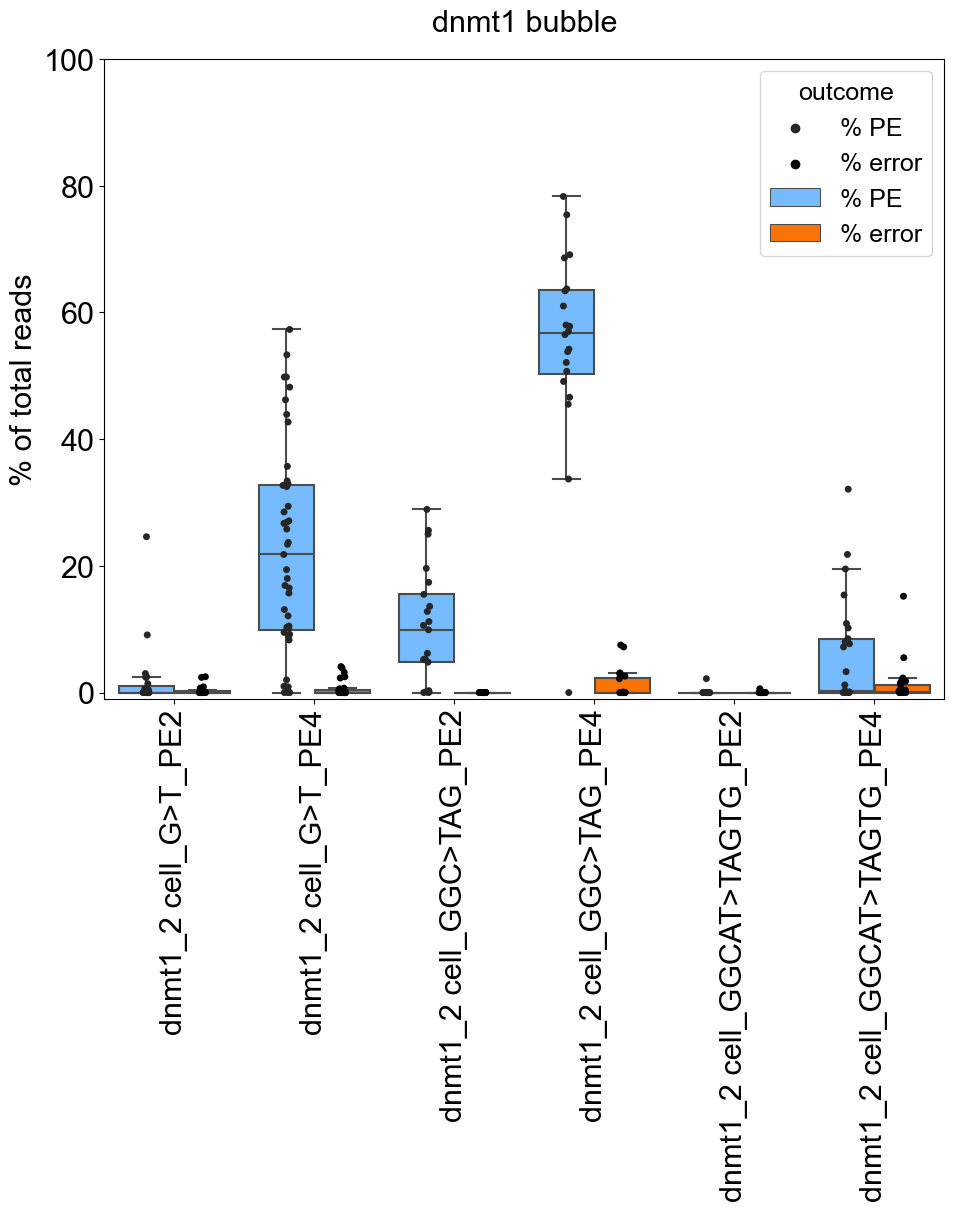

In [81]:
# Supplementary Figure 9

df = pd.read_excel('../PEmbryo_Figure_Data.xlsx',sheet_name="align_2")

print('# entries',len(df))

color1 = sns.xkcd_rgb['sky blue']
color2 = sns.xkcd_rgb['orange'] #coral

jitter=0.05

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18
fig, axes = plt.subplots(1, 1, figsize=(12, 8),facecolor='white')

left  = 0.2  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.8   # the amount of height reserved for white space between subplots
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

data_1 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='G>T')&(df["method"]=="PE2")]
data_2 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='G>T')&(df["method"]=="PE4")]
data_3 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='GGC>TAG')&(df["method"]=="PE2")]
data_4 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='GGC>TAG')&(df["method"]=="PE4")]
data_5 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='GGCAT>TAGTG')&(df["method"]=="PE2")]
data_6 = df.loc[(df["target"]=='dnmt1')&(df["stage"]=='2 cell')&(df["edit"]=='GGCAT>TAGTG')&(df["method"]=="PE4")]

df = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6],sort=False)
print('# selected entries:',len(df))
data = df.loc[df['# valid_reads']>1000]

IDs = data['Identifier'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error_adjusted'].tolist()

files = data['filename'].tolist()
print('filenames',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PE[i]])
    data.append([x,'% error',Error[i]])

print(len(IDs))
print(len(data)) 

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

groups = set(data_df["Identifier"].tolist())
for g in groups:
    print(g,(data_df.Identifier==g).sum()/2)
    
y = "val"

print(data_df)

sns.stripplot(ax=axes,x="Identifier", y=y, hue='outcome',dodge=True,data=data_df,s=5, jitter=0.05,color="black")
sns.boxplot(ax=axes,x="Identifier", y=y, hue='outcome',data=data_df,showfliers=False,palette=[color1,color2],whis=1.5,saturation=20)

axes.set_title("dnmt1 bubble")

for tick in axes.get_xticklabels():
    tick.set_rotation(90)

for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] +
             axes.get_xticklabels() + axes.get_yticklabels()):
    item.set_fontsize(22)
    

axes.tick_params(axis='x', rotation=90)
axes.set_ylim([-1,100])
axes.set_xlabel("")
axes.set_ylabel('% of total reads')

plt.show()

# entries 2542
# selected entries: 116
filenames 94
set(filenames) 94
94
188
hoxd13_2_2 cell_+3nt_PE4* 13.0
hoxd13_2_2 cell_+8nt_PE4* 37.0
hoxd13_2_2 cell_+1nt_PE4* 28.0
hoxd13_2_2 cell_+17nt_PE4* 16.0
                     Identifier  outcome   val
0     hoxd13_2_2 cell_+1nt_PE4*     % PE  56.9
1     hoxd13_2_2 cell_+1nt_PE4*  % error   2.8
2     hoxd13_2_2 cell_+1nt_PE4*     % PE  32.4
3     hoxd13_2_2 cell_+1nt_PE4*  % error  13.1
4     hoxd13_2_2 cell_+1nt_PE4*     % PE  54.5
..                          ...      ...   ...
183  hoxd13_2_2 cell_+17nt_PE4*  % error  55.2
184  hoxd13_2_2 cell_+17nt_PE4*     % PE   0.0
185  hoxd13_2_2 cell_+17nt_PE4*  % error   0.0
186  hoxd13_2_2 cell_+17nt_PE4*     % PE   0.0
187  hoxd13_2_2 cell_+17nt_PE4*  % error   0.0

[188 rows x 3 columns]


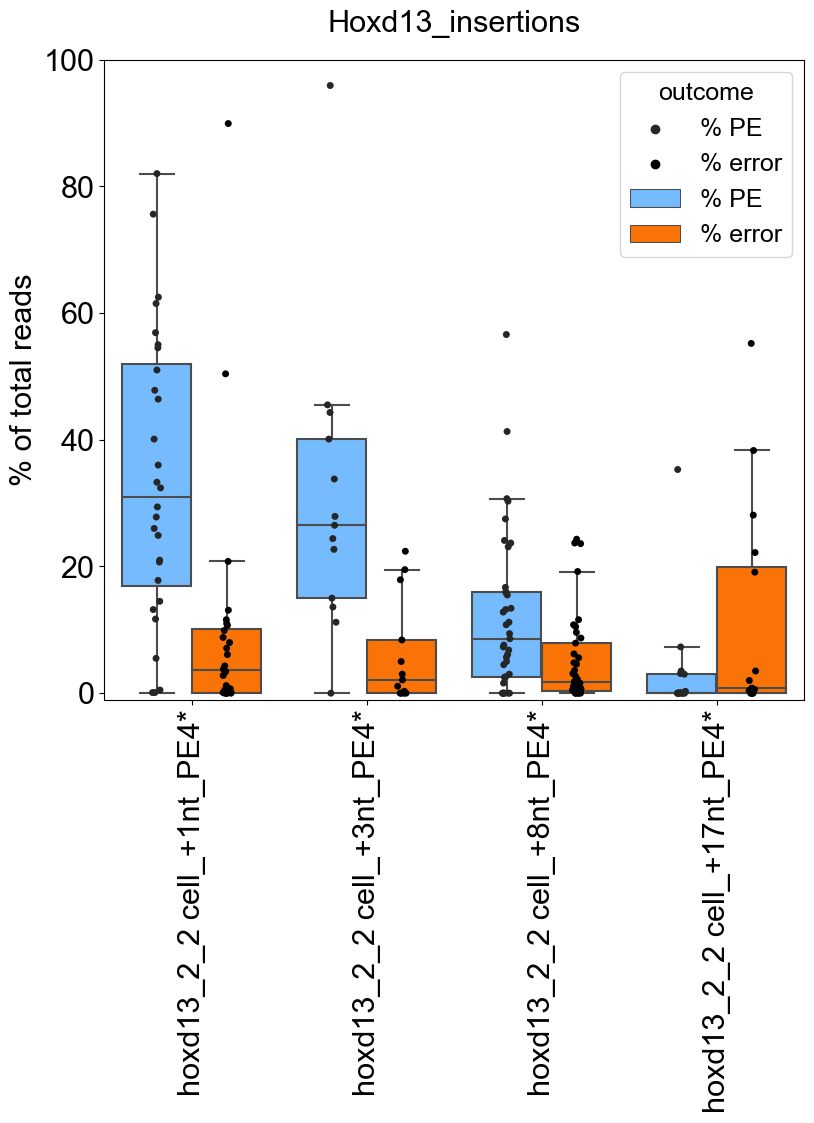

In [82]:
# Supplementary Figure 10b

df = pd.read_excel('../PEmbryo_Figure_Data.xlsx',sheet_name="align_2")

print('# entries',len(df))

color1 = sns.xkcd_rgb['sky blue']
color2 = sns.xkcd_rgb['orange'] #coral

jitter=0.05

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18
fig, axes = plt.subplots(1, 1, figsize=(10, 8))

left  = 0.2  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.8   # the amount of height reserved for white space between subplots
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

#______RNF2_C>G________    

data_1 = df.loc[(df["target"]=='hoxd13_2')&(df["stage"]=='2 cell')&(df["edit"]=='+1nt')&(df["method"]=="PE4*")]
data_2 = df.loc[(df["target"]=='hoxd13_2')&(df["stage"]=='2 cell')&(df["edit"]=='+3nt')&(df["method"]=="PE4*")]
data_3 = df.loc[(df["target"]=='hoxd13_2')&(df["stage"]=='2 cell')&(df["edit"]=='+8nt')&(df["method"]=="PE4*")]
data_4 = df.loc[(df["target"]=='hoxd13_2')&(df["stage"]=='2 cell')&(df["edit"]=='+17nt')&(df["method"]=="PE4*")]

df = pd.concat([data_1,data_2,data_3,data_4],sort=False)
print('# selected entries:',len(df))
data = df.loc[df['# valid_reads']>1000]

IDs = data['Identifier'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error_adjusted'].tolist()

files = data['filename'].tolist()
print('filenames',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PE[i]])
    data.append([x,'% error',Error[i]])

print(len(IDs))
print(len(data)) 

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

groups = set(data_df["Identifier"].tolist())
for g in groups:
    print(g,(data_df.Identifier==g).sum()/2)
    
y = "val"

print(data_df)

sns.stripplot(ax=axes,x="Identifier", y=y, hue='outcome',dodge=True,data=data_df,s=5, jitter=0.05,color="black")
sns.boxplot(ax=axes,x="Identifier", y=y, hue='outcome',data=data_df,showfliers=False,palette=[color1,color2],whis=1.5,saturation=20)

axes.set_title("Hoxd13_insertions")

for tick in axes.get_xticklabels():
    tick.set_rotation(90)

for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] +
             axes.get_xticklabels() + axes.get_yticklabels()):
    item.set_fontsize(22)
    

axes.tick_params(axis='x', rotation=90)
axes.set_ylim([-1,100])
axes.set_xlabel("")
axes.set_ylabel('% of total reads')

plt.show()

# entries 2542
# selected entries: 40
filenames 40
set(filenames) 40
40
80
rnf2_2 cell_C>G_PE4 28.0
rnf2_2 cell_C>G_PE4 (comparison) 12.0
                          Identifier  outcome   val
0                rnf2_2 cell_C>G_PE4     % PE  43.2
1                rnf2_2 cell_C>G_PE4  % error  22.1
2                rnf2_2 cell_C>G_PE4     % PE  50.7
3                rnf2_2 cell_C>G_PE4  % error   0.1
4                rnf2_2 cell_C>G_PE4     % PE  16.4
..                               ...      ...   ...
75  rnf2_2 cell_C>G_PE4 (comparison)  % error   0.0
76  rnf2_2 cell_C>G_PE4 (comparison)     % PE  22.8
77  rnf2_2 cell_C>G_PE4 (comparison)  % error   0.0
78  rnf2_2 cell_C>G_PE4 (comparison)     % PE   9.3
79  rnf2_2 cell_C>G_PE4 (comparison)  % error   0.7

[80 rows x 3 columns]


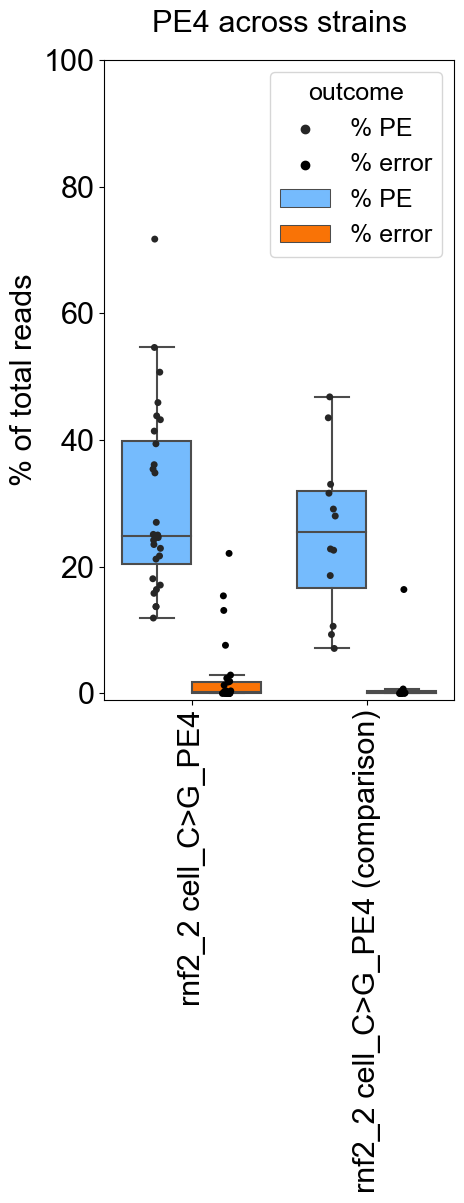

In [83]:
# Supplementary Table 13 

df = pd.read_excel('../PEmbryo_Figure_Data.xlsx',sheet_name="align_2")

print('# entries',len(df))

color1 = sns.xkcd_rgb['sky blue']
color2 = sns.xkcd_rgb['orange'] #coral

jitter=0.05

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18
fig, axes = plt.subplots(1, 1, figsize=(5, 8),facecolor='white')

left  = 0.2  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.8   # the amount of height reserved for white space between subplots
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


data_1 = df.loc[(df["target"]=='rnf2')&(df["stage"]=='2 cell')&(df["edit"]=='C>G')&(df["method"]=="PE4")]
data_2 = df.loc[(df["target"]=='rnf2')&(df["stage"]=='2 cell')&(df["edit"]=='C>G')&(df["method"]=="PE4 (comparison)")&(df["group"]=="DL")]

df = pd.concat([data_1,data_2],sort=False)
print('# selected entries:',len(df))
data = df.loc[df['# valid_reads']>1000]

data.to_excel("final_tables/Supplementary_Figure_11_data.xlsx")

IDs = data['Identifier'].tolist()
PE = data['percent_precise'].tolist()
Error = data['percent_error_adjusted'].tolist()

files = data['filename'].tolist()
print('filenames',len(files))
print('set(filenames)',len(set(files)))

data=[]
for i,x in enumerate(IDs):
    data.append([x,'% PE',PE[i]])
    data.append([x,'% error',Error[i]])

print(len(IDs))
print(len(data)) 

data_df = pd.DataFrame(data,columns=['Identifier','outcome','val'])

groups = set(data_df["Identifier"].tolist())
for g in groups:
    print(g,(data_df.Identifier==g).sum()/2)
    
y = "val"

print(data_df)

sns.stripplot(ax=axes,x="Identifier", y=y, hue='outcome',dodge=True,data=data_df,s=5, jitter=0.05,color="black")
sns.boxplot(ax=axes,x="Identifier", y=y, hue='outcome',data=data_df,showfliers=False,palette=[color1,color2],whis=1.5,saturation=20)

axes.set_title("PE4 across strains")

for tick in axes.get_xticklabels():
    tick.set_rotation(90)

for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] +
             axes.get_xticklabels() + axes.get_yticklabels()):
    item.set_fontsize(22)
    

axes.tick_params(axis='x', rotation=90)
axes.set_ylim([-1,100])
axes.set_xlabel("")
axes.set_ylabel('% of total reads')

plt.show()

In [45]:
### WHOLE GENOME SEQUENCING ANALYSIS ###

{0: 772, 1: 903, 2: 1891, 3: 2651, 4: 2612, 5: 703, 6: 796}


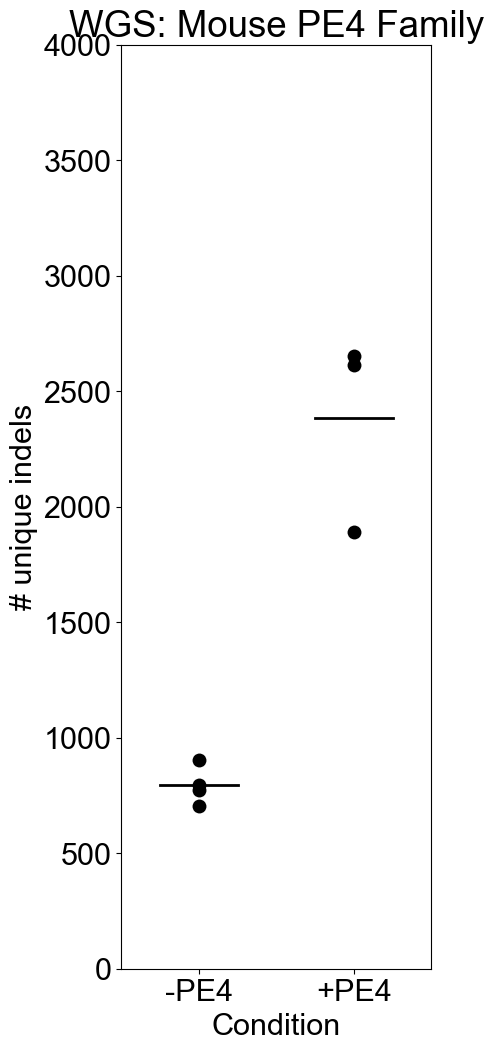

In [48]:
# PEmbryo Mouse PE4 family INDELs
    
qual_test = []

for cutoff in [0.2]:
    
    sample_tracker={}
    for s in np.arange(0,7):
        sample_tracker[s]=0

    indel_tracker={}
    for s in np.arange(0,7):
        indel_tracker[s]=[] 
        
    qual_scores={}
    for s in np.arange(0,7):
        qual_scores[s]=[] 
        
    allele_fracs=[]

    for file in os.listdir('vcfs/family1/'):
        if ".vcf" in file and "PEmbryo" in file and "000086.8" not in file and "000087.8" not in file and ".tbi" not in file:
            count=0
            countt=0

            with open('vcfs/family1/'+file,'r') as f:
                data = [x.rstrip().split("\t") for x in f.readlines() if x[0:2]!="##"]
            #print(data[0])
            for x in data[1:]:
                #print(x)
                GT_index = x[8].split(":").index("GT")
                DP_index = x[8].split(":").index("DP")
                qual_score = float(x[5])

                dp_flag=0
                for sample in x[9:]:

                    try:
                        if int(sample.split(":")[DP_index])<30:# or qual_score < cutoff: #x[5] = -log10(likelihood of incorrect call), cutoff chosen empirically
                            dp_flag=1
                    except ValueError:
                        dp_flag=1

                if dp_flag==1:
                    continue #pass
                else:
                    count+=1

                    if len(x[3])!=len(x[4]) and "," not in x[3] and "," not in x[4]: #SIMPLE INDELs
                        countt+=1
                        AD_i = x[8].split(":").index("AD")
                        ad_tracker=[]
                        a_count=0

                        for s,sample in enumerate(x[9:]):
                            flagg=0
                            ad = sample.split(":")[AD_i]
                            a_counts = ad.split(",") 
                            for a,allele_count in enumerate(a_counts):
                                if a>0 and int(allele_count)>0: ##a==0 is referring to WT
                                    flagg=1
                            if flagg==1:
                                a_count+=1
                                ad_tracker.append(1)
                            else:
                                ad_tracker.append(0)

                        if a_count==1:
                            
                            s_i = ad_tracker.index(1)
                            
                            avg_DP = [int(i[3:]) for i in x[7].split(';') if "DP=" in i][0]/6 
                            sample_data = x[9:][s_i]
                            sample_DP = int(sample_data.split(":")[DP_index])
                            sample_MAF = int(sample_data.split(":")[AD_i].split(",")[1])/sample_DP 
                            length_of_indel = np.abs(len(x[3])-len(x[4]))
                            
                            if sample_MAF>=cutoff:
                            
                                sample_tracker[s_i]+=1
                                indel_tracker[s_i]+=[x]
                            
                                qual_scores[s_i].append([qual_score,avg_DP,sample_DP,sample_MAF,length_of_indel])
                            
                            #if s_i==0 and 300<qual_score<2000:
                            #    print(x)
     
                            #if float(x[5]) > 5000:
                            #    print(x)

                        else:
                            pass

                #break


    print(sample_tracker)

    cond_1 = [sample_tracker[x] for x in [0,1,5,6]]
    cond_2 = [sample_tracker[x] for x in [2,3,4]]
    listtt = []

    for i in sample_tracker.keys():
        if i in [0,1,5,6]:
            listtt.append([i,sample_tracker[i],'-PE4'])
        elif i in [2,3,4]:
            listtt.append([i,sample_tracker[i],'+PE4'])


    df_collect = pd.DataFrame(listtt,columns=['Sample',"Emergent Indels","Condition"])

    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 22
    plt.rcParams["text.color"] = 'black'
    plt.figure(facecolor='white',figsize=(4,12))
    plt.title('WGS: Mouse PE4 Family')
    sns.stripplot(data=df_collect,x='Condition',y='Emergent Indels',jitter=0,color='black',s=10)
    sns.boxplot(data=df_collect,x='Condition',y='Emergent Indels',width=0.5,showmeans=True,meanline=True,meanprops={'color': 'k', 'ls': '-', 'lw': 2},medianprops={'visible': False}, whiskerprops={'visible': False},zorder=10,showfliers=False,showbox=False,showcaps=False)
    plt.ylim([0,4000])
    plt.ylabel('# unique indels')

    plt.show()

[0.34067358 0.07512953 0.02331606 0.12176166 0.05310881 0.26813472
 0.02590674 0.09196891]
[0.33776301 0.089701   0.02547065 0.14285714 0.04872647 0.22923588
 0.02657807 0.09966777]
[0.1047065  0.07297726 0.01374934 0.06292967 0.3442623  0.3188789
 0.02432575 0.05817028]
[0.12259525 0.09920785 0.01923802 0.07129385 0.39192757 0.22444361
 0.02753678 0.04375707]
[0.14050536 0.10183767 0.01914242 0.06470138 0.36217458 0.21975498
 0.03330781 0.0585758 ]
[0.2688478  0.09672831 0.03271693 0.20056899 0.0512091  0.21479374
 0.03556188 0.09957326]
[0.20854271 0.07160804 0.0201005  0.13316583 0.0678392  0.39572864
 0.02512563 0.07788945]
[772, 903, 1891, 2651, 2612, 703, 796]
[0. 0. 0. 0. 0. 0. 0.]
[263. 305. 198. 325. 367. 189. 166.]
[321. 386. 336. 588. 633. 257. 223.]
[339. 409. 362. 639. 683. 280. 239.]
[433. 538. 481. 828. 852. 421. 345.]
[ 474.  582. 1132. 1867. 1798.  457.  399.]
[ 681.  789. 1735. 2462. 2372.  608.  714.]
[ 701.  813. 1781. 2535. 2459.  633.  734.]


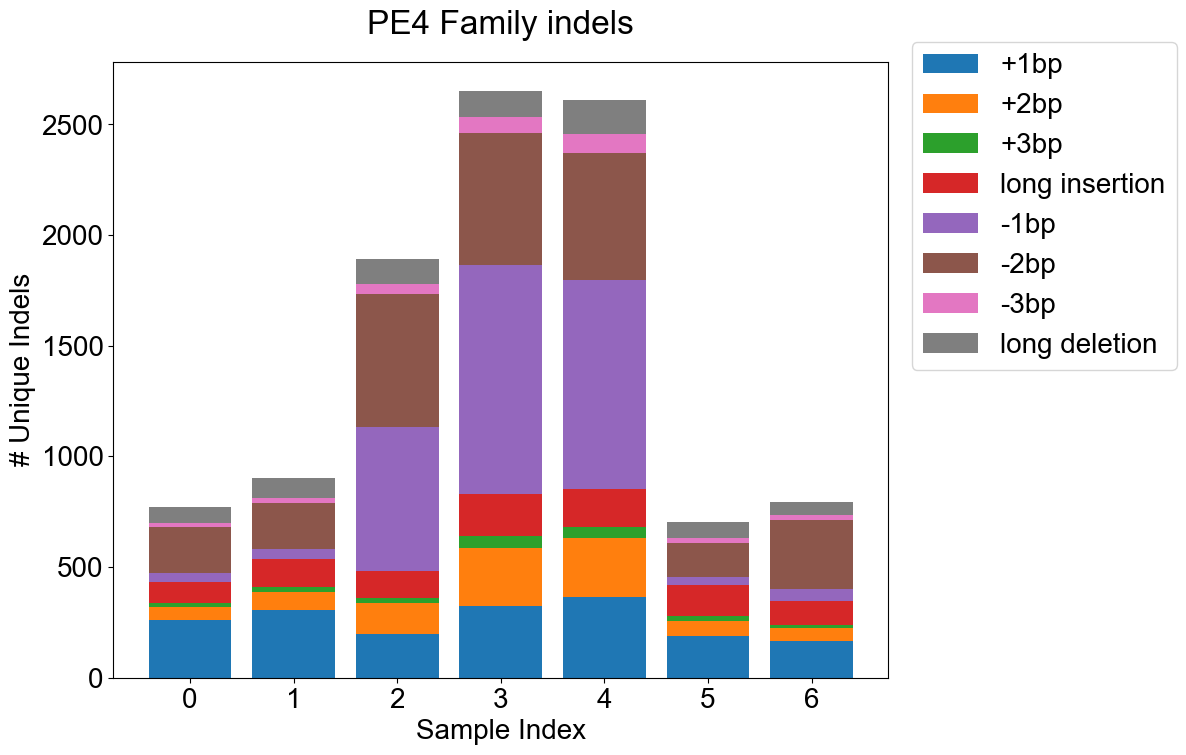

In [50]:
freqs=[]
sizes =[]
for samp in indel_tracker:
    single_insertion,double_insertion,triple_insertion,long_insertion,single_deletion,double_deletion,triple_deletion,long_deletion = (0,0,0,0,0,0,0,0)
    sizes.append(len(indel_tracker[samp]))
    for x in indel_tracker[samp]:
        ref = x[3]
        allele = x[4]
        #print(samp,len(indel_tracker[samp]),ref,allele)
        diff = len(allele)-len(ref)
        if diff==1:
            single_insertion+=1
        elif diff==2:
            double_insertion+=1
        elif diff==3:
            triple_insertion+=1
        elif diff>3:
            long_insertion+=1
        elif diff==-1:
            single_deletion+=1
        elif diff==-2:
            double_deletion+=1
        elif diff==-3:
            triple_deletion+=1
        elif diff<-3:
            long_deletion+=1
            
    outcome_freq = np.array([single_insertion,double_insertion,triple_insertion,long_insertion,single_deletion,double_deletion,triple_deletion,long_deletion])/len(indel_tracker[samp])
    freqs.append(outcome_freq)
    print(outcome_freq)
print(sizes)

plt.figure(figsize=(10,8),facecolor='white')
plt.title("PE4 Family indels")
plt.rcParams.update({'font.size': 20})
plt.rcParams['axes.titlepad'] = 20 
bottoms = np.array([0.0]*7)
for f in np.arange(0,len(freqs[1])):
    print(bottoms)
    fs = np.array([s[f] for s in freqs])*np.array(sizes)
    plt.bar(np.arange(0,7,1),fs,bottom=bottoms)
    bottoms+=fs

plt.legend(["+1bp","+2bp","+3bp","long insertion","-1bp","-2bp","-3bp","long deletion"],loc=(1.03,0.5))
plt.xticks(np.arange(0,7,1), np.arange(0,7,1), rotation=0)
plt.ylabel("# Unique Indels")
plt.xlabel("Sample Index")
plt.show()

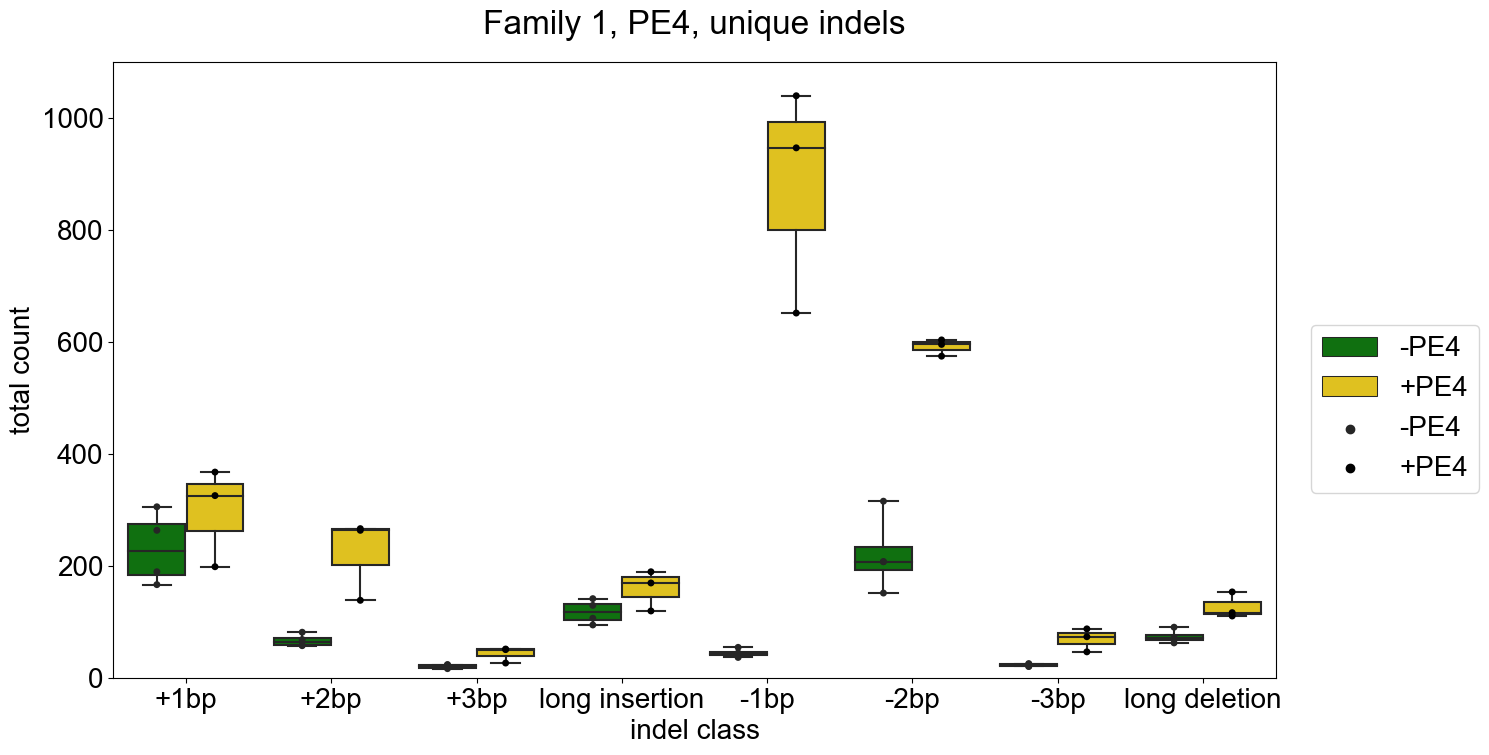

In [52]:
indel_classes_ordered = ["+1bp","+2bp","+3bp","long insertion","-1bp","-2bp","-3bp","long deletion"]
data = []
data2=[]
log2FC = []
log2FC_error= []
log2FC_universal=[]

for i,x in enumerate(freqs[0]): 
   
    indel_class = indel_classes_ordered[i]
    group_1=[]
    group_2=[]
    
    for s,sample in enumerate(freqs):
        if s in [0,1,5,6]:
            group_1.append(freqs[s][i]*sizes[s])
            data.append([s,indel_class,freqs[s][i]*sizes[s],'-PE4'])
            data2.append([s,indel_class,freqs[s][i],'-PE4'])
        elif s in [2,3,4]:
            group_2.append(freqs[s][i]*sizes[s])
            data.append([s,indel_class,freqs[s][i]*sizes[s],'+PE4'])
            data2.append([s,indel_class,freqs[s][i],'+PE4}'])
    
    log2FC.append(np.log2(np.mean(group_2)/np.mean(group_1)))
    log2FC_error.append(np.sqrt((np.std(group_2)/(np.mean(group_2)*np.log(2)))**2+(np.std(group_1)/(np.mean(group_1)*np.log(2)))**2))
    log2FC_universal.append(['family1','PE4',indel_class,np.log2(np.mean(group_2)/np.mean(group_1)),np.sqrt((np.std(group_2)/(np.mean(group_2)*np.log(2)))**2+(np.std(group_1)/(np.mean(group_1)*np.log(2)))**2)])
     

df = pd.DataFrame(data,columns=['sample','indel class','total count','treatment'])
df2 = pd.DataFrame(data2,columns=['sample','indel class','frequency','treatment'])
            
plt.figure(figsize=(15,8),facecolor='white')
plt.title('Family 1, PE4, unique indels')
sns.boxplot(data=df,x='indel class',y='total count',hue='treatment',whis=2.0,palette=['green','gold'])
sns.stripplot(data=df,x='indel class',y='total count',hue='treatment',dodge=True,jitter=0,color='black')
plt.ylim([0,1100])
plt.legend(loc=(1.03,0.3))
plt.show()

[0. 0. 0. 0. 0. 0. 0.]
[0.34067358 0.33776301 0.1047065  0.12259525 0.14050536 0.2688478
 0.20854271]
[0.41580311 0.42746401 0.17768377 0.22180309 0.24234303 0.3655761
 0.28015075]
[0.43911917 0.45293466 0.1914331  0.24104112 0.26148545 0.39829303
 0.30025126]
[0.56088083 0.59579181 0.25436277 0.31233497 0.32618683 0.59886202
 0.43341709]
[0.61398964 0.64451827 0.59862507 0.70426254 0.68836141 0.65007112
 0.50125628]
[0.88212435 0.87375415 0.91750397 0.92870615 0.90811639 0.86486486
 0.89698492]
[0.90803109 0.90033223 0.94182972 0.95624293 0.9414242  0.90042674
 0.92211055]


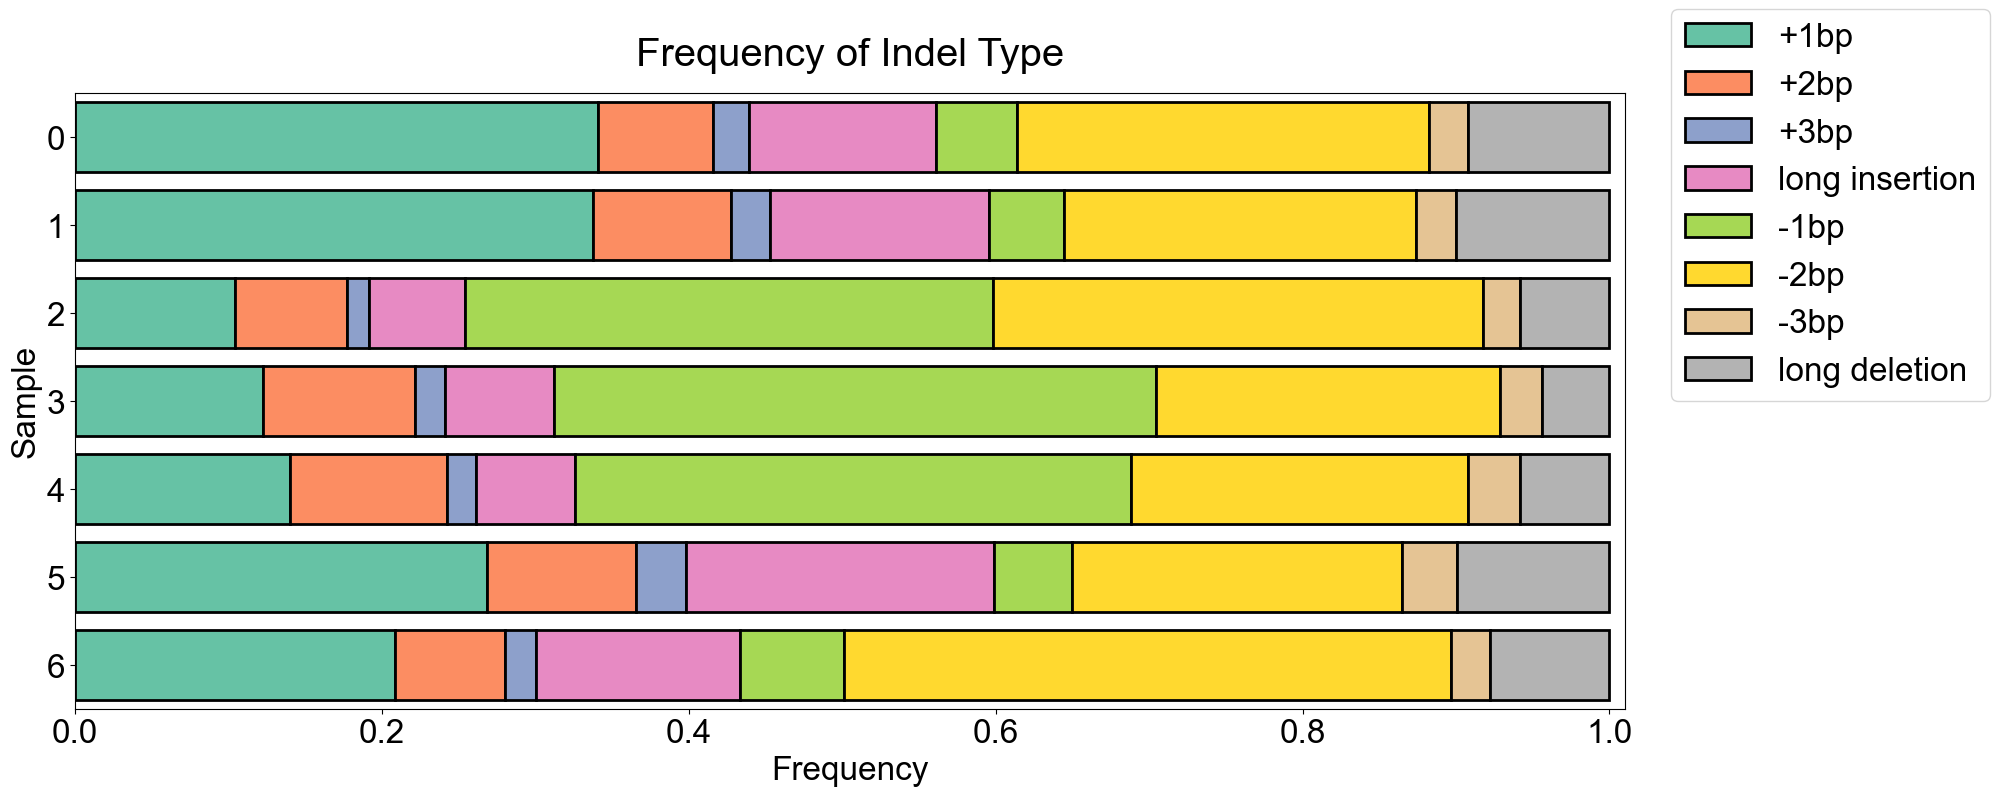

In [53]:
plt.figure(figsize=(20,8),facecolor='white')
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 24
bottoms = np.array([0.0]*7)
for f in np.arange(0,len(freqs[1])):
    print(bottoms)
    fs = np.array([s[f] for s in freqs])
    plt.barh(np.arange(0,7,1),fs,left=bottoms,edgecolor='black',linewidth=2,color=plt.cm.Set2(f))
    bottoms+=fs

plt.ylim([6.5,-0.5])
plt.xlim([0,1.01])
plt.legend(["+1bp","+2bp","+3bp","long insertion","-1bp","-2bp","-3bp","long deletion"],loc=(1.03,0.5))
plt.ylabel("Sample")
plt.xlabel("Frequency")
plt.title("Frequency of Indel Type")
plt.show()


{0: 1250, 1: 1255, 2: 1577, 3: 1238, 4: 1349, 5: 1278, 6: 1507}


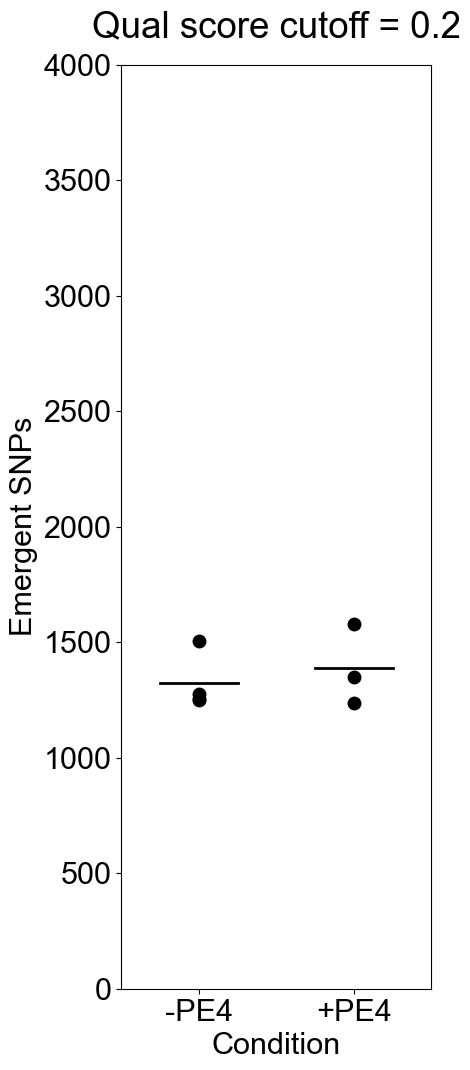

In [54]:
# PEmbryo Mouse PE4 family SNPs
        
qual_test = []

for cutoff in [0.2]:
    
    sample_tracker={}
    for s in np.arange(0,7):
        sample_tracker[s]=0

    snp_tracker={}
    for s in np.arange(0,7):
        snp_tracker[s]=[] 
        
    qual_scores={}
    for s in np.arange(0,7):
        qual_scores[s]=[] 
        
    allele_fracs=[]

    for file in os.listdir('vcfs/family1/'):
        if ".vcf" in file and "PEmbryo" in file and "000086.8" not in file and "000087.8" not in file and ".tbi" not in file:
            count=0
            countt=0

            with open('vcfs/family1/'+file,'r') as f:
                data = [x.rstrip().split("\t") for x in f.readlines() if x[0:2]!="##"]
            #print(data[0])
            for x in data[1:]:
                #print(x)
                GT_index = x[8].split(":").index("GT")
                DP_index = x[8].split(":").index("DP")
                qual_score = float(x[5])

                dp_flag=0
                for sample in x[9:]:

                    try:
                        if int(sample.split(":")[DP_index])<30:# or qual_score < cutoff: #x[5] = -log10(likelihood of incorrect call), cutoff chosen empirically
                            dp_flag=1
                    except ValueError:
                        dp_flag=1

                if dp_flag==1:
                    continue #pass
                else:
                    count+=1

                    if len(x[3])==len(x[4])==1 and "," not in x[3] and "," not in x[4]: #SNPs
                        countt+=1
                        AD_i = x[8].split(":").index("AD")
                        ad_tracker=[]
                        a_count=0

                        for s,sample in enumerate(x[9:]):
                            flagg=0
                            ad = sample.split(":")[AD_i]
                            a_counts = ad.split(",") 
                            for a,allele_count in enumerate(a_counts):
                                if a>0 and int(allele_count)>0: ##a==0 is referring to WT
                                    flagg=1
                            if flagg==1:
                                a_count+=1
                                ad_tracker.append(1)
                            else:
                                ad_tracker.append(0)

                        if a_count==1:
                            
                            s_i = ad_tracker.index(1)
                            
                            avg_DP = [int(i[3:]) for i in x[7].split(';') if "DP=" in i][0]/6 
                            sample_data = x[9:][s_i]
                            sample_DP = int(sample_data.split(":")[DP_index])
                            sample_MAF = int(sample_data.split(":")[AD_i].split(",")[1])/sample_DP 
                            length_of_snp = np.abs(len(x[3])-len(x[4]))
                            
                            if sample_MAF>=cutoff:
                            
                                sample_tracker[s_i]+=1
                                snp_tracker[s_i]+=[x]
                            
                                qual_scores[s_i].append([qual_score,avg_DP,sample_DP,sample_MAF,length_of_snp])
                            
                            #if s_i==0 and 300<qual_score<2000:
                            #    print(x)
     
                            #if float(x[5]) > 5000:
                            #    print(x)

                        else:
                            pass

                #break

    print(sample_tracker)

    cond_1 = [sample_tracker[x] for x in [0,1,5,6]]
    cond_2 = [sample_tracker[x] for x in [2,3,4]]
    listtt = []

    for i in sample_tracker.keys():
        if i in [0,1,5,6]:
            listtt.append([i,sample_tracker[i],'-PE4'])
        elif i in [2,3,4]:
            listtt.append([i,sample_tracker[i],'+PE4'])

    df_collect = pd.DataFrame(listtt,columns=['Sample',"Emergent SNPs","Condition"])

    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 22
    plt.rcParams["text.color"] = 'black'
    plt.figure(facecolor='white',figsize=(4,12))
    plt.title('Qual score cutoff = '+str(cutoff))
    sns.stripplot(data=df_collect,x='Condition',y='Emergent SNPs',jitter=0,color='black',size=10)
    sns.boxplot(data=df_collect,x='Condition',y='Emergent SNPs',width=0.5,showmeans=True,meanline=True,meanprops={'color': 'k', 'ls': '-', 'lw': 2},medianprops={'visible': False}, whiskerprops={'visible': False},zorder=10,showfliers=False,showbox=False,showcaps=False)
    plt.ylim([0,4000])
    plt.show()

0 1250.0
[[  0.  92. 124.  55.]
 [135.   0.  44. 127.]
 [207.  69.   0.  85.]
 [ 75. 188.  49.   0.]]
[0.0736, 0.0992, 0.044, 0.108, 0.0352, 0.1016, 0.1656, 0.0552, 0.068, 0.06, 0.1504, 0.0392]
1 1255.0
[[  0. 110. 107.  46.]
 [135.   0.  54. 112.]
 [216.  69.   0.  81.]
 [ 80. 177.  68.   0.]]
[0.08764940239043825, 0.08525896414342629, 0.036653386454183264, 0.10756972111553785, 0.04302788844621514, 0.08924302788844622, 0.17211155378486057, 0.0549800796812749, 0.06454183266932272, 0.06374501992031872, 0.14103585657370518, 0.054183266932270914]
2 1577.0
[[  0. 152. 144.  80.]
 [181.   0.  57. 117.]
 [275.  67.   0.  78.]
 [114. 230.  82.   0.]]
[0.0963855421686747, 0.09131261889663919, 0.05072923272035511, 0.11477488902980343, 0.03614457831325301, 0.07419150285351934, 0.17438173747622068, 0.0424857324032974, 0.04946100190234623, 0.07228915662650602, 0.14584654407102093, 0.05199746353836398]
3 1238.0
[[  0. 101. 132.  63.]
 [129.   0.  46. 116.]
 [157.  75.   0.  74.]
 [ 94. 178.  73.   

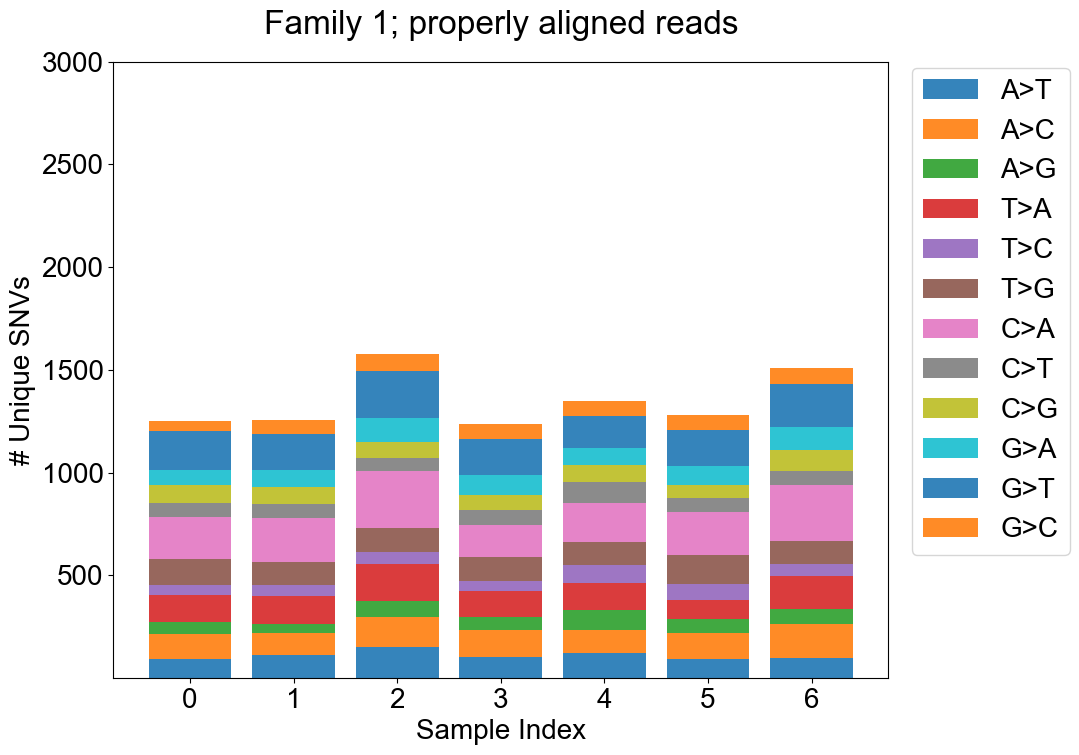

In [55]:
vals = list(sample_tracker.values())
freqs=[]
labels = []
data = []

for samp in snp_tracker:
    order = ['A','T','C','G']
    snp_matrix = np.zeros((4,4))
    
    for x in snp_tracker[samp]:
        ref=x[3]
        allele=x[4]
        r_i = order.index(ref)
        a_i = order.index(allele)
    
        snp_matrix[r_i,a_i]+=1
    
    norm_matrix = snp_matrix/np.sum(snp_matrix)
    print(samp,np.sum(snp_matrix))
    print(snp_matrix)
 
    label = []
    datum = []
    for r in np.arange(0,4,1):
        for c in np.arange(0,4,1):
            if r!=c:
                label.append(order[r]+">"+order[c])
                datum.append(norm_matrix[r,c])
    
    labels.append(label)
    data.append(datum)
    print(datum)

plt.rcParams.update({'font.size': 20})
plt.rcParams['axes.titlepad'] = 20 
plt.figure(figsize=(10,8),facecolor='white')
plt.title('Family 1; properly aligned reads')

bottoms = np.array([0.0]*7)
collector = []
group_1 = []
group_2 = []
log2FC = []
log2FC_error = []

for x in np.arange(0,len(labels[0])):
    #print(bottoms)
    nums = np.array([samp[x] for samp in data])*np.array(vals)
    #print(nums)
    plt.bar(np.arange(0,len(data)),nums,bottom=bottoms,alpha=0.9)
    bottoms+=nums
    
    for s,samp in enumerate(data):
        if s in [0,1,5,6]:
            collector.append([s,labels[0][x],samp[x]*np.array(vals)[s],'-PE4'])
            group_1.append(samp[x]*np.array(vals)[s])

        elif s in [2,3,4]:
            collector.append([s,labels[0][x],samp[x]*np.array(vals)[s],'+PE4'])
            group_2.append(samp[x]*np.array(vals)[s])
        
    log2FC.append(np.log2(np.mean(group_2)/np.mean(group_1)))
    log2FC_error.append(np.sqrt((np.std(group_2)/(np.mean(group_2)*np.log(2)))**2+(np.std(group_1)/(np.mean(group_1)*np.log(2)))**2))
    log2FC_universal.append(['family1','PE4',labels[0][x],np.log2(np.mean(group_2)/np.mean(group_1)),np.sqrt((np.std(group_2)/(np.mean(group_2)*np.log(2)))**2+(np.std(group_1)/(np.mean(group_1)*np.log(2)))**2)])
    
plt.legend(labels[0],loc=(1.03,0.2))
plt.ylabel("# Unique SNVs")
plt.xlabel("Sample Index")
plt.ylim([1,3E3])
plt.show()


[['A>T', 'A>C', 'A>G', 'T>A', 'T>C', 'T>G', 'C>A', 'C>T', 'C>G', 'G>A', 'G>T', 'G>C'], ['A>T', 'A>C', 'A>G', 'T>A', 'T>C', 'T>G', 'C>A', 'C>T', 'C>G', 'G>A', 'G>T', 'G>C'], ['A>T', 'A>C', 'A>G', 'T>A', 'T>C', 'T>G', 'C>A', 'C>T', 'C>G', 'G>A', 'G>T', 'G>C'], ['A>T', 'A>C', 'A>G', 'T>A', 'T>C', 'T>G', 'C>A', 'C>T', 'C>G', 'G>A', 'G>T', 'G>C'], ['A>T', 'A>C', 'A>G', 'T>A', 'T>C', 'T>G', 'C>A', 'C>T', 'C>G', 'G>A', 'G>T', 'G>C'], ['A>T', 'A>C', 'A>G', 'T>A', 'T>C', 'T>G', 'C>A', 'C>T', 'C>G', 'G>A', 'G>T', 'G>C'], ['A>T', 'A>C', 'A>G', 'T>A', 'T>C', 'T>G', 'C>A', 'C>T', 'C>G', 'G>A', 'G>T', 'G>C']]
A>T
T>A

A>C
T>G

A>G
T>C

C>A
G>T

C>T
G>A

C>G
G>C



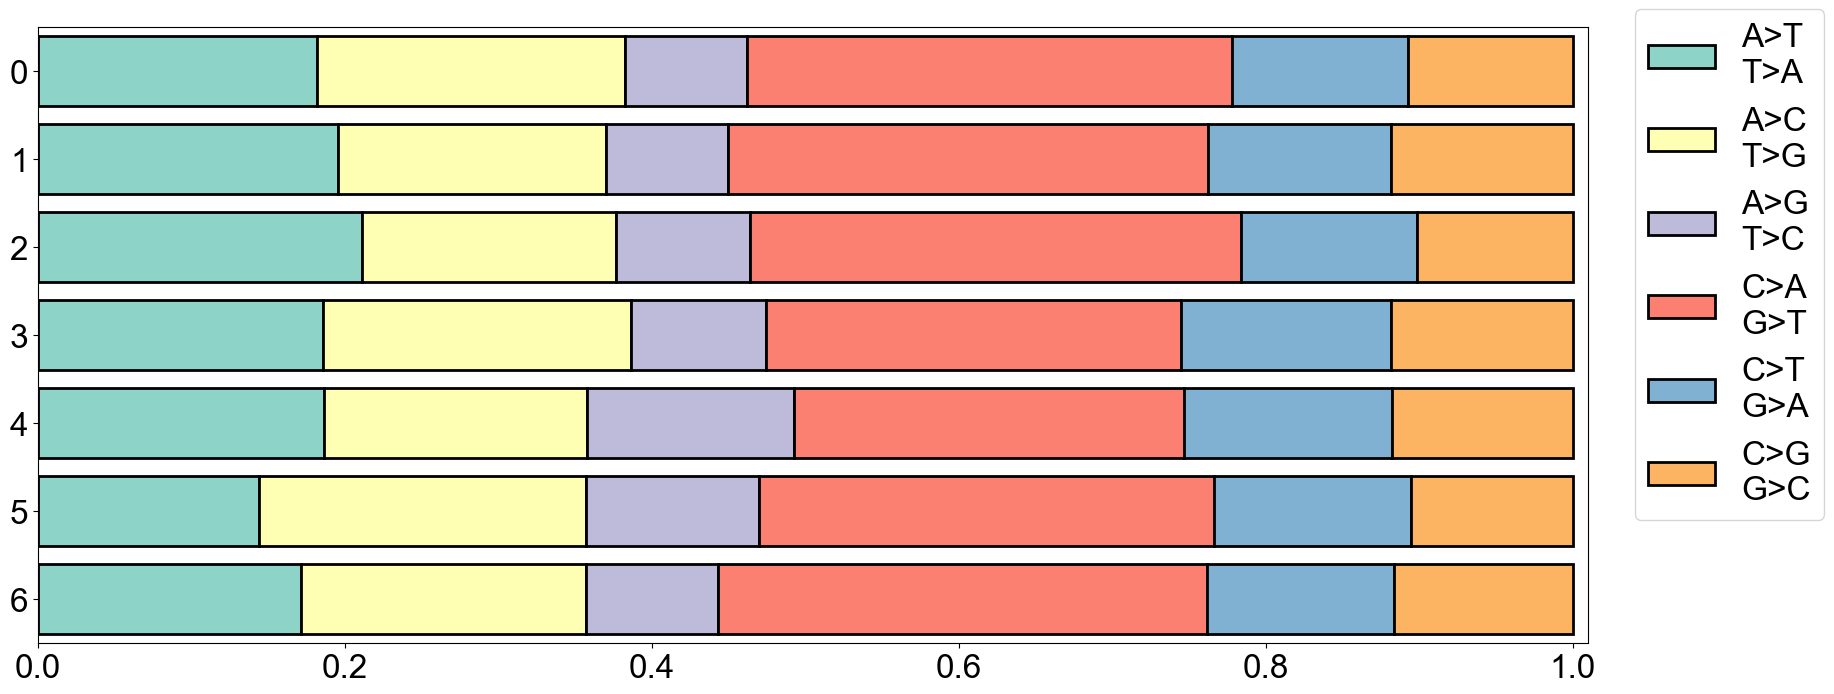

In [56]:
mutations = ['A>T', 'A>C', 'A>G', 'T>A', 'T>C', 'T>G', 'C>A', 'C>T', 'C>G', 'G>A', 'G>T', 'G>C']
pairs = [[0,3],[1,5],[2,4],[6,10],[7,9],[8,11]]

print(labels)

plt.figure(facecolor='white',figsize=(20,8))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 24

SBS_labels = []
bottoms = np.array([0.0]*7)
for p,pair in enumerate(pairs):
    #print(bottoms)
    
    pair_label=[]
    for m,mutation in enumerate(mutations):
        if m in pair:
            print(mutation)
            pair_label.append(mutation)
    SBS_labels.append("\n".join(pair_label))
    
    
    nums = np.array([0.0]*7)
    for i in pair:
        nums+=np.array([samp[i] for samp in data])
        
    #print(nums)
    plt.barh(np.arange(0,7),nums,left=bottoms,alpha=1,edgecolor='black',linewidth=2,color=plt.cm.Set3(p))
    
    bottoms+=nums
    
    print()
    
    
plt.legend(SBS_labels,loc=(1.03,0.2))
plt.ylim([6.5,-0.5])
plt.xlim([0,1.01])
    
plt.show()

In [59]:
## Analysis of prime editing target site errors in mouse embryos ##

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import math
import os
import time

/Users/ryanmcnulty/anaconda3/lib/python3.11/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [61]:
def is_same(seq1,seq2):
    flag=0
    for c,char in enumerate(seq1):
        if char.upper()==seq2[c].upper() or char.upper()=='N' or seq2[c].upper()=="N":
            pass
        else:
            flag=1
            break
    if flag==1:
        return(False)
    else:
        return(True)

In [64]:
df = pd.read_excel('../PEmbryo_Figure_Data.xlsx',sheet_name='align_1')

results = []
start=time.time()

for target in ['rnf2','chd2']:
    for stage in ['zygote','2 cell']:
        for method in ['PE3','PE5','HDR']:
            
            group = target+"_"+stage+"_"+method
           
            print(target,stage,method)
            sample_df = df.loc[((df["target"]==target)&(df["stage"]==stage)&(df["method"]==method))]
            valid_sample_df = sample_df.loc[sample_df['# valid_reads']>1000]
            print(len(sample_df),len(valid_sample_df))
            
            print(time.time()-start,'s')
            start=time.time()
            
            for s,sample in enumerate(valid_sample_df.iterrows()):
                filename = sample[1]['filename'].split('.')[0]
                
                percent_wt = float(sample[1]['percent_wt'])
                percent_pe = float(sample[1]['percent_precise'])
                percent_error = float(sample[1]['percent_error'])
                
                for file in os.listdir('fastqs/errors/'):
                    if filename in file and "*" in file:
                        with open('fastqs/errors/'+file,'r') as f:
                            data = [x.rstrip() for x in f.readlines()]
                            reads = [data[i:i+4] for i,x in enumerate(data) if (i+4)%4==0]
                        break
            
                unique_seqs = {}
       
                #initialize
                unique_seqs[reads[0][1][50:250]]=1
                
                for r,read in enumerate(reads[1:]):
                    seq = read[1][50:250]
                    flag=0
                    for key in unique_seqs.copy():
                        if is_same(key,seq):
                            unique_seqs[key]+=1
                            flag=1
                            break
                    if flag==1:
                        pass
                    else:
                        unique_seqs[seq]=1
                                        
                    #if r%1000==0 and r!=0:
                    #    print(r,time.time()-start,'s')
                    #    start=time.time()
                        
                #print(len(unique_seqs))
                
                fracs = []
                for seq in unique_seqs:
                    fracs.append([seq,unique_seqs[seq]/len(reads)])

                fracs.sort(key = lambda x: x[1],reverse=True)
                #print(fracs[0:2])
                #print()
                
                results.append([group,s,filename,percent_wt,percent_pe,percent_error,'',sample[1]['unintended_edit'],len(reads),fracs[0][0],fracs[0][1]])                
                
labels = ['group','index','filename','percent_wt','percent_pe','percent_error','','# reads with errors','# reads','most common error','fraction of reads']
results_df = pd.DataFrame(results,columns=labels)
print(results_df)

rnf2 zygote PE3
20 19
0.0013089179992675781 s
rnf2 zygote PE5
17 17
12.74389386177063 s
rnf2 zygote HDR
16 16
7.753463983535767 s
rnf2 2 cell PE3
13 13
16.30622100830078 s
rnf2 2 cell PE5
17 17
3.4566538333892822 s
rnf2 2 cell HDR
30 28
4.2802698612213135 s
chd2 zygote PE3
16 16
38.411725997924805 s
chd2 zygote PE5
12 12
8.786226272583008 s
chd2 zygote HDR
16 14
3.423293113708496 s
chd2 2 cell PE3
23 19
9.523914813995361 s
chd2 2 cell PE5
18 16
12.717639923095703 s
chd2 2 cell HDR
33 31
12.322535991668701 s
               group  index                                 filename  \
0    rnf2_zygote_PE3      0  PEmbryo_ATTCAGAA_GATCAGAT_TACT_20522_R1   
1    rnf2_zygote_PE3      1  PEmbryo_GAATTCGT_GATCAGAT_TACT_20522_R1   
2    rnf2_zygote_PE3      2  PEmbryo_CTGAAGCT_GATCAGAT_TACT_20522_R1   
3    rnf2_zygote_PE3      3  PEmbryo_TAATGCGC_GATCAGAT_TACT_20522_R1   
4    rnf2_zygote_PE3      4  PEmbryo_CGGCTATG_GATCAGAT_TACT_20522_R1   
..               ...    ...                            

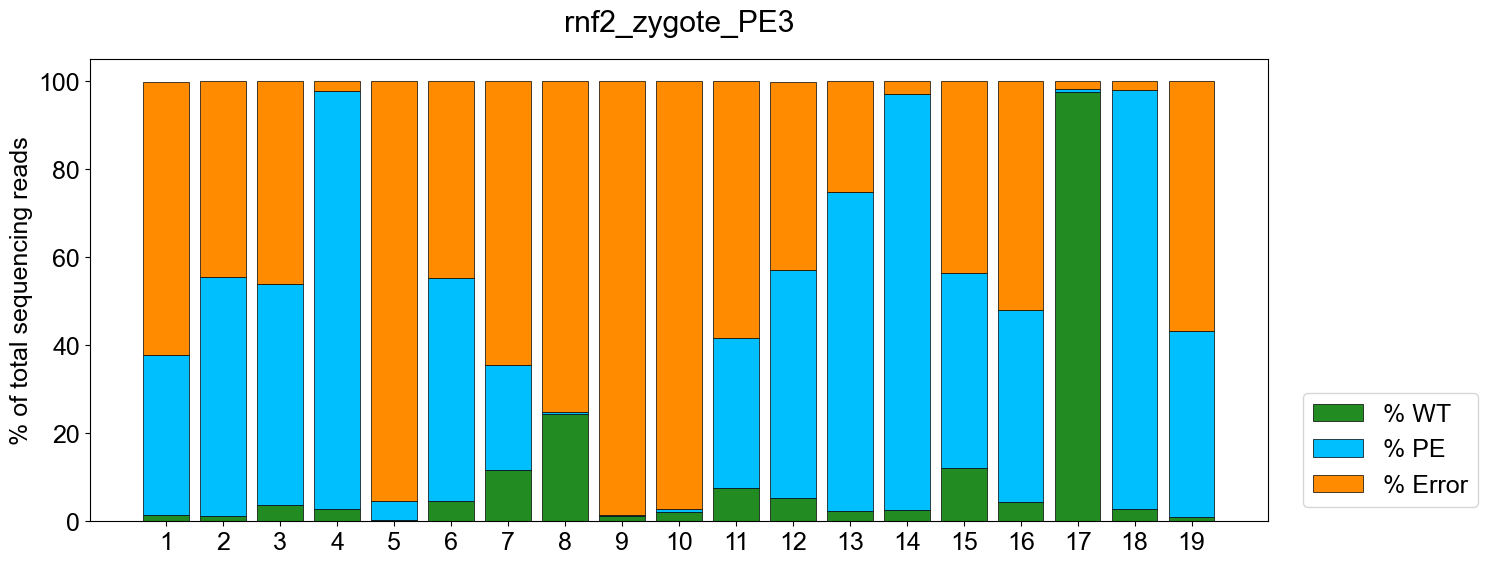

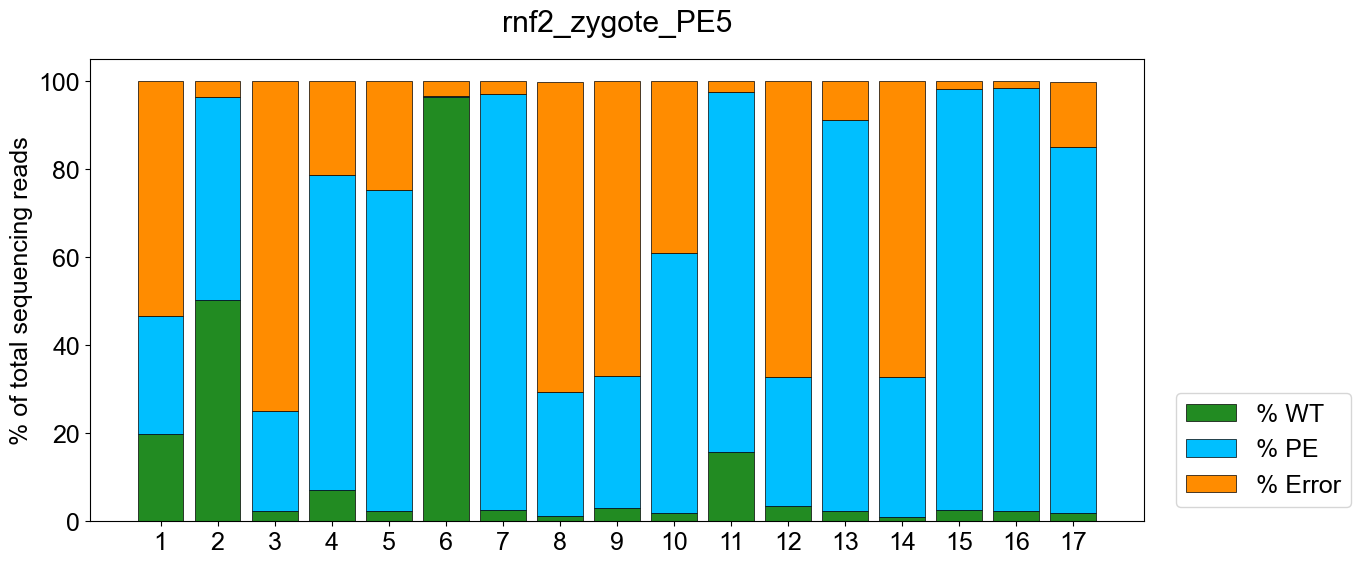

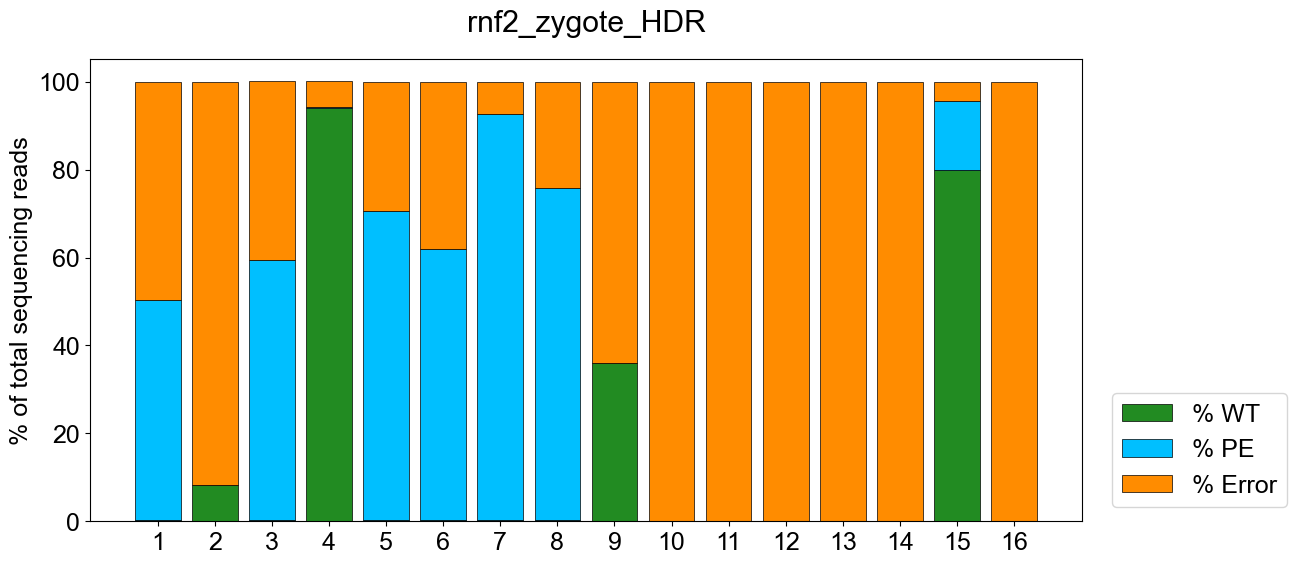

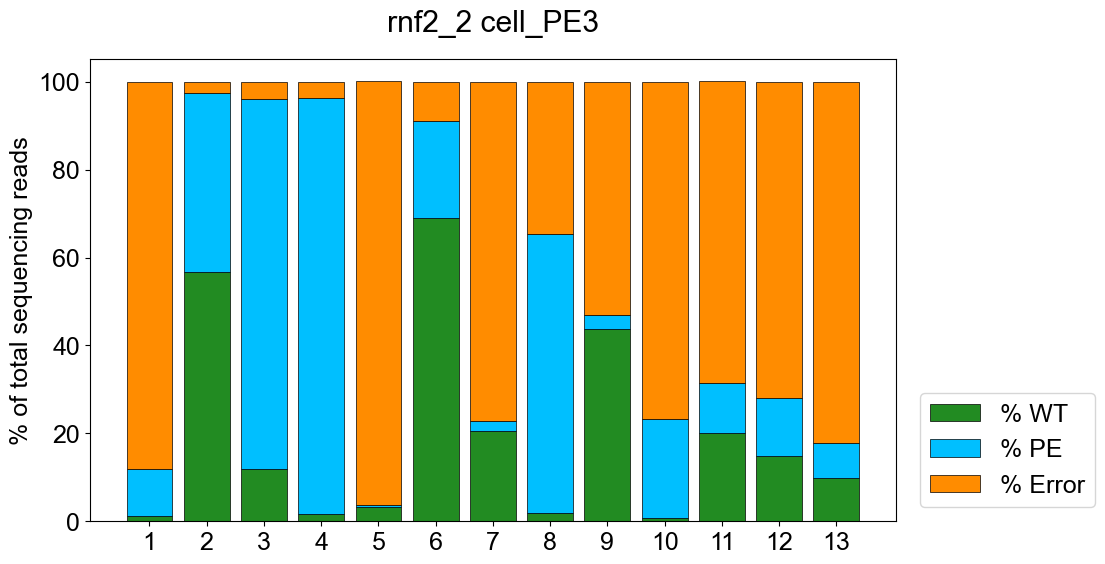

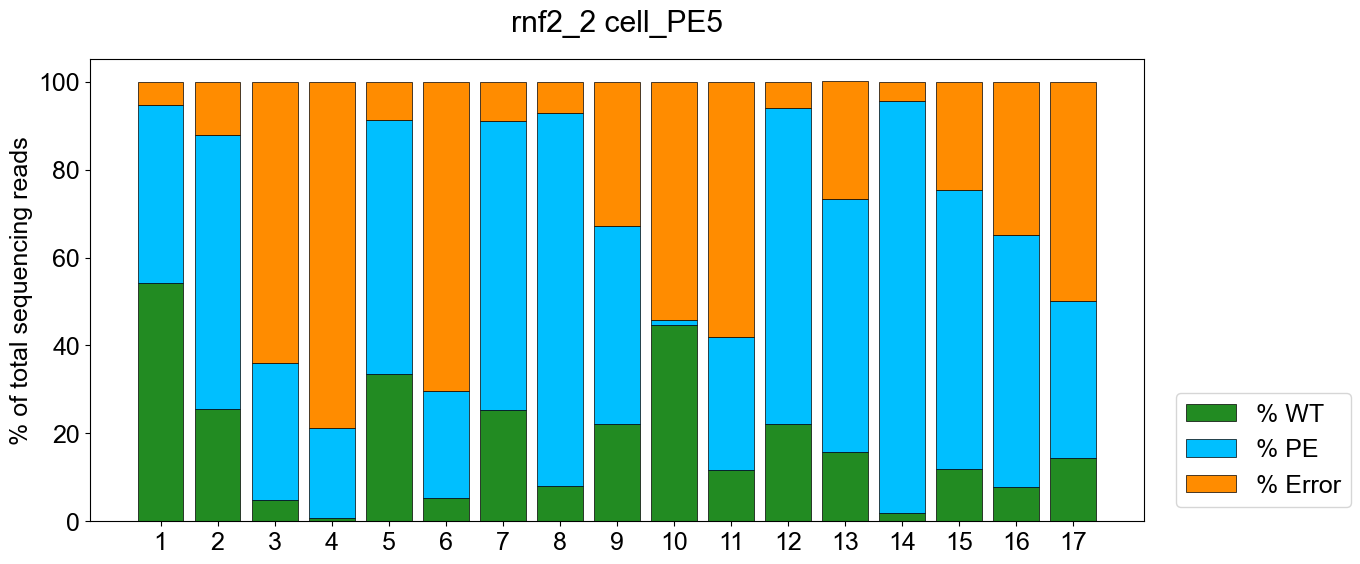

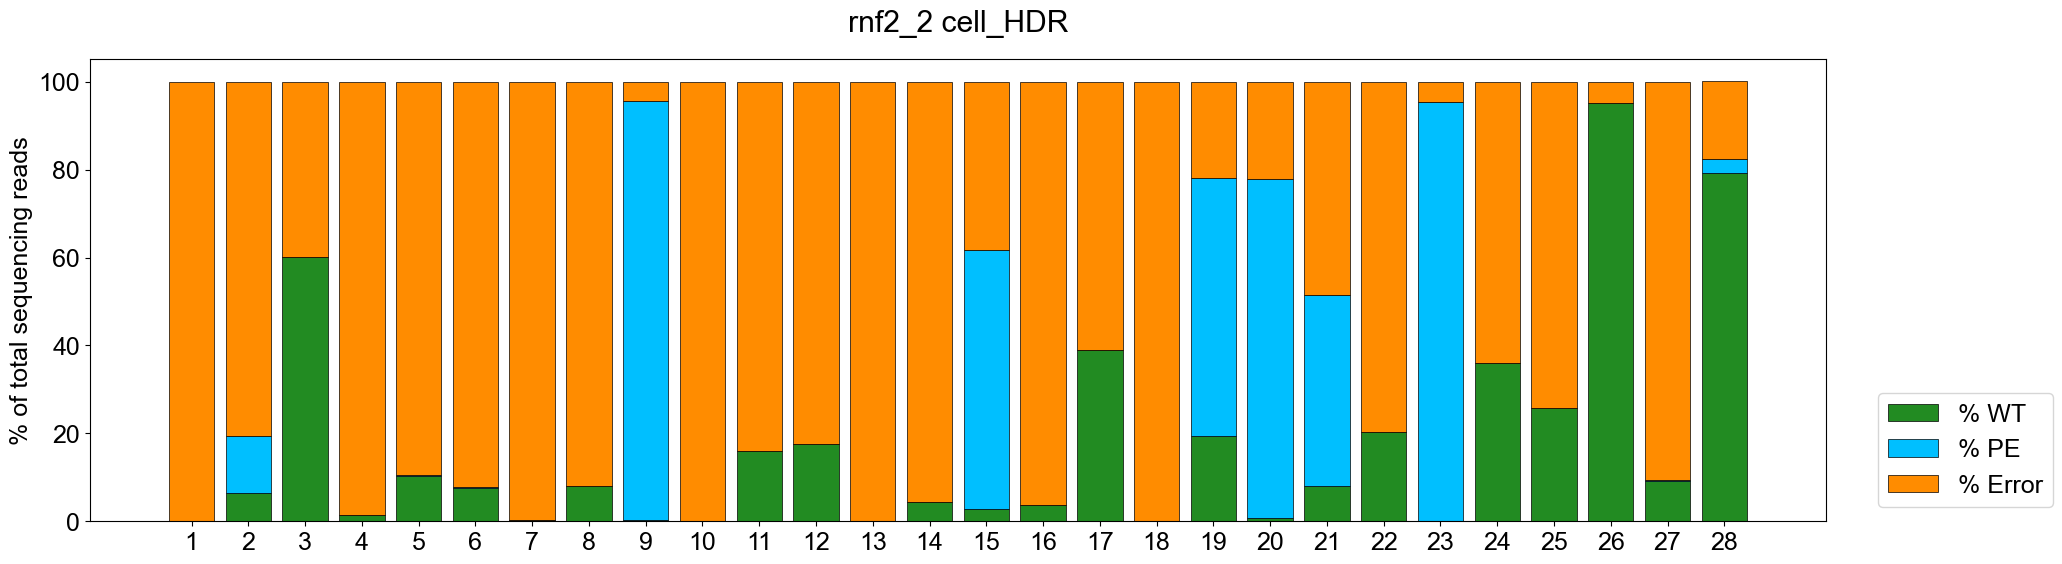

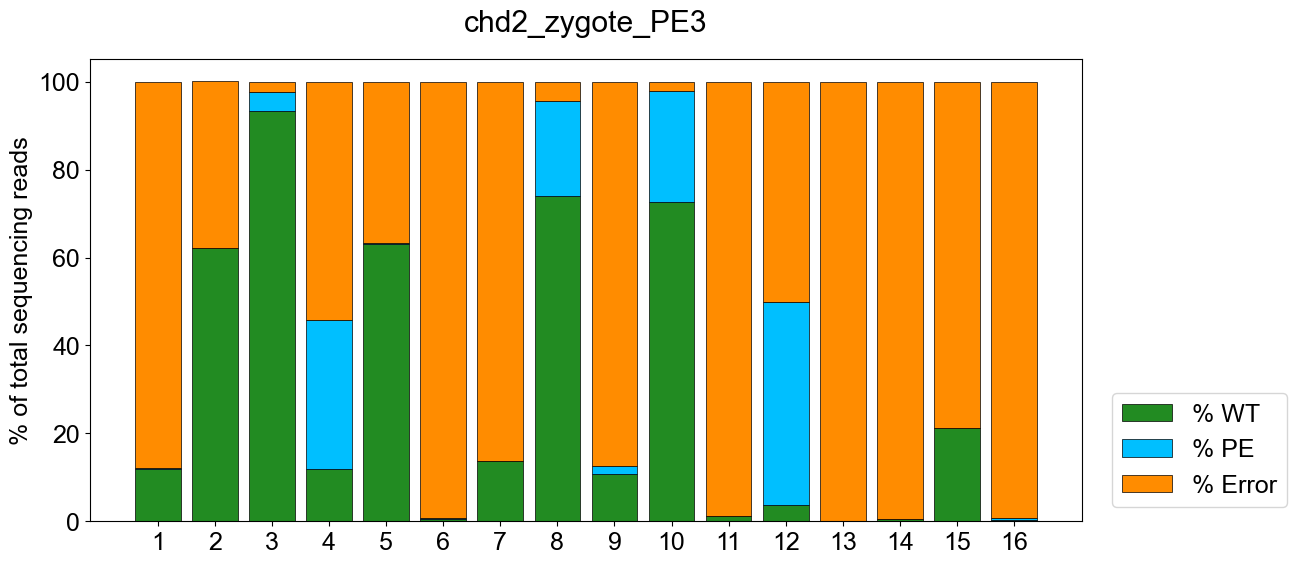

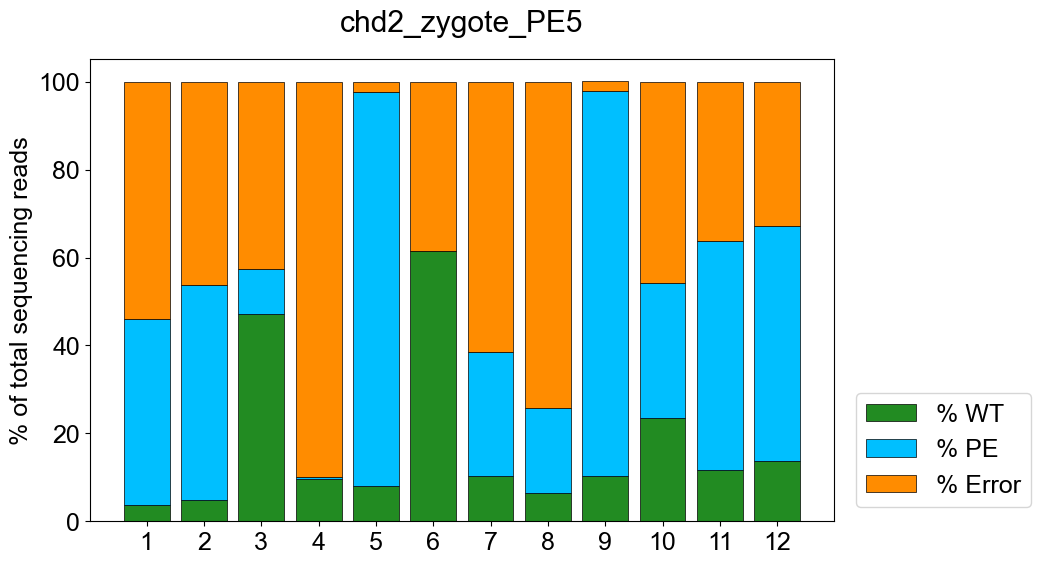

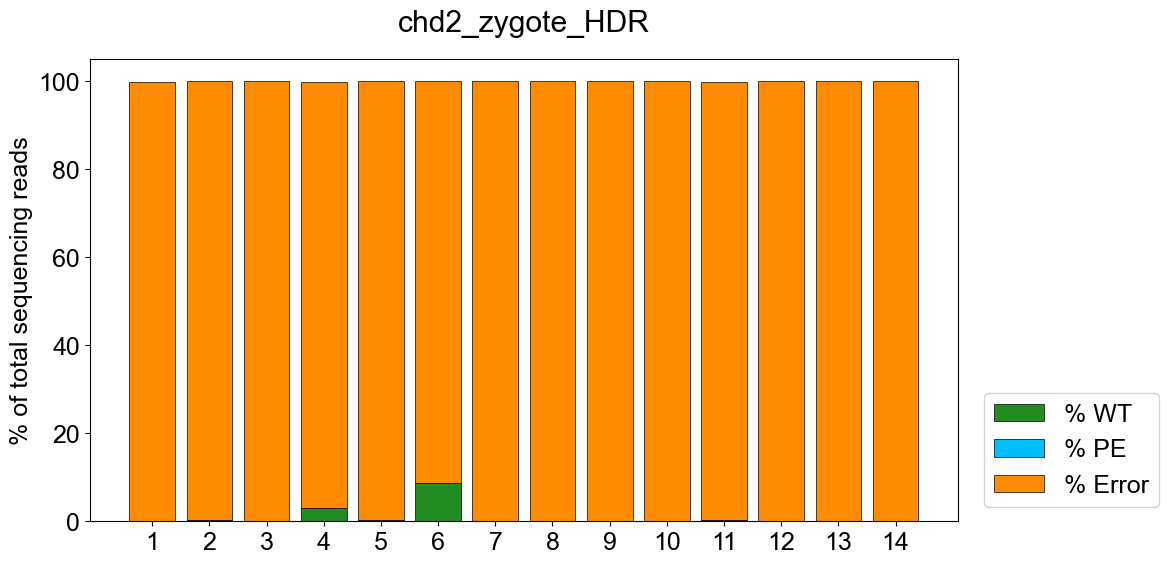

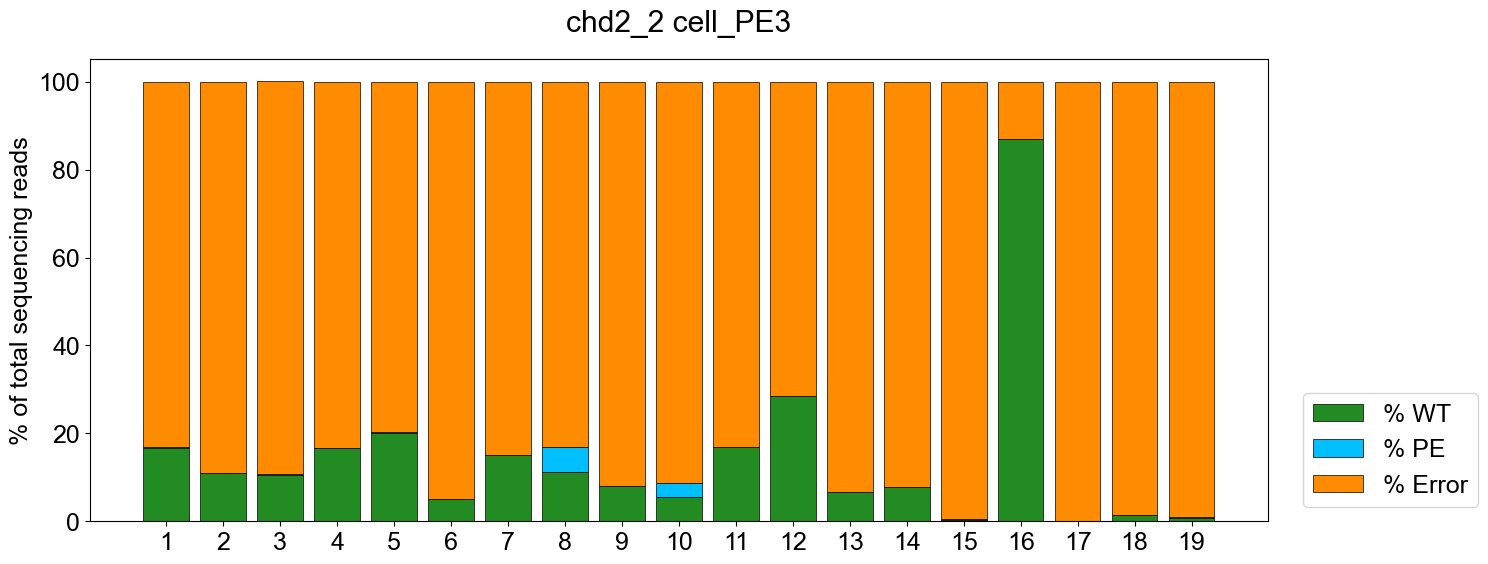

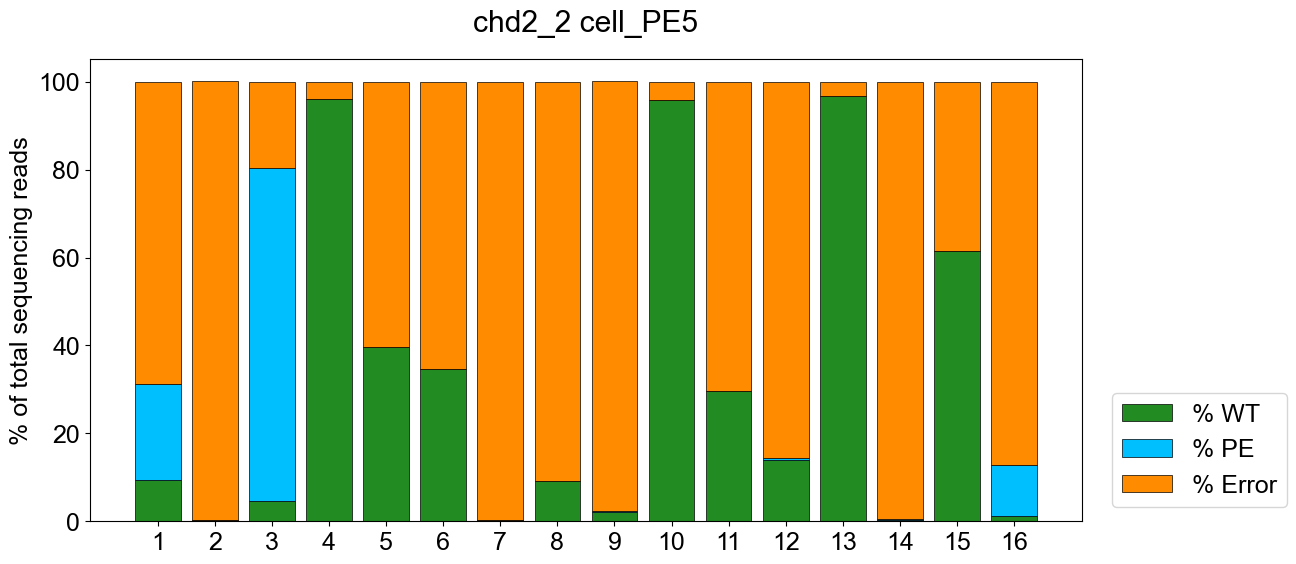

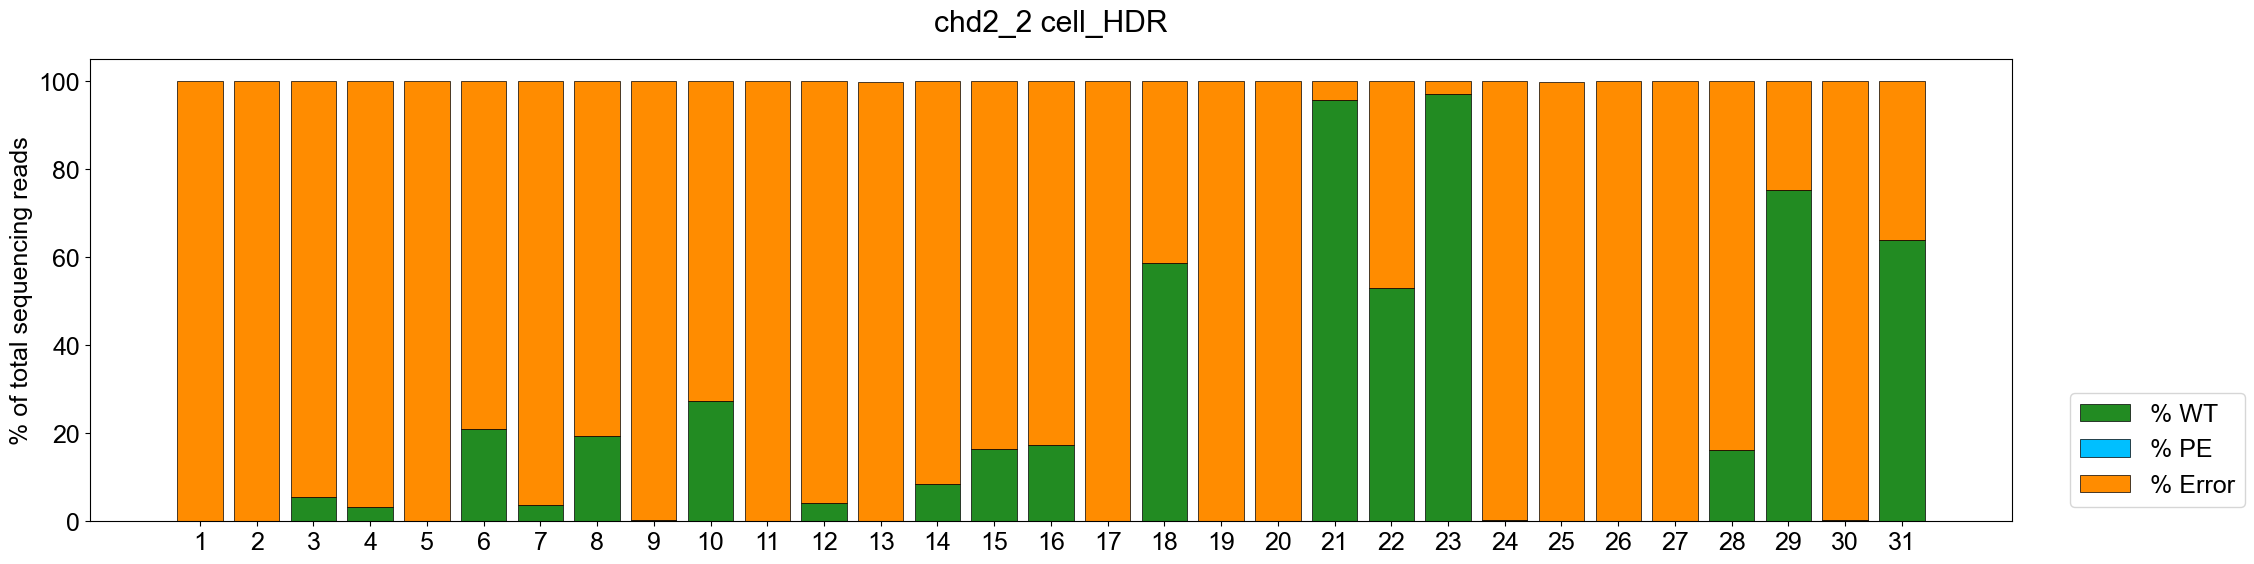

In [66]:
df=results_df

for target in ['rnf2','chd2']:
    for stage in ['zygote','2 cell']:
        for method in ['PE3','PE5','HDR']:
            
            group = target+"_"+stage+"_"+method

            select_df = df.loc[(df["group"]==group)]

            indexes = np.array([int(x) for x in select_df['index'].tolist()])+1
            indexes = [str(x) for x in indexes]
            percent_wt = np.array(select_df['percent_wt'].tolist())
            percent_pe = np.array(select_df['percent_pe'].tolist())
            percent_error = np.array(select_df['percent_error'].tolist())
            
            vals = np.zeros(len(indexes))
            plt.rcParams["font.family"] = "Arial"
            plt.rcParams["font.size"] = 18
            plt.rcParams["text.color"] = 'black'
            plt.figure(figsize=(len(indexes)*0.8,6),facecolor='white')
            plt.title(group)
            colors = ['forestgreen','deepskyblue','darkorange']
            c=0
            for x in [percent_wt,percent_pe,percent_error]:
                plt.bar(indexes,x,bottom=vals,color=colors[c],edgecolor='black',linewidth=0.5)
                vals+=x
                c+=1
            plt.legend(['% WT','% PE','% Error'],loc=(1.03,0.03))
            plt.ylabel('% of total sequencing reads')
            plt.show()
            
            # seqs = select_df['most common error'].tolist()
            # with open('fastqs/'+group+'_top_errors.fasta','w') as f:
            #     for s,seq in enumerate(seqs):
            #         f.write('>seq_'+str(s+1)+'\n')
            #         f.write(seq+'\n')
